# Business Problem

- The aim is to predict whether a bank's customers leave the bank or not.
- The event that defines customer cancellation is the customer closing his bank account.

**Data Set Information:**

- It consists of 10000 observations and 12 variables.
- Independent variables contain information about customers.
- Dependent variable expresses customer churn status.

**Attribute Information:**

- Surname : Customers' surname
- CreditScore : Credit score achieved
- Geography : Germany, France, Spain
- Gender : Female, Male
- Age : Customers' age
- Tenure : Number of years
- Balance : Money
- NumOfProducts : Number of bank products used
- HasCrCard : The state of having credit card or not
- IsActiveMember : The state of active membership
- EstimatedSalary :
- Exited : Churn or not


# Data Understanding

In [1]:
# installation of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [2]:
df = pd.read_csv("Churn_Modelling.csv", index_col=0)

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
# dataframe's index dtype and column dtypes, non-null values and memory usage information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# explanatory statistics values of the observation units corresponding to the specified percentages
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T
# transposition of the df table was taken to facilitate the evaluation

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15591167.10,15628528.25,1.569074e+07,1.575323e+07,1.579083e+07,1.580303e+07,1.581311e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,521.00,584.00,6.520000e+02,7.180000e+02,7.780000e+02,8.120000e+02,8.500000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,27.00,32.00,3.700000e+01,4.400000e+01,5.300000e+01,6.000000e+01,7.200000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,1.00,3.00,5.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,0.00,9.719854e+04,1.276442e+05,1.492448e+05,1.627117e+05,1.859680e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,20273.58,51002.11,1.001939e+05,1.493882e+05,1.796747e+05,1.901554e+05,1.980697e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


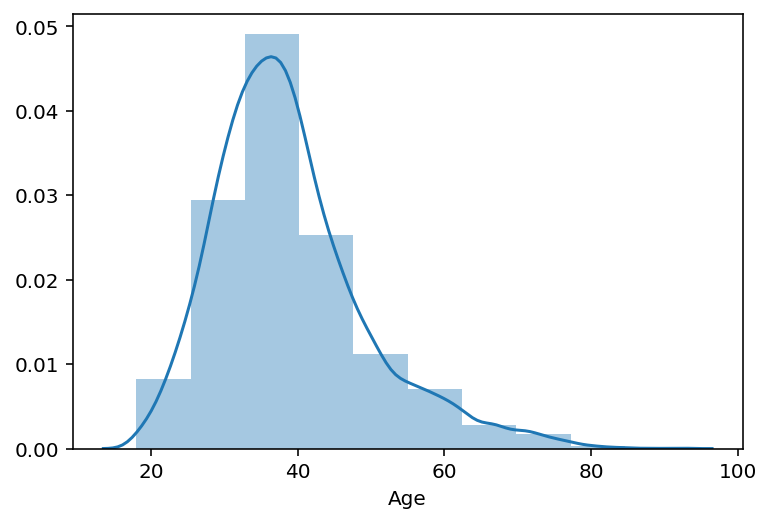

In [7]:
# seeing the distribution of age of people who have an account in the bank
sns.distplot(df.Age, bins = 10)
plt.show()

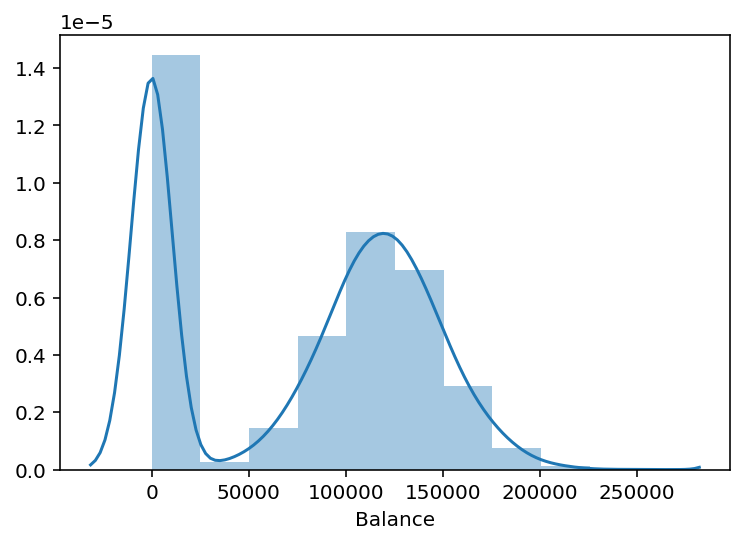

In [8]:
sns.distplot(df.Balance, bins = 10)
plt.show()

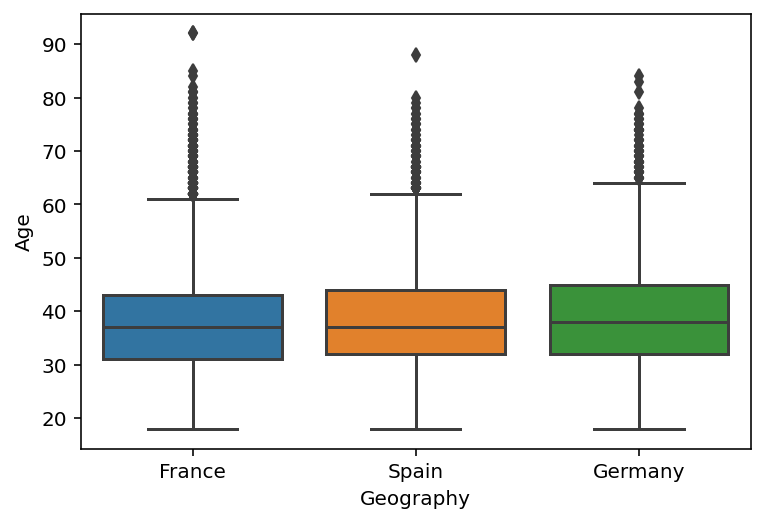

In [9]:
sns.boxplot(data = df, x= 'Geography', y = 'Age')
plt.show()

In [10]:
df.groupby("Gender")['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

Females are more likely to leave the bank from all the mentioned states

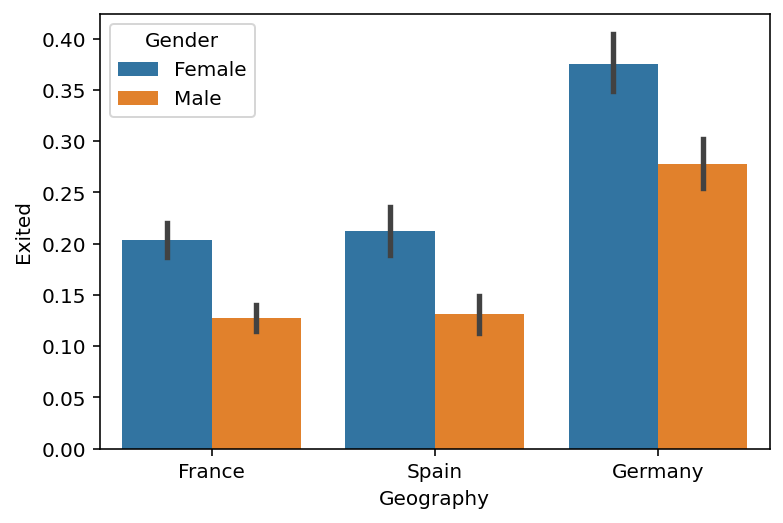

In [11]:
sns.barplot(x="Geography", y="Exited", hue = 'Gender', data=df)
plt.show()

### Target Variable - Exited

- Exited=0 active customer
- Exited=1 churned customer

In [12]:
df['Exited'].value_counts() # mostly not exited customers

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Counts of Two Types of Customers')

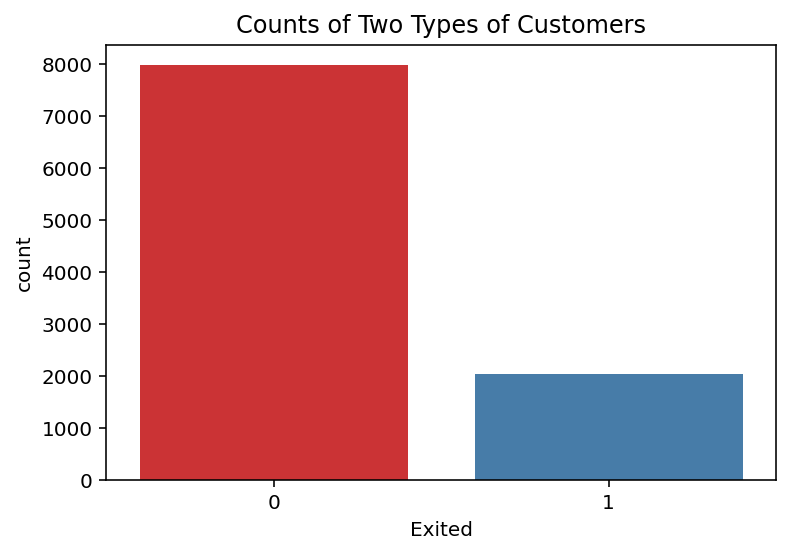

In [13]:
sns.countplot(df['Exited'], palette='Set1')
plt.title('Counts of Two Types of Customers')
# as expected, most customers did not churn

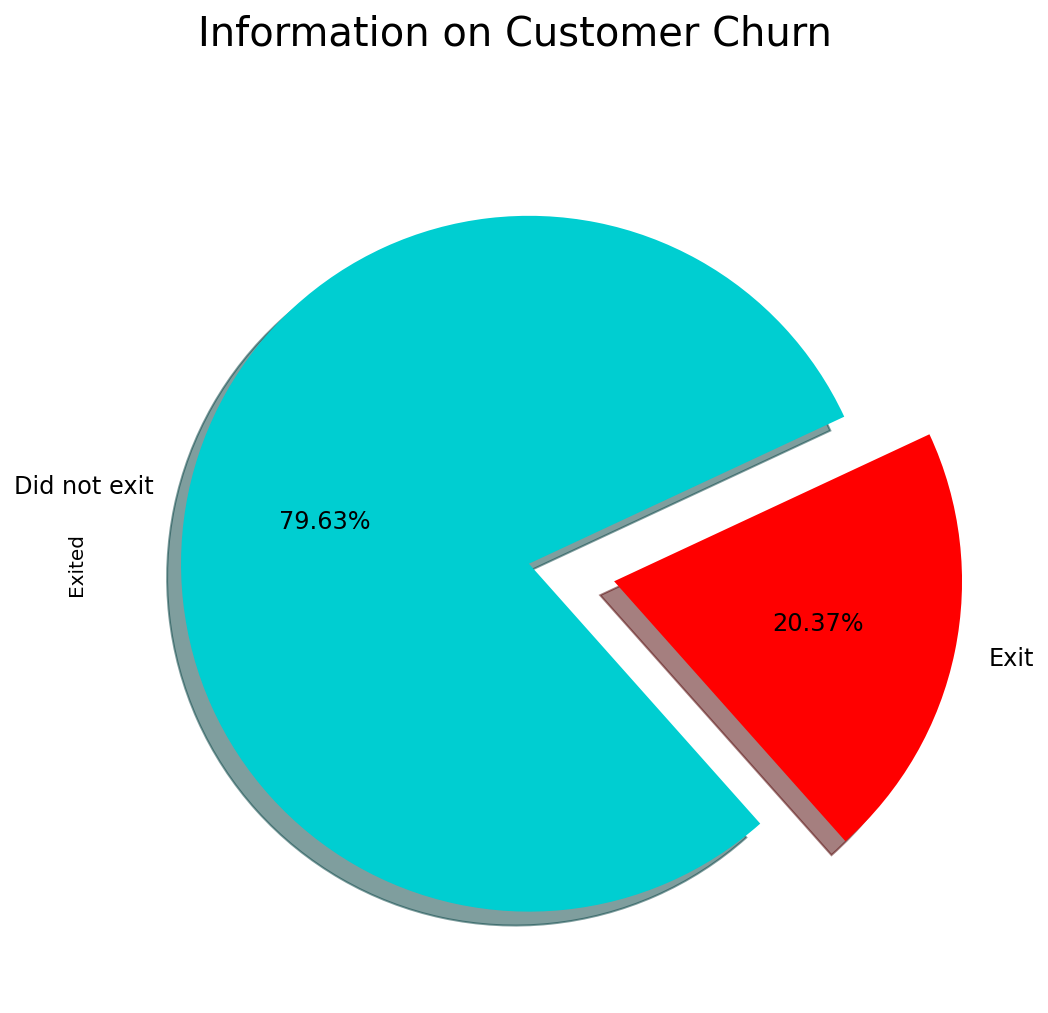

In [14]:
f, ax = plt.subplots(1,1, figsize=(8,8))

colors = ["darkturquoise", "red"]
labels ="Did not exit", "Exit"

plt.suptitle('Information on Customer Churn', fontsize=20)

df["Exited"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25)

### **Correlation Matrix**

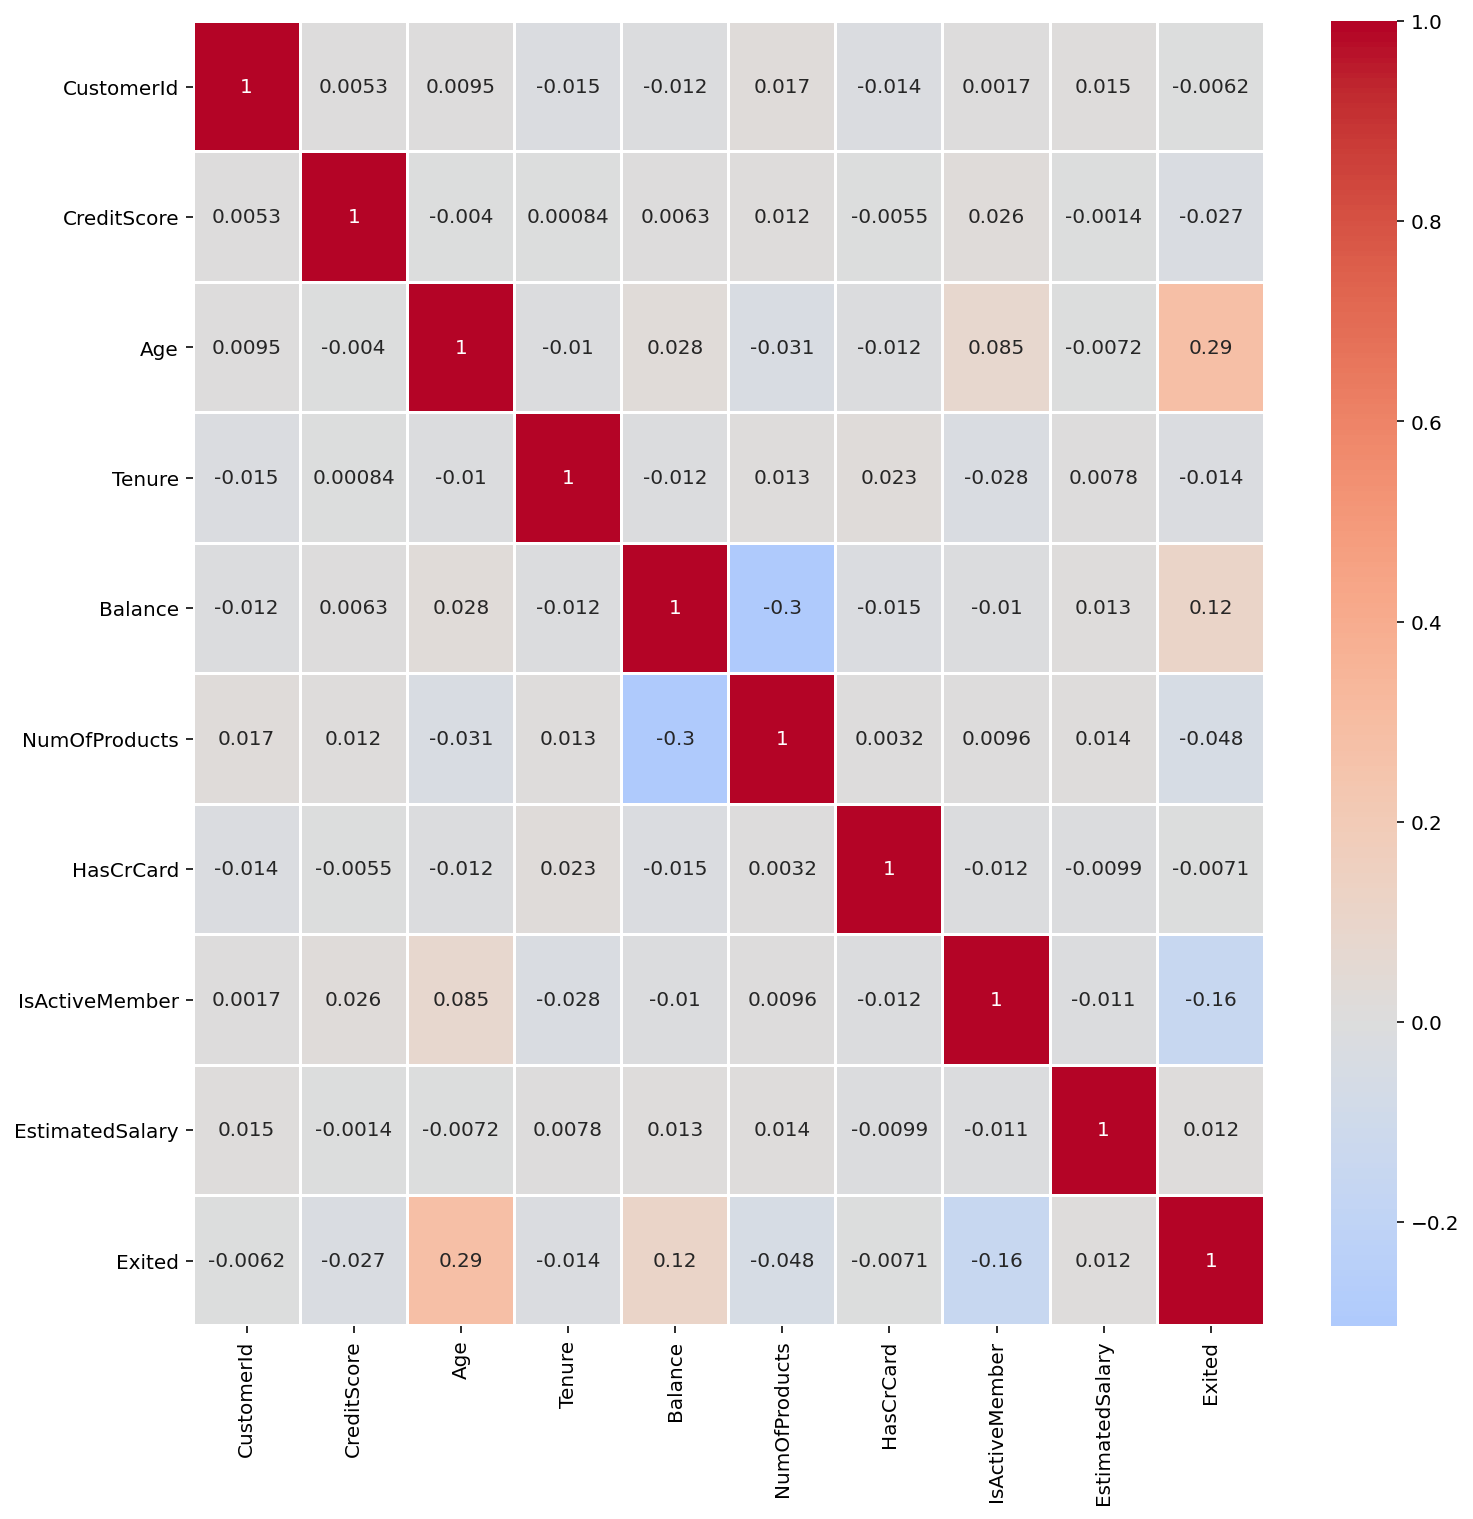

In [15]:
#Create figure
f, ax = plt.subplots(figsize = (12,12))

#Create and plot correlation matrix
corr = df.corr()
sns.heatmap(corr, ax=ax, linewidths= 1, linecolor='white',annot = True, cmap = 'coolwarm',center = 0);

From the heatmap , we find that teh Age, Balance and the Geography of the Customer are Most important features

### **Countplot by country and gender**

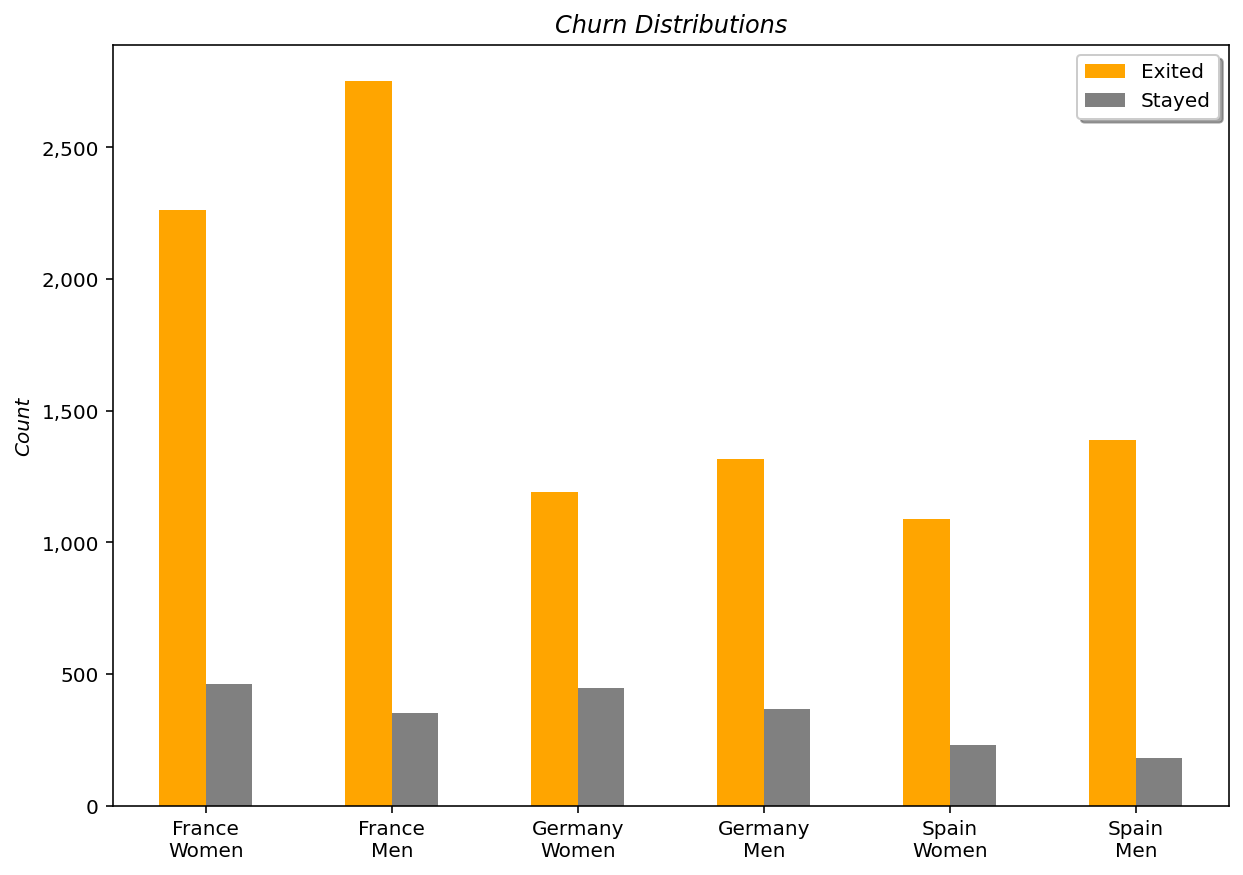

In [16]:
# create figure
f, ax = plt.subplots(figsize = (10,7))

# plot target
df.groupby(['Geography','Gender'])['Exited'].agg({'count','sum'}).plot(kind = 'bar', ax = ax, color = ['orange', 'grey'])

cats = ['France\nWomen','France\nMen','Germany\nWomen','Germany\nMen','Spain\nWomen','Spain\nMen']
# ax.set_xticks(cats)
ax.set_xticklabels(cats)
plt.xticks(rotation=0)

# set plot aesthetics
ax.set_title('Churn Distributions', style = 'italic')
ax.set_xlabel('')
ax.set_ylabel('Count', style = 'italic')
ax.legend(['Exited', 'Stayed'], shadow = True, frameon = True)
ax.grid(axis = 'x',b=False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# Data Pre-Processing

## Missing Data Analysis

In [17]:
# no missing data in the data set
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
# Outlier Observation Analysis
for feature in df[['CreditScore','Tenure', 'Balance','EstimatedSalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Tenure no
Balance no
EstimatedSalary no


## Feature Engineering

In [19]:
df["NewAGT"] = df["Age"] - df["Tenure"]
df["New_CreditsScore"] = pd.qcut(df['CreditScore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["EstimatedSalary"] / 12 

In [20]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,New_CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667


## One Hot Encoding

In [21]:
df = pd.get_dummies(df, columns =["Geography", "Gender"], drop_first = True)

In [22]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,New_CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


In [23]:
df = df.drop(["CustomerId","Surname"], axis = 1)

In [24]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAGT,New_CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


## Scaling

In [25]:
cat_df = df[["Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"]]

In [26]:
cat_df.head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
RowNumber,,,,,
1,0,0,0,1,1
2,0,1,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0
5,0,1,0,1,1


In [27]:
y = df["Exited"]
X = df.drop(["Exited","Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"], axis = 1)
cols = X.columns
index = X.index

In [28]:
X.head()    

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,New_CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [29]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [30]:
X = pd.concat([X,cat_df], axis = 1)

In [31]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,New_CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,0,0,0,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,0,1,0,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,0,0,0,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,0,0,0,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,0,1,0,1,1


# Modelling

In [32]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

LR: 0.825100 (0.009289)
KNN: 0.833200 (0.011626)
CART: 0.794100 (0.012437)
RF: 0.861400 (0.007228)
SVM: 0.855900 (0.008080)
XGB: 0.864500 (0.007145)
LightGBM: 0.864400 (0.007486)
CatBoost: 0.865500 (0.007684)


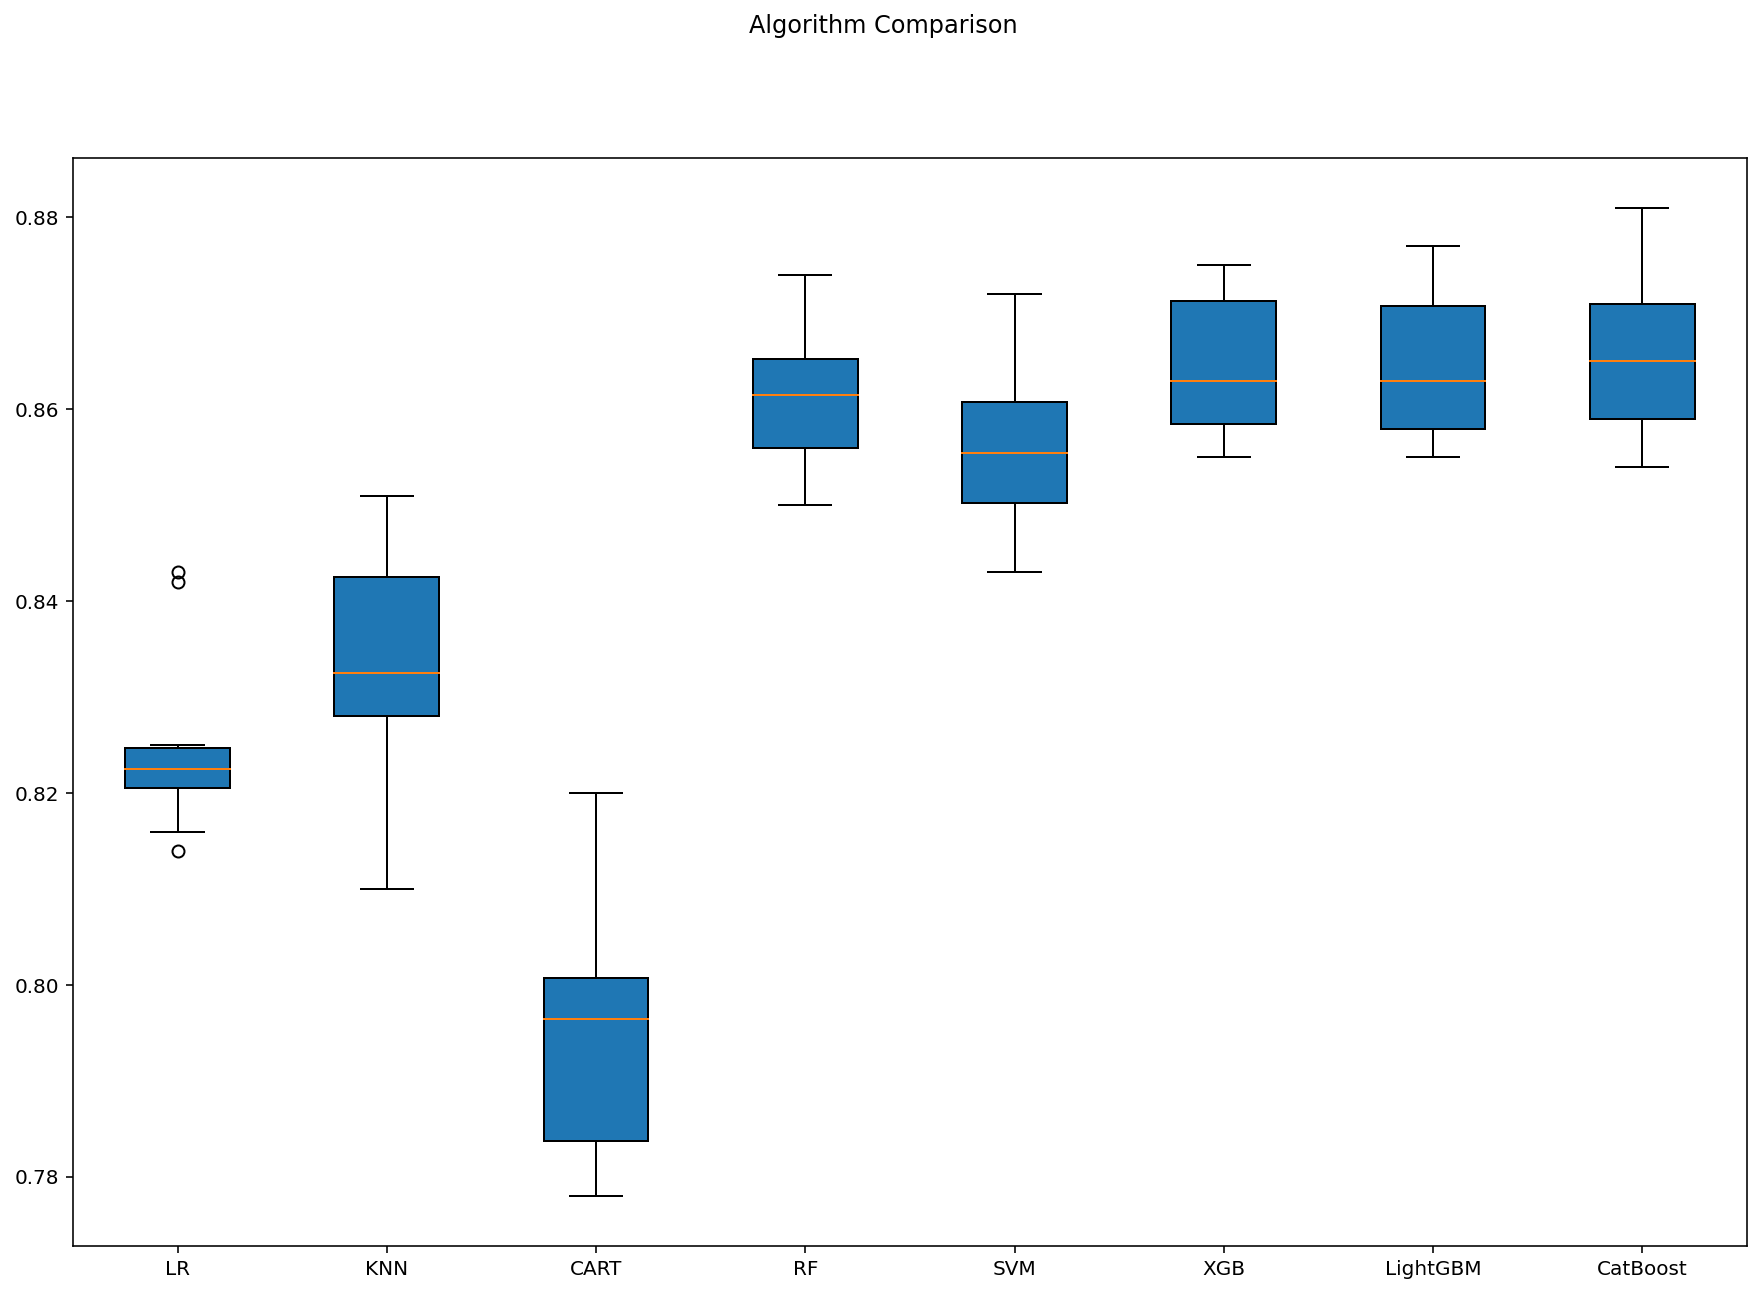

In [33]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# comparison of algorithms with boxplot
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, # vertical box alignment
            patch_artist=True) # fill with color
                         
ax.set_xticklabels(names)
plt.show()

# Model Optimization


## Model Tuning


### Random Forests Tuning

In [34]:
rf_params = {"n_estimators" :[100,200], 
             "max_features": [3,5], 
            "max_depth": [3,5]}

In [35]:
rf_model = RandomForestClassifier(random_state = 12345)

In [36]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   26.1s finished


In [37]:
gs_cv.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

### Installation of Final Model

In [38]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(X,y)
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8582000000000001

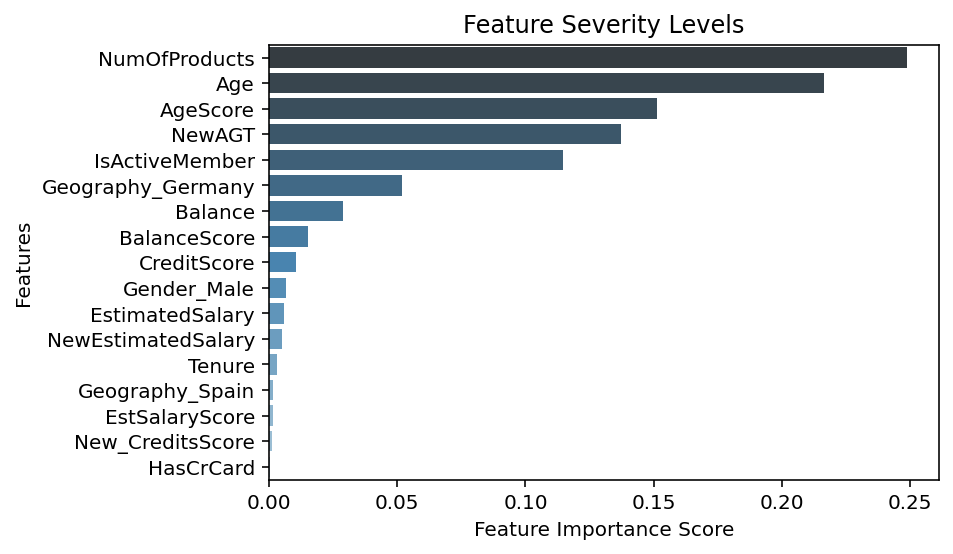

In [39]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

### XGBoost Tuning

In [40]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [45]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 1],
    "max_depth":[3,5],
    "subsample":[0.5, 0.9],
    "n_estimators": [100,200]}

In [46]:
xgb_cv = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.4min finished


In [47]:
xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

### Installation of Final Model

In [48]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv.best_params_).fit(X,y)
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8644999999999999

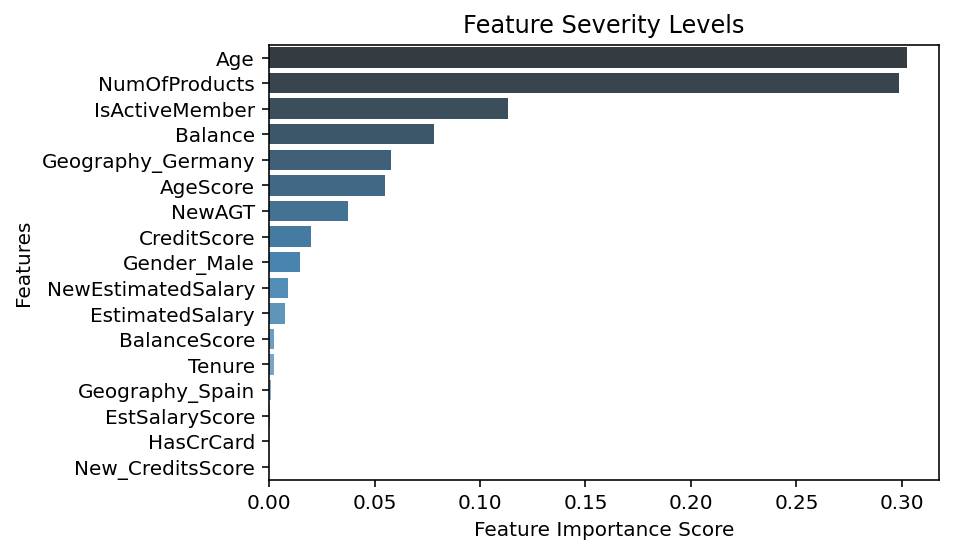

In [49]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

### LightGBM Tuning

In [51]:
lgbm = LGBMClassifier(random_state = 12345)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [52]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.2min finished


In [53]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}

### Installation of Final Model

In [54]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.8662000000000001

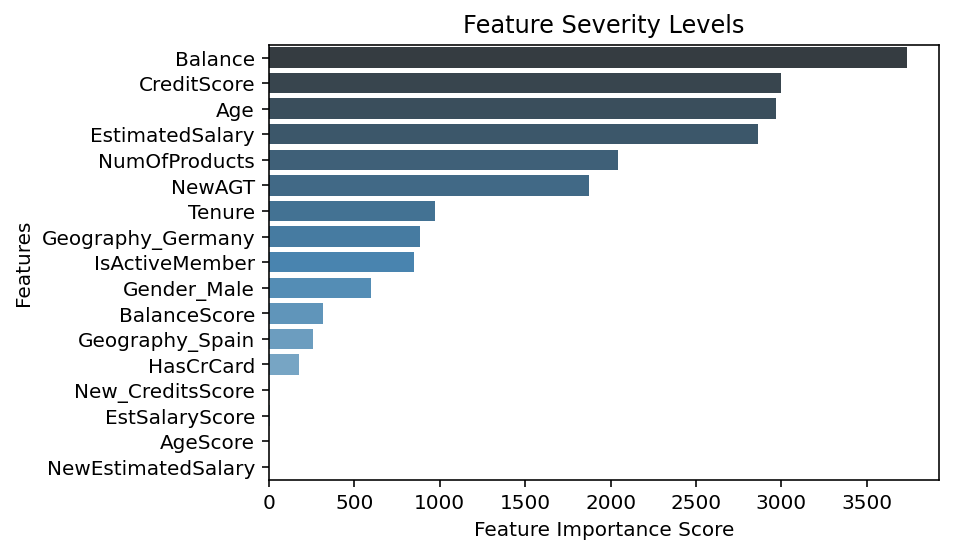

In [55]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

### CatBoost Tuning

In [56]:
catboost = LGBMClassifier(random_state = 12345)

In [57]:
catboost_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [58]:
gs_cv = GridSearchCV(catboost, 
                     catboost_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.2min finished


In [59]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}

### Installation of Final Model

In [60]:
catboost_tuned = CatBoostClassifier(**gs_cv.best_params_).fit(X,y)
cross_val_score(catboost_tuned, X, y, cv = 10).mean()

0:	learn: 0.6852860	total: 5.36ms	remaining: 5.35s
1:	learn: 0.6779261	total: 10.8ms	remaining: 5.37s
2:	learn: 0.6699662	total: 16.1ms	remaining: 5.36s
3:	learn: 0.6633130	total: 21.3ms	remaining: 5.3s
4:	learn: 0.6562665	total: 26.2ms	remaining: 5.22s
5:	learn: 0.6489018	total: 31.5ms	remaining: 5.21s
6:	learn: 0.6427912	total: 36.7ms	remaining: 5.21s
7:	learn: 0.6359516	total: 43.9ms	remaining: 5.44s
8:	learn: 0.6290800	total: 54.4ms	remaining: 5.99s
9:	learn: 0.6229794	total: 63.8ms	remaining: 6.31s
10:	learn: 0.6161392	total: 69.2ms	remaining: 6.22s
11:	learn: 0.6097385	total: 74.5ms	remaining: 6.13s
12:	learn: 0.6040546	total: 79.7ms	remaining: 6.05s
13:	learn: 0.5991713	total: 84.7ms	remaining: 5.97s
14:	learn: 0.5940212	total: 90.1ms	remaining: 5.92s
15:	learn: 0.5882430	total: 95.3ms	remaining: 5.86s
16:	learn: 0.5826996	total: 101ms	remaining: 5.82s
17:	learn: 0.5772764	total: 106ms	remaining: 5.79s
18:	learn: 0.5718535	total: 112ms	remaining: 5.76s
19:	learn: 0.5668302	total

185:	learn: 0.3517274	total: 1.02s	remaining: 4.46s
186:	learn: 0.3513216	total: 1.03s	remaining: 4.46s
187:	learn: 0.3511577	total: 1.03s	remaining: 4.46s
188:	learn: 0.3509428	total: 1.04s	remaining: 4.45s
189:	learn: 0.3507125	total: 1.04s	remaining: 4.45s
190:	learn: 0.3505240	total: 1.05s	remaining: 4.45s
191:	learn: 0.3503132	total: 1.05s	remaining: 4.44s
192:	learn: 0.3500893	total: 1.06s	remaining: 4.44s
193:	learn: 0.3497474	total: 1.07s	remaining: 4.43s
194:	learn: 0.3494136	total: 1.07s	remaining: 4.43s
195:	learn: 0.3491749	total: 1.08s	remaining: 4.43s
196:	learn: 0.3489686	total: 1.08s	remaining: 4.42s
197:	learn: 0.3486995	total: 1.09s	remaining: 4.42s
198:	learn: 0.3485619	total: 1.1s	remaining: 4.42s
199:	learn: 0.3483964	total: 1.1s	remaining: 4.41s
200:	learn: 0.3480962	total: 1.11s	remaining: 4.41s
201:	learn: 0.3478077	total: 1.11s	remaining: 4.41s
202:	learn: 0.3475928	total: 1.12s	remaining: 4.4s
203:	learn: 0.3473568	total: 1.13s	remaining: 4.4s
204:	learn: 0.34

360:	learn: 0.3285758	total: 2.22s	remaining: 3.94s
361:	learn: 0.3284794	total: 2.23s	remaining: 3.93s
362:	learn: 0.3284302	total: 2.24s	remaining: 3.93s
363:	learn: 0.3283811	total: 2.25s	remaining: 3.92s
364:	learn: 0.3283075	total: 2.25s	remaining: 3.92s
365:	learn: 0.3282470	total: 2.26s	remaining: 3.92s
366:	learn: 0.3282141	total: 2.27s	remaining: 3.91s
367:	learn: 0.3281130	total: 2.27s	remaining: 3.91s
368:	learn: 0.3280417	total: 2.28s	remaining: 3.9s
369:	learn: 0.3279647	total: 2.29s	remaining: 3.9s
370:	learn: 0.3278929	total: 2.3s	remaining: 3.89s
371:	learn: 0.3278565	total: 2.3s	remaining: 3.89s
372:	learn: 0.3277908	total: 2.31s	remaining: 3.88s
373:	learn: 0.3277456	total: 2.31s	remaining: 3.88s
374:	learn: 0.3276883	total: 2.32s	remaining: 3.87s
375:	learn: 0.3276359	total: 2.33s	remaining: 3.86s
376:	learn: 0.3275589	total: 2.33s	remaining: 3.85s
377:	learn: 0.3275147	total: 2.34s	remaining: 3.85s
378:	learn: 0.3274248	total: 2.35s	remaining: 3.84s
379:	learn: 0.32

534:	learn: 0.3196679	total: 3.23s	remaining: 2.81s
535:	learn: 0.3196333	total: 3.23s	remaining: 2.8s
536:	learn: 0.3195940	total: 3.24s	remaining: 2.79s
537:	learn: 0.3195637	total: 3.25s	remaining: 2.79s
538:	learn: 0.3195350	total: 3.25s	remaining: 2.78s
539:	learn: 0.3195010	total: 3.26s	remaining: 2.77s
540:	learn: 0.3194760	total: 3.26s	remaining: 2.77s
541:	learn: 0.3194331	total: 3.27s	remaining: 2.76s
542:	learn: 0.3193741	total: 3.27s	remaining: 2.75s
543:	learn: 0.3193179	total: 3.28s	remaining: 2.75s
544:	learn: 0.3192706	total: 3.28s	remaining: 2.74s
545:	learn: 0.3192383	total: 3.29s	remaining: 2.73s
546:	learn: 0.3192176	total: 3.29s	remaining: 2.73s
547:	learn: 0.3191866	total: 3.3s	remaining: 2.72s
548:	learn: 0.3191479	total: 3.31s	remaining: 2.71s
549:	learn: 0.3191083	total: 3.31s	remaining: 2.71s
550:	learn: 0.3190546	total: 3.31s	remaining: 2.7s
551:	learn: 0.3190123	total: 3.32s	remaining: 2.69s
552:	learn: 0.3189836	total: 3.33s	remaining: 2.69s
553:	learn: 0.3

710:	learn: 0.3137669	total: 4.24s	remaining: 1.72s
711:	learn: 0.3137370	total: 4.24s	remaining: 1.72s
712:	learn: 0.3136960	total: 4.25s	remaining: 1.71s
713:	learn: 0.3136619	total: 4.25s	remaining: 1.7s
714:	learn: 0.3136281	total: 4.26s	remaining: 1.7s
715:	learn: 0.3135942	total: 4.27s	remaining: 1.69s
716:	learn: 0.3135738	total: 4.28s	remaining: 1.69s
717:	learn: 0.3135504	total: 4.28s	remaining: 1.68s
718:	learn: 0.3135271	total: 4.29s	remaining: 1.68s
719:	learn: 0.3134947	total: 4.29s	remaining: 1.67s
720:	learn: 0.3134688	total: 4.3s	remaining: 1.66s
721:	learn: 0.3134544	total: 4.31s	remaining: 1.66s
722:	learn: 0.3134388	total: 4.31s	remaining: 1.65s
723:	learn: 0.3134137	total: 4.32s	remaining: 1.65s
724:	learn: 0.3133665	total: 4.33s	remaining: 1.64s
725:	learn: 0.3133395	total: 4.34s	remaining: 1.64s
726:	learn: 0.3133089	total: 4.34s	remaining: 1.63s
727:	learn: 0.3132681	total: 4.35s	remaining: 1.62s
728:	learn: 0.3132415	total: 4.35s	remaining: 1.62s
729:	learn: 0.3

888:	learn: 0.3084256	total: 5.24s	remaining: 655ms
889:	learn: 0.3083938	total: 5.25s	remaining: 649ms
890:	learn: 0.3083655	total: 5.26s	remaining: 643ms
891:	learn: 0.3083499	total: 5.26s	remaining: 637ms
892:	learn: 0.3083358	total: 5.27s	remaining: 631ms
893:	learn: 0.3082998	total: 5.27s	remaining: 625ms
894:	learn: 0.3082789	total: 5.28s	remaining: 619ms
895:	learn: 0.3082389	total: 5.28s	remaining: 613ms
896:	learn: 0.3082091	total: 5.29s	remaining: 607ms
897:	learn: 0.3081729	total: 5.29s	remaining: 601ms
898:	learn: 0.3081485	total: 5.3s	remaining: 596ms
899:	learn: 0.3081181	total: 5.31s	remaining: 590ms
900:	learn: 0.3080922	total: 5.31s	remaining: 584ms
901:	learn: 0.3080585	total: 5.32s	remaining: 578ms
902:	learn: 0.3080202	total: 5.32s	remaining: 572ms
903:	learn: 0.3080005	total: 5.33s	remaining: 566ms
904:	learn: 0.3079681	total: 5.33s	remaining: 560ms
905:	learn: 0.3079474	total: 5.34s	remaining: 554ms
906:	learn: 0.3079273	total: 5.34s	remaining: 548ms
907:	learn: 0

96:	learn: 0.3956870	total: 349ms	remaining: 3.25s
97:	learn: 0.3946659	total: 353ms	remaining: 3.25s
98:	learn: 0.3936731	total: 357ms	remaining: 3.25s
99:	learn: 0.3928879	total: 360ms	remaining: 3.24s
100:	learn: 0.3921092	total: 364ms	remaining: 3.24s
101:	learn: 0.3912303	total: 368ms	remaining: 3.24s
102:	learn: 0.3900871	total: 371ms	remaining: 3.23s
103:	learn: 0.3890367	total: 375ms	remaining: 3.23s
104:	learn: 0.3881723	total: 378ms	remaining: 3.22s
105:	learn: 0.3872569	total: 382ms	remaining: 3.22s
106:	learn: 0.3864727	total: 385ms	remaining: 3.22s
107:	learn: 0.3857853	total: 389ms	remaining: 3.21s
108:	learn: 0.3850607	total: 392ms	remaining: 3.21s
109:	learn: 0.3844713	total: 396ms	remaining: 3.2s
110:	learn: 0.3839813	total: 400ms	remaining: 3.2s
111:	learn: 0.3834392	total: 403ms	remaining: 3.2s
112:	learn: 0.3826280	total: 407ms	remaining: 3.19s
113:	learn: 0.3818802	total: 410ms	remaining: 3.19s
114:	learn: 0.3812326	total: 414ms	remaining: 3.18s
115:	learn: 0.38067

261:	learn: 0.3391764	total: 947ms	remaining: 2.67s
262:	learn: 0.3390725	total: 951ms	remaining: 2.67s
263:	learn: 0.3389280	total: 955ms	remaining: 2.66s
264:	learn: 0.3387540	total: 959ms	remaining: 2.66s
265:	learn: 0.3386431	total: 962ms	remaining: 2.65s
266:	learn: 0.3384511	total: 966ms	remaining: 2.65s
267:	learn: 0.3382757	total: 969ms	remaining: 2.65s
268:	learn: 0.3381599	total: 973ms	remaining: 2.64s
269:	learn: 0.3380422	total: 977ms	remaining: 2.64s
270:	learn: 0.3378956	total: 980ms	remaining: 2.64s
271:	learn: 0.3377939	total: 984ms	remaining: 2.63s
272:	learn: 0.3377283	total: 988ms	remaining: 2.63s
273:	learn: 0.3376069	total: 991ms	remaining: 2.63s
274:	learn: 0.3375204	total: 995ms	remaining: 2.62s
275:	learn: 0.3374406	total: 999ms	remaining: 2.62s
276:	learn: 0.3373797	total: 1s	remaining: 2.62s
277:	learn: 0.3372549	total: 1s	remaining: 2.61s
278:	learn: 0.3371008	total: 1.01s	remaining: 2.61s
279:	learn: 0.3369727	total: 1.01s	remaining: 2.6s
280:	learn: 0.33686

421:	learn: 0.3258739	total: 1.55s	remaining: 2.12s
422:	learn: 0.3258380	total: 1.55s	remaining: 2.11s
423:	learn: 0.3257678	total: 1.55s	remaining: 2.11s
424:	learn: 0.3256978	total: 1.56s	remaining: 2.11s
425:	learn: 0.3256483	total: 1.56s	remaining: 2.1s
426:	learn: 0.3256101	total: 1.57s	remaining: 2.1s
427:	learn: 0.3255205	total: 1.57s	remaining: 2.1s
428:	learn: 0.3254799	total: 1.57s	remaining: 2.1s
429:	learn: 0.3254299	total: 1.58s	remaining: 2.09s
430:	learn: 0.3253750	total: 1.58s	remaining: 2.09s
431:	learn: 0.3253015	total: 1.59s	remaining: 2.09s
432:	learn: 0.3252388	total: 1.59s	remaining: 2.08s
433:	learn: 0.3251713	total: 1.59s	remaining: 2.08s
434:	learn: 0.3251368	total: 1.6s	remaining: 2.08s
435:	learn: 0.3251006	total: 1.6s	remaining: 2.07s
436:	learn: 0.3250276	total: 1.61s	remaining: 2.07s
437:	learn: 0.3249954	total: 1.61s	remaining: 2.07s
438:	learn: 0.3249438	total: 1.61s	remaining: 2.06s
439:	learn: 0.3249149	total: 1.62s	remaining: 2.06s
440:	learn: 0.3248

618:	learn: 0.3172218	total: 2.34s	remaining: 1.44s
619:	learn: 0.3171905	total: 2.35s	remaining: 1.44s
620:	learn: 0.3171577	total: 2.35s	remaining: 1.44s
621:	learn: 0.3171120	total: 2.36s	remaining: 1.43s
622:	learn: 0.3170795	total: 2.36s	remaining: 1.43s
623:	learn: 0.3170514	total: 2.37s	remaining: 1.43s
624:	learn: 0.3170313	total: 2.37s	remaining: 1.42s
625:	learn: 0.3169858	total: 2.37s	remaining: 1.42s
626:	learn: 0.3169607	total: 2.38s	remaining: 1.41s
627:	learn: 0.3169303	total: 2.38s	remaining: 1.41s
628:	learn: 0.3169010	total: 2.38s	remaining: 1.41s
629:	learn: 0.3168790	total: 2.39s	remaining: 1.4s
630:	learn: 0.3168182	total: 2.39s	remaining: 1.4s
631:	learn: 0.3167423	total: 2.4s	remaining: 1.4s
632:	learn: 0.3167138	total: 2.4s	remaining: 1.39s
633:	learn: 0.3166696	total: 2.4s	remaining: 1.39s
634:	learn: 0.3166468	total: 2.41s	remaining: 1.39s
635:	learn: 0.3166193	total: 2.41s	remaining: 1.38s
636:	learn: 0.3165659	total: 2.42s	remaining: 1.38s
637:	learn: 0.3165

812:	learn: 0.3109851	total: 3.15s	remaining: 723ms
813:	learn: 0.3109688	total: 3.15s	remaining: 720ms
814:	learn: 0.3109295	total: 3.15s	remaining: 716ms
815:	learn: 0.3108845	total: 3.16s	remaining: 712ms
816:	learn: 0.3108507	total: 3.16s	remaining: 709ms
817:	learn: 0.3108248	total: 3.17s	remaining: 705ms
818:	learn: 0.3107997	total: 3.17s	remaining: 701ms
819:	learn: 0.3107548	total: 3.18s	remaining: 698ms
820:	learn: 0.3107143	total: 3.18s	remaining: 694ms
821:	learn: 0.3106709	total: 3.19s	remaining: 690ms
822:	learn: 0.3106550	total: 3.19s	remaining: 686ms
823:	learn: 0.3106359	total: 3.2s	remaining: 683ms
824:	learn: 0.3106076	total: 3.2s	remaining: 679ms
825:	learn: 0.3105631	total: 3.21s	remaining: 675ms
826:	learn: 0.3105228	total: 3.21s	remaining: 672ms
827:	learn: 0.3104911	total: 3.21s	remaining: 668ms
828:	learn: 0.3104592	total: 3.22s	remaining: 664ms
829:	learn: 0.3104295	total: 3.22s	remaining: 660ms
830:	learn: 0.3104131	total: 3.23s	remaining: 657ms
831:	learn: 0.

0:	learn: 0.6852742	total: 3.78ms	remaining: 3.77s
1:	learn: 0.6779738	total: 8.05ms	remaining: 4.02s
2:	learn: 0.6700877	total: 11.5ms	remaining: 3.82s
3:	learn: 0.6633522	total: 15ms	remaining: 3.72s
4:	learn: 0.6562910	total: 18.4ms	remaining: 3.65s
5:	learn: 0.6489510	total: 22.1ms	remaining: 3.66s
6:	learn: 0.6428387	total: 25.6ms	remaining: 3.63s
7:	learn: 0.6360226	total: 29.3ms	remaining: 3.63s
8:	learn: 0.6291061	total: 34.2ms	remaining: 3.77s
9:	learn: 0.6229691	total: 38ms	remaining: 3.76s
10:	learn: 0.6163009	total: 41.8ms	remaining: 3.76s
11:	learn: 0.6108358	total: 45.4ms	remaining: 3.73s
12:	learn: 0.6051195	total: 48.9ms	remaining: 3.71s
13:	learn: 0.6001995	total: 52.5ms	remaining: 3.7s
14:	learn: 0.5945028	total: 55.9ms	remaining: 3.67s
15:	learn: 0.5888680	total: 59.5ms	remaining: 3.66s
16:	learn: 0.5840431	total: 63.2ms	remaining: 3.65s
17:	learn: 0.5793490	total: 66.8ms	remaining: 3.64s
18:	learn: 0.5749420	total: 70.4ms	remaining: 3.64s
19:	learn: 0.5703781	total:

207:	learn: 0.3455885	total: 802ms	remaining: 3.05s
208:	learn: 0.3453108	total: 806ms	remaining: 3.05s
209:	learn: 0.3451456	total: 809ms	remaining: 3.04s
210:	learn: 0.3449084	total: 813ms	remaining: 3.04s
211:	learn: 0.3447531	total: 816ms	remaining: 3.03s
212:	learn: 0.3445680	total: 820ms	remaining: 3.03s
213:	learn: 0.3443891	total: 823ms	remaining: 3.02s
214:	learn: 0.3442333	total: 827ms	remaining: 3.02s
215:	learn: 0.3440701	total: 831ms	remaining: 3.01s
216:	learn: 0.3438008	total: 834ms	remaining: 3.01s
217:	learn: 0.3436745	total: 838ms	remaining: 3s
218:	learn: 0.3435231	total: 841ms	remaining: 3s
219:	learn: 0.3433458	total: 845ms	remaining: 3s
220:	learn: 0.3431888	total: 848ms	remaining: 2.99s
221:	learn: 0.3430488	total: 852ms	remaining: 2.98s
222:	learn: 0.3428279	total: 856ms	remaining: 2.98s
223:	learn: 0.3426684	total: 859ms	remaining: 2.98s
224:	learn: 0.3425019	total: 863ms	remaining: 2.97s
225:	learn: 0.3424071	total: 866ms	remaining: 2.97s
226:	learn: 0.3422577

405:	learn: 0.3245985	total: 1.59s	remaining: 2.33s
406:	learn: 0.3245602	total: 1.6s	remaining: 2.33s
407:	learn: 0.3244928	total: 1.6s	remaining: 2.33s
408:	learn: 0.3244504	total: 1.61s	remaining: 2.32s
409:	learn: 0.3243769	total: 1.61s	remaining: 2.32s
410:	learn: 0.3242667	total: 1.62s	remaining: 2.32s
411:	learn: 0.3242111	total: 1.62s	remaining: 2.31s
412:	learn: 0.3241631	total: 1.62s	remaining: 2.31s
413:	learn: 0.3241038	total: 1.63s	remaining: 2.31s
414:	learn: 0.3240003	total: 1.63s	remaining: 2.3s
415:	learn: 0.3239554	total: 1.64s	remaining: 2.3s
416:	learn: 0.3238877	total: 1.64s	remaining: 2.29s
417:	learn: 0.3237711	total: 1.65s	remaining: 2.29s
418:	learn: 0.3236744	total: 1.65s	remaining: 2.29s
419:	learn: 0.3236472	total: 1.65s	remaining: 2.28s
420:	learn: 0.3235535	total: 1.66s	remaining: 2.28s
421:	learn: 0.3235194	total: 1.66s	remaining: 2.27s
422:	learn: 0.3234852	total: 1.67s	remaining: 2.27s
423:	learn: 0.3234318	total: 1.67s	remaining: 2.27s
424:	learn: 0.32

567:	learn: 0.3168277	total: 2.19s	remaining: 1.67s
568:	learn: 0.3167930	total: 2.2s	remaining: 1.66s
569:	learn: 0.3167173	total: 2.2s	remaining: 1.66s
570:	learn: 0.3166914	total: 2.2s	remaining: 1.66s
571:	learn: 0.3166533	total: 2.21s	remaining: 1.65s
572:	learn: 0.3165906	total: 2.21s	remaining: 1.65s
573:	learn: 0.3165546	total: 2.21s	remaining: 1.64s
574:	learn: 0.3165117	total: 2.22s	remaining: 1.64s
575:	learn: 0.3164703	total: 2.22s	remaining: 1.64s
576:	learn: 0.3164353	total: 2.23s	remaining: 1.63s
577:	learn: 0.3164041	total: 2.23s	remaining: 1.63s
578:	learn: 0.3163827	total: 2.23s	remaining: 1.63s
579:	learn: 0.3163495	total: 2.24s	remaining: 1.62s
580:	learn: 0.3163115	total: 2.24s	remaining: 1.62s
581:	learn: 0.3162730	total: 2.25s	remaining: 1.61s
582:	learn: 0.3162435	total: 2.25s	remaining: 1.61s
583:	learn: 0.3161798	total: 2.25s	remaining: 1.6s
584:	learn: 0.3161500	total: 2.26s	remaining: 1.6s
585:	learn: 0.3161183	total: 2.26s	remaining: 1.6s
586:	learn: 0.3160

728:	learn: 0.3110998	total: 2.79s	remaining: 1.04s
729:	learn: 0.3110907	total: 2.79s	remaining: 1.03s
730:	learn: 0.3110291	total: 2.8s	remaining: 1.03s
731:	learn: 0.3109798	total: 2.8s	remaining: 1.02s
732:	learn: 0.3109477	total: 2.81s	remaining: 1.02s
733:	learn: 0.3109062	total: 2.81s	remaining: 1.02s
734:	learn: 0.3108822	total: 2.81s	remaining: 1.01s
735:	learn: 0.3108463	total: 2.82s	remaining: 1.01s
736:	learn: 0.3108194	total: 2.82s	remaining: 1.01s
737:	learn: 0.3107906	total: 2.82s	remaining: 1s
738:	learn: 0.3107655	total: 2.83s	remaining: 999ms
739:	learn: 0.3107135	total: 2.83s	remaining: 995ms
740:	learn: 0.3106838	total: 2.83s	remaining: 991ms
741:	learn: 0.3106548	total: 2.84s	remaining: 987ms
742:	learn: 0.3106264	total: 2.84s	remaining: 983ms
743:	learn: 0.3105747	total: 2.85s	remaining: 979ms
744:	learn: 0.3105586	total: 2.85s	remaining: 975ms
745:	learn: 0.3105387	total: 2.85s	remaining: 971ms
746:	learn: 0.3104933	total: 2.86s	remaining: 968ms
747:	learn: 0.310

891:	learn: 0.3060659	total: 3.39s	remaining: 410ms
892:	learn: 0.3060333	total: 3.39s	remaining: 407ms
893:	learn: 0.3060012	total: 3.4s	remaining: 403ms
894:	learn: 0.3059702	total: 3.4s	remaining: 399ms
895:	learn: 0.3059488	total: 3.41s	remaining: 395ms
896:	learn: 0.3059193	total: 3.41s	remaining: 392ms
897:	learn: 0.3058940	total: 3.41s	remaining: 388ms
898:	learn: 0.3058746	total: 3.42s	remaining: 384ms
899:	learn: 0.3058520	total: 3.42s	remaining: 380ms
900:	learn: 0.3058159	total: 3.43s	remaining: 377ms
901:	learn: 0.3057729	total: 3.43s	remaining: 373ms
902:	learn: 0.3057479	total: 3.43s	remaining: 369ms
903:	learn: 0.3057392	total: 3.44s	remaining: 365ms
904:	learn: 0.3057215	total: 3.44s	remaining: 361ms
905:	learn: 0.3056915	total: 3.45s	remaining: 358ms
906:	learn: 0.3056582	total: 3.45s	remaining: 354ms
907:	learn: 0.3056144	total: 3.46s	remaining: 350ms
908:	learn: 0.3055872	total: 3.46s	remaining: 346ms
909:	learn: 0.3055541	total: 3.46s	remaining: 343ms
910:	learn: 0.

69:	learn: 0.4284288	total: 277ms	remaining: 3.68s
70:	learn: 0.4265108	total: 281ms	remaining: 3.68s
71:	learn: 0.4247870	total: 286ms	remaining: 3.68s
72:	learn: 0.4231495	total: 290ms	remaining: 3.68s
73:	learn: 0.4216155	total: 294ms	remaining: 3.68s
74:	learn: 0.4204821	total: 298ms	remaining: 3.67s
75:	learn: 0.4191448	total: 302ms	remaining: 3.67s
76:	learn: 0.4179932	total: 306ms	remaining: 3.67s
77:	learn: 0.4166004	total: 311ms	remaining: 3.67s
78:	learn: 0.4154247	total: 315ms	remaining: 3.67s
79:	learn: 0.4142762	total: 319ms	remaining: 3.67s
80:	learn: 0.4132505	total: 323ms	remaining: 3.66s
81:	learn: 0.4119273	total: 327ms	remaining: 3.66s
82:	learn: 0.4109136	total: 331ms	remaining: 3.66s
83:	learn: 0.4099718	total: 335ms	remaining: 3.65s
84:	learn: 0.4088468	total: 339ms	remaining: 3.65s
85:	learn: 0.4076356	total: 343ms	remaining: 3.65s
86:	learn: 0.4067227	total: 347ms	remaining: 3.64s
87:	learn: 0.4059230	total: 351ms	remaining: 3.64s
88:	learn: 0.4051431	total: 355

262:	learn: 0.3404111	total: 1.07s	remaining: 3.01s
263:	learn: 0.3402815	total: 1.08s	remaining: 3.01s
264:	learn: 0.3401358	total: 1.08s	remaining: 3s
265:	learn: 0.3400374	total: 1.09s	remaining: 3s
266:	learn: 0.3399455	total: 1.09s	remaining: 3s
267:	learn: 0.3398628	total: 1.09s	remaining: 2.99s
268:	learn: 0.3397595	total: 1.1s	remaining: 2.99s
269:	learn: 0.3396500	total: 1.1s	remaining: 2.98s
270:	learn: 0.3395792	total: 1.11s	remaining: 2.98s
271:	learn: 0.3394541	total: 1.11s	remaining: 2.98s
272:	learn: 0.3393257	total: 1.12s	remaining: 2.97s
273:	learn: 0.3391865	total: 1.12s	remaining: 2.97s
274:	learn: 0.3390260	total: 1.12s	remaining: 2.96s
275:	learn: 0.3388573	total: 1.13s	remaining: 2.96s
276:	learn: 0.3387509	total: 1.13s	remaining: 2.96s
277:	learn: 0.3386280	total: 1.14s	remaining: 2.95s
278:	learn: 0.3385506	total: 1.14s	remaining: 2.95s
279:	learn: 0.3384489	total: 1.15s	remaining: 2.94s
280:	learn: 0.3383789	total: 1.15s	remaining: 2.94s
281:	learn: 0.3382288	t

458:	learn: 0.3250244	total: 1.88s	remaining: 2.21s
459:	learn: 0.3249781	total: 1.88s	remaining: 2.21s
460:	learn: 0.3249325	total: 1.89s	remaining: 2.2s
461:	learn: 0.3249009	total: 1.89s	remaining: 2.2s
462:	learn: 0.3248535	total: 1.89s	remaining: 2.2s
463:	learn: 0.3248163	total: 1.9s	remaining: 2.19s
464:	learn: 0.3247794	total: 1.9s	remaining: 2.19s
465:	learn: 0.3247434	total: 1.91s	remaining: 2.18s
466:	learn: 0.3247034	total: 1.91s	remaining: 2.18s
467:	learn: 0.3246395	total: 1.91s	remaining: 2.17s
468:	learn: 0.3245827	total: 1.92s	remaining: 2.17s
469:	learn: 0.3245502	total: 1.92s	remaining: 2.17s
470:	learn: 0.3245260	total: 1.93s	remaining: 2.16s
471:	learn: 0.3244914	total: 1.93s	remaining: 2.16s
472:	learn: 0.3244511	total: 1.93s	remaining: 2.15s
473:	learn: 0.3244148	total: 1.94s	remaining: 2.15s
474:	learn: 0.3243529	total: 1.94s	remaining: 2.15s
475:	learn: 0.3242962	total: 1.95s	remaining: 2.14s
476:	learn: 0.3242611	total: 1.95s	remaining: 2.14s
477:	learn: 0.324

662:	learn: 0.3168847	total: 2.68s	remaining: 1.36s
663:	learn: 0.3168411	total: 2.68s	remaining: 1.36s
664:	learn: 0.3168153	total: 2.68s	remaining: 1.35s
665:	learn: 0.3167643	total: 2.69s	remaining: 1.35s
666:	learn: 0.3167307	total: 2.69s	remaining: 1.34s
667:	learn: 0.3166841	total: 2.69s	remaining: 1.34s
668:	learn: 0.3166628	total: 2.7s	remaining: 1.33s
669:	learn: 0.3166035	total: 2.7s	remaining: 1.33s
670:	learn: 0.3165798	total: 2.71s	remaining: 1.33s
671:	learn: 0.3165325	total: 2.71s	remaining: 1.32s
672:	learn: 0.3165086	total: 2.71s	remaining: 1.32s
673:	learn: 0.3164842	total: 2.72s	remaining: 1.31s
674:	learn: 0.3164517	total: 2.72s	remaining: 1.31s
675:	learn: 0.3163990	total: 2.72s	remaining: 1.3s
676:	learn: 0.3163688	total: 2.73s	remaining: 1.3s
677:	learn: 0.3163250	total: 2.73s	remaining: 1.3s
678:	learn: 0.3163046	total: 2.74s	remaining: 1.29s
679:	learn: 0.3162708	total: 2.74s	remaining: 1.29s
680:	learn: 0.3162279	total: 2.74s	remaining: 1.28s
681:	learn: 0.316

825:	learn: 0.3115594	total: 3.27s	remaining: 690ms
826:	learn: 0.3115396	total: 3.28s	remaining: 686ms
827:	learn: 0.3115083	total: 3.28s	remaining: 682ms
828:	learn: 0.3114698	total: 3.29s	remaining: 678ms
829:	learn: 0.3114297	total: 3.29s	remaining: 674ms
830:	learn: 0.3113904	total: 3.29s	remaining: 670ms
831:	learn: 0.3113820	total: 3.3s	remaining: 666ms
832:	learn: 0.3113598	total: 3.3s	remaining: 662ms
833:	learn: 0.3113296	total: 3.3s	remaining: 657ms
834:	learn: 0.3113017	total: 3.31s	remaining: 653ms
835:	learn: 0.3112696	total: 3.31s	remaining: 649ms
836:	learn: 0.3112235	total: 3.31s	remaining: 645ms
837:	learn: 0.3112055	total: 3.32s	remaining: 641ms
838:	learn: 0.3111856	total: 3.32s	remaining: 637ms
839:	learn: 0.3111402	total: 3.33s	remaining: 633ms
840:	learn: 0.3110951	total: 3.33s	remaining: 629ms
841:	learn: 0.3110767	total: 3.33s	remaining: 625ms
842:	learn: 0.3110551	total: 3.34s	remaining: 621ms
843:	learn: 0.3110290	total: 3.34s	remaining: 617ms
844:	learn: 0.3

988:	learn: 0.3064047	total: 3.87s	remaining: 43ms
989:	learn: 0.3063794	total: 3.87s	remaining: 39.1ms
990:	learn: 0.3063435	total: 3.88s	remaining: 35.2ms
991:	learn: 0.3063127	total: 3.88s	remaining: 31.3ms
992:	learn: 0.3062859	total: 3.88s	remaining: 27.4ms
993:	learn: 0.3062558	total: 3.89s	remaining: 23.5ms
994:	learn: 0.3062287	total: 3.89s	remaining: 19.6ms
995:	learn: 0.3061930	total: 3.89s	remaining: 15.6ms
996:	learn: 0.3061661	total: 3.9s	remaining: 11.7ms
997:	learn: 0.3061206	total: 3.9s	remaining: 7.82ms
998:	learn: 0.3060996	total: 3.9s	remaining: 3.91ms
999:	learn: 0.3060736	total: 3.91s	remaining: 0us
0:	learn: 0.6852246	total: 3.46ms	remaining: 3.46s
1:	learn: 0.6777980	total: 7.03ms	remaining: 3.51s
2:	learn: 0.6696858	total: 10.9ms	remaining: 3.62s
3:	learn: 0.6629621	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6558751	total: 18ms	remaining: 3.58s
5:	learn: 0.6484310	total: 21.7ms	remaining: 3.59s
6:	learn: 0.6423379	total: 25.2ms	remaining: 3.58s
7:	learn: 0.63542

190:	learn: 0.3498971	total: 706ms	remaining: 2.99s
191:	learn: 0.3495224	total: 710ms	remaining: 2.99s
192:	learn: 0.3493054	total: 714ms	remaining: 2.98s
193:	learn: 0.3489631	total: 717ms	remaining: 2.98s
194:	learn: 0.3487484	total: 721ms	remaining: 2.98s
195:	learn: 0.3485110	total: 725ms	remaining: 2.97s
196:	learn: 0.3483597	total: 728ms	remaining: 2.97s
197:	learn: 0.3481648	total: 732ms	remaining: 2.96s
198:	learn: 0.3478349	total: 735ms	remaining: 2.96s
199:	learn: 0.3476692	total: 739ms	remaining: 2.96s
200:	learn: 0.3473668	total: 743ms	remaining: 2.95s
201:	learn: 0.3471628	total: 746ms	remaining: 2.95s
202:	learn: 0.3469388	total: 750ms	remaining: 2.94s
203:	learn: 0.3467987	total: 754ms	remaining: 2.94s
204:	learn: 0.3466453	total: 757ms	remaining: 2.94s
205:	learn: 0.3464916	total: 761ms	remaining: 2.93s
206:	learn: 0.3463270	total: 765ms	remaining: 2.93s
207:	learn: 0.3460661	total: 768ms	remaining: 2.92s
208:	learn: 0.3459133	total: 772ms	remaining: 2.92s
209:	learn: 

354:	learn: 0.3291013	total: 1.3s	remaining: 2.37s
355:	learn: 0.3290295	total: 1.31s	remaining: 2.36s
356:	learn: 0.3289556	total: 1.31s	remaining: 2.36s
357:	learn: 0.3289031	total: 1.31s	remaining: 2.36s
358:	learn: 0.3288479	total: 1.32s	remaining: 2.35s
359:	learn: 0.3287969	total: 1.32s	remaining: 2.35s
360:	learn: 0.3287365	total: 1.32s	remaining: 2.35s
361:	learn: 0.3286526	total: 1.33s	remaining: 2.34s
362:	learn: 0.3285774	total: 1.33s	remaining: 2.34s
363:	learn: 0.3285059	total: 1.33s	remaining: 2.33s
364:	learn: 0.3284425	total: 1.34s	remaining: 2.33s
365:	learn: 0.3283071	total: 1.34s	remaining: 2.33s
366:	learn: 0.3282288	total: 1.35s	remaining: 2.32s
367:	learn: 0.3281551	total: 1.35s	remaining: 2.32s
368:	learn: 0.3280671	total: 1.35s	remaining: 2.31s
369:	learn: 0.3279628	total: 1.36s	remaining: 2.31s
370:	learn: 0.3279031	total: 1.36s	remaining: 2.31s
371:	learn: 0.3278411	total: 1.36s	remaining: 2.3s
372:	learn: 0.3277868	total: 1.37s	remaining: 2.3s
373:	learn: 0.3

520:	learn: 0.3198969	total: 1.9s	remaining: 1.75s
521:	learn: 0.3198704	total: 1.91s	remaining: 1.75s
522:	learn: 0.3198164	total: 1.91s	remaining: 1.74s
523:	learn: 0.3197821	total: 1.91s	remaining: 1.74s
524:	learn: 0.3197380	total: 1.92s	remaining: 1.74s
525:	learn: 0.3196901	total: 1.92s	remaining: 1.73s
526:	learn: 0.3196499	total: 1.92s	remaining: 1.73s
527:	learn: 0.3196062	total: 1.93s	remaining: 1.72s
528:	learn: 0.3195807	total: 1.93s	remaining: 1.72s
529:	learn: 0.3195034	total: 1.94s	remaining: 1.72s
530:	learn: 0.3194295	total: 1.94s	remaining: 1.71s
531:	learn: 0.3193946	total: 1.94s	remaining: 1.71s
532:	learn: 0.3193485	total: 1.95s	remaining: 1.71s
533:	learn: 0.3193098	total: 1.95s	remaining: 1.7s
534:	learn: 0.3192655	total: 1.95s	remaining: 1.7s
535:	learn: 0.3192179	total: 1.96s	remaining: 1.69s
536:	learn: 0.3191593	total: 1.96s	remaining: 1.69s
537:	learn: 0.3191287	total: 1.96s	remaining: 1.69s
538:	learn: 0.3191138	total: 1.97s	remaining: 1.68s
539:	learn: 0.3

688:	learn: 0.3136682	total: 2.5s	remaining: 1.13s
689:	learn: 0.3136332	total: 2.51s	remaining: 1.13s
690:	learn: 0.3135714	total: 2.51s	remaining: 1.12s
691:	learn: 0.3135441	total: 2.51s	remaining: 1.12s
692:	learn: 0.3135213	total: 2.52s	remaining: 1.11s
693:	learn: 0.3134736	total: 2.52s	remaining: 1.11s
694:	learn: 0.3134428	total: 2.52s	remaining: 1.11s
695:	learn: 0.3134060	total: 2.53s	remaining: 1.1s
696:	learn: 0.3133591	total: 2.53s	remaining: 1.1s
697:	learn: 0.3133375	total: 2.54s	remaining: 1.1s
698:	learn: 0.3133107	total: 2.54s	remaining: 1.09s
699:	learn: 0.3132766	total: 2.54s	remaining: 1.09s
700:	learn: 0.3132518	total: 2.55s	remaining: 1.09s
701:	learn: 0.3132366	total: 2.55s	remaining: 1.08s
702:	learn: 0.3132079	total: 2.55s	remaining: 1.08s
703:	learn: 0.3131844	total: 2.56s	remaining: 1.07s
704:	learn: 0.3131555	total: 2.56s	remaining: 1.07s
705:	learn: 0.3131081	total: 2.56s	remaining: 1.07s
706:	learn: 0.3130738	total: 2.57s	remaining: 1.06s
707:	learn: 0.31

855:	learn: 0.3082532	total: 3.1s	remaining: 522ms
856:	learn: 0.3082284	total: 3.11s	remaining: 518ms
857:	learn: 0.3082039	total: 3.11s	remaining: 515ms
858:	learn: 0.3081731	total: 3.11s	remaining: 511ms
859:	learn: 0.3081403	total: 3.12s	remaining: 507ms
860:	learn: 0.3081082	total: 3.12s	remaining: 504ms
861:	learn: 0.3080701	total: 3.12s	remaining: 500ms
862:	learn: 0.3080553	total: 3.13s	remaining: 497ms
863:	learn: 0.3080154	total: 3.13s	remaining: 493ms
864:	learn: 0.3080044	total: 3.13s	remaining: 489ms
865:	learn: 0.3079800	total: 3.14s	remaining: 486ms
866:	learn: 0.3079430	total: 3.14s	remaining: 482ms
867:	learn: 0.3079000	total: 3.15s	remaining: 478ms
868:	learn: 0.3078526	total: 3.15s	remaining: 475ms
869:	learn: 0.3078301	total: 3.15s	remaining: 471ms
870:	learn: 0.3077986	total: 3.16s	remaining: 467ms
871:	learn: 0.3077617	total: 3.16s	remaining: 464ms
872:	learn: 0.3077395	total: 3.16s	remaining: 460ms
873:	learn: 0.3077077	total: 3.17s	remaining: 456ms
874:	learn: 0

56:	learn: 0.4519847	total: 203ms	remaining: 3.36s
57:	learn: 0.4499959	total: 208ms	remaining: 3.38s
58:	learn: 0.4479160	total: 215ms	remaining: 3.44s
59:	learn: 0.4463245	total: 220ms	remaining: 3.45s
60:	learn: 0.4448151	total: 225ms	remaining: 3.46s
61:	learn: 0.4429991	total: 230ms	remaining: 3.48s
62:	learn: 0.4413896	total: 234ms	remaining: 3.48s
63:	learn: 0.4390863	total: 238ms	remaining: 3.48s
64:	learn: 0.4375435	total: 242ms	remaining: 3.48s
65:	learn: 0.4360915	total: 246ms	remaining: 3.48s
66:	learn: 0.4345685	total: 251ms	remaining: 3.49s
67:	learn: 0.4327426	total: 255ms	remaining: 3.49s
68:	learn: 0.4306507	total: 259ms	remaining: 3.5s
69:	learn: 0.4293309	total: 263ms	remaining: 3.5s
70:	learn: 0.4277778	total: 268ms	remaining: 3.5s
71:	learn: 0.4264871	total: 272ms	remaining: 3.5s
72:	learn: 0.4247003	total: 276ms	remaining: 3.5s
73:	learn: 0.4230947	total: 280ms	remaining: 3.5s
74:	learn: 0.4216900	total: 283ms	remaining: 3.5s
75:	learn: 0.4205101	total: 287ms	rema

260:	learn: 0.3390232	total: 999ms	remaining: 2.83s
261:	learn: 0.3388410	total: 1s	remaining: 2.82s
262:	learn: 0.3387221	total: 1.01s	remaining: 2.82s
263:	learn: 0.3386541	total: 1.01s	remaining: 2.81s
264:	learn: 0.3385019	total: 1.01s	remaining: 2.81s
265:	learn: 0.3383938	total: 1.02s	remaining: 2.81s
266:	learn: 0.3383126	total: 1.02s	remaining: 2.8s
267:	learn: 0.3381649	total: 1.02s	remaining: 2.8s
268:	learn: 0.3380426	total: 1.03s	remaining: 2.79s
269:	learn: 0.3379770	total: 1.03s	remaining: 2.79s
270:	learn: 0.3377718	total: 1.03s	remaining: 2.78s
271:	learn: 0.3376568	total: 1.04s	remaining: 2.78s
272:	learn: 0.3375610	total: 1.04s	remaining: 2.77s
273:	learn: 0.3374526	total: 1.04s	remaining: 2.77s
274:	learn: 0.3372644	total: 1.05s	remaining: 2.77s
275:	learn: 0.3371724	total: 1.05s	remaining: 2.76s
276:	learn: 0.3370560	total: 1.06s	remaining: 2.76s
277:	learn: 0.3369596	total: 1.06s	remaining: 2.75s
278:	learn: 0.3368534	total: 1.06s	remaining: 2.75s
279:	learn: 0.336

428:	learn: 0.3245086	total: 1.6s	remaining: 2.13s
429:	learn: 0.3244677	total: 1.6s	remaining: 2.13s
430:	learn: 0.3244199	total: 1.61s	remaining: 2.12s
431:	learn: 0.3243491	total: 1.61s	remaining: 2.12s
432:	learn: 0.3242946	total: 1.61s	remaining: 2.11s
433:	learn: 0.3242465	total: 1.62s	remaining: 2.11s
434:	learn: 0.3241561	total: 1.62s	remaining: 2.11s
435:	learn: 0.3241200	total: 1.63s	remaining: 2.1s
436:	learn: 0.3240733	total: 1.63s	remaining: 2.1s
437:	learn: 0.3240007	total: 1.63s	remaining: 2.09s
438:	learn: 0.3239725	total: 1.64s	remaining: 2.09s
439:	learn: 0.3239164	total: 1.64s	remaining: 2.09s
440:	learn: 0.3238861	total: 1.64s	remaining: 2.08s
441:	learn: 0.3238495	total: 1.65s	remaining: 2.08s
442:	learn: 0.3238192	total: 1.65s	remaining: 2.08s
443:	learn: 0.3237738	total: 1.65s	remaining: 2.07s
444:	learn: 0.3237090	total: 1.66s	remaining: 2.07s
445:	learn: 0.3236727	total: 1.66s	remaining: 2.06s
446:	learn: 0.3236426	total: 1.67s	remaining: 2.06s
447:	learn: 0.32

592:	learn: 0.3171904	total: 2.2s	remaining: 1.51s
593:	learn: 0.3171608	total: 2.2s	remaining: 1.51s
594:	learn: 0.3171404	total: 2.21s	remaining: 1.5s
595:	learn: 0.3171033	total: 2.21s	remaining: 1.5s
596:	learn: 0.3170706	total: 2.22s	remaining: 1.5s
597:	learn: 0.3170182	total: 2.22s	remaining: 1.49s
598:	learn: 0.3169871	total: 2.22s	remaining: 1.49s
599:	learn: 0.3169134	total: 2.23s	remaining: 1.49s
600:	learn: 0.3168715	total: 2.23s	remaining: 1.48s
601:	learn: 0.3168438	total: 2.24s	remaining: 1.48s
602:	learn: 0.3167991	total: 2.24s	remaining: 1.48s
603:	learn: 0.3167382	total: 2.24s	remaining: 1.47s
604:	learn: 0.3167085	total: 2.25s	remaining: 1.47s
605:	learn: 0.3166619	total: 2.25s	remaining: 1.46s
606:	learn: 0.3166246	total: 2.26s	remaining: 1.46s
607:	learn: 0.3165798	total: 2.26s	remaining: 1.46s
608:	learn: 0.3165480	total: 2.26s	remaining: 1.45s
609:	learn: 0.3165146	total: 2.27s	remaining: 1.45s
610:	learn: 0.3164639	total: 2.27s	remaining: 1.45s
611:	learn: 0.316

751:	learn: 0.3117750	total: 2.8s	remaining: 924ms
752:	learn: 0.3117381	total: 2.81s	remaining: 921ms
753:	learn: 0.3117115	total: 2.81s	remaining: 917ms
754:	learn: 0.3116857	total: 2.81s	remaining: 913ms
755:	learn: 0.3116677	total: 2.82s	remaining: 909ms
756:	learn: 0.3116072	total: 2.82s	remaining: 906ms
757:	learn: 0.3115699	total: 2.82s	remaining: 902ms
758:	learn: 0.3115508	total: 2.83s	remaining: 898ms
759:	learn: 0.3114979	total: 2.83s	remaining: 894ms
760:	learn: 0.3114749	total: 2.83s	remaining: 891ms
761:	learn: 0.3114559	total: 2.84s	remaining: 887ms
762:	learn: 0.3114249	total: 2.84s	remaining: 883ms
763:	learn: 0.3113779	total: 2.85s	remaining: 879ms
764:	learn: 0.3113415	total: 2.85s	remaining: 875ms
765:	learn: 0.3112754	total: 2.85s	remaining: 872ms
766:	learn: 0.3112554	total: 2.86s	remaining: 868ms
767:	learn: 0.3112062	total: 2.86s	remaining: 864ms
768:	learn: 0.3111983	total: 2.86s	remaining: 860ms
769:	learn: 0.3111621	total: 2.87s	remaining: 857ms
770:	learn: 0

916:	learn: 0.3066833	total: 3.4s	remaining: 308ms
917:	learn: 0.3066583	total: 3.4s	remaining: 304ms
918:	learn: 0.3066211	total: 3.41s	remaining: 300ms
919:	learn: 0.3065963	total: 3.41s	remaining: 297ms
920:	learn: 0.3065528	total: 3.41s	remaining: 293ms
921:	learn: 0.3065328	total: 3.42s	remaining: 289ms
922:	learn: 0.3065152	total: 3.42s	remaining: 285ms
923:	learn: 0.3064840	total: 3.42s	remaining: 282ms
924:	learn: 0.3064578	total: 3.43s	remaining: 278ms
925:	learn: 0.3064284	total: 3.43s	remaining: 274ms
926:	learn: 0.3064077	total: 3.44s	remaining: 271ms
927:	learn: 0.3063622	total: 3.44s	remaining: 267ms
928:	learn: 0.3063257	total: 3.44s	remaining: 263ms
929:	learn: 0.3062913	total: 3.45s	remaining: 259ms
930:	learn: 0.3062698	total: 3.45s	remaining: 256ms
931:	learn: 0.3062485	total: 3.45s	remaining: 252ms
932:	learn: 0.3062231	total: 3.46s	remaining: 248ms
933:	learn: 0.3061949	total: 3.46s	remaining: 245ms
934:	learn: 0.3061820	total: 3.46s	remaining: 241ms
935:	learn: 0.

122:	learn: 0.3747566	total: 444ms	remaining: 3.17s
123:	learn: 0.3738732	total: 449ms	remaining: 3.17s
124:	learn: 0.3732694	total: 452ms	remaining: 3.17s
125:	learn: 0.3727903	total: 456ms	remaining: 3.16s
126:	learn: 0.3721321	total: 460ms	remaining: 3.16s
127:	learn: 0.3716532	total: 463ms	remaining: 3.15s
128:	learn: 0.3712478	total: 467ms	remaining: 3.15s
129:	learn: 0.3706538	total: 471ms	remaining: 3.15s
130:	learn: 0.3702633	total: 474ms	remaining: 3.15s
131:	learn: 0.3697576	total: 478ms	remaining: 3.14s
132:	learn: 0.3691782	total: 481ms	remaining: 3.14s
133:	learn: 0.3686770	total: 485ms	remaining: 3.13s
134:	learn: 0.3681774	total: 488ms	remaining: 3.13s
135:	learn: 0.3677265	total: 492ms	remaining: 3.12s
136:	learn: 0.3672127	total: 495ms	remaining: 3.12s
137:	learn: 0.3665464	total: 499ms	remaining: 3.12s
138:	learn: 0.3661531	total: 503ms	remaining: 3.11s
139:	learn: 0.3657320	total: 506ms	remaining: 3.11s
140:	learn: 0.3652618	total: 510ms	remaining: 3.11s
141:	learn: 

285:	learn: 0.3335553	total: 1.04s	remaining: 2.6s
286:	learn: 0.3334672	total: 1.04s	remaining: 2.59s
287:	learn: 0.3333287	total: 1.05s	remaining: 2.59s
288:	learn: 0.3331948	total: 1.05s	remaining: 2.59s
289:	learn: 0.3330578	total: 1.05s	remaining: 2.58s
290:	learn: 0.3329717	total: 1.06s	remaining: 2.58s
291:	learn: 0.3328920	total: 1.06s	remaining: 2.58s
292:	learn: 0.3327788	total: 1.07s	remaining: 2.57s
293:	learn: 0.3327119	total: 1.07s	remaining: 2.57s
294:	learn: 0.3325982	total: 1.07s	remaining: 2.56s
295:	learn: 0.3324970	total: 1.08s	remaining: 2.56s
296:	learn: 0.3323561	total: 1.08s	remaining: 2.56s
297:	learn: 0.3322639	total: 1.08s	remaining: 2.55s
298:	learn: 0.3321464	total: 1.09s	remaining: 2.55s
299:	learn: 0.3320925	total: 1.09s	remaining: 2.55s
300:	learn: 0.3320263	total: 1.09s	remaining: 2.54s
301:	learn: 0.3319418	total: 1.1s	remaining: 2.54s
302:	learn: 0.3318439	total: 1.1s	remaining: 2.54s
303:	learn: 0.3317316	total: 1.1s	remaining: 2.53s
304:	learn: 0.33

450:	learn: 0.3211447	total: 1.64s	remaining: 1.99s
451:	learn: 0.3210841	total: 1.64s	remaining: 1.99s
452:	learn: 0.3210303	total: 1.64s	remaining: 1.99s
453:	learn: 0.3209764	total: 1.65s	remaining: 1.98s
454:	learn: 0.3208959	total: 1.65s	remaining: 1.98s
455:	learn: 0.3208492	total: 1.65s	remaining: 1.97s
456:	learn: 0.3208150	total: 1.66s	remaining: 1.97s
457:	learn: 0.3207238	total: 1.66s	remaining: 1.97s
458:	learn: 0.3206863	total: 1.67s	remaining: 1.96s
459:	learn: 0.3206085	total: 1.67s	remaining: 1.96s
460:	learn: 0.3205756	total: 1.67s	remaining: 1.96s
461:	learn: 0.3205435	total: 1.68s	remaining: 1.95s
462:	learn: 0.3204993	total: 1.68s	remaining: 1.95s
463:	learn: 0.3204367	total: 1.68s	remaining: 1.94s
464:	learn: 0.3203895	total: 1.69s	remaining: 1.94s
465:	learn: 0.3203350	total: 1.69s	remaining: 1.94s
466:	learn: 0.3203020	total: 1.69s	remaining: 1.93s
467:	learn: 0.3202454	total: 1.7s	remaining: 1.93s
468:	learn: 0.3201796	total: 1.7s	remaining: 1.93s
469:	learn: 0.

654:	learn: 0.3121893	total: 2.43s	remaining: 1.28s
655:	learn: 0.3121592	total: 2.43s	remaining: 1.28s
656:	learn: 0.3121346	total: 2.44s	remaining: 1.27s
657:	learn: 0.3120940	total: 2.44s	remaining: 1.27s
658:	learn: 0.3120528	total: 2.44s	remaining: 1.26s
659:	learn: 0.3120193	total: 2.45s	remaining: 1.26s
660:	learn: 0.3120070	total: 2.45s	remaining: 1.26s
661:	learn: 0.3119626	total: 2.46s	remaining: 1.25s
662:	learn: 0.3119096	total: 2.46s	remaining: 1.25s
663:	learn: 0.3118768	total: 2.46s	remaining: 1.25s
664:	learn: 0.3118548	total: 2.47s	remaining: 1.24s
665:	learn: 0.3118277	total: 2.47s	remaining: 1.24s
666:	learn: 0.3117965	total: 2.47s	remaining: 1.24s
667:	learn: 0.3117589	total: 2.48s	remaining: 1.23s
668:	learn: 0.3117319	total: 2.48s	remaining: 1.23s
669:	learn: 0.3116889	total: 2.48s	remaining: 1.22s
670:	learn: 0.3116638	total: 2.49s	remaining: 1.22s
671:	learn: 0.3116084	total: 2.49s	remaining: 1.22s
672:	learn: 0.3115750	total: 2.49s	remaining: 1.21s
673:	learn: 

820:	learn: 0.3067806	total: 3.03s	remaining: 660ms
821:	learn: 0.3067587	total: 3.03s	remaining: 657ms
822:	learn: 0.3067227	total: 3.04s	remaining: 653ms
823:	learn: 0.3066842	total: 3.04s	remaining: 649ms
824:	learn: 0.3066445	total: 3.04s	remaining: 645ms
825:	learn: 0.3066086	total: 3.05s	remaining: 642ms
826:	learn: 0.3065823	total: 3.05s	remaining: 638ms
827:	learn: 0.3065415	total: 3.05s	remaining: 634ms
828:	learn: 0.3064998	total: 3.06s	remaining: 631ms
829:	learn: 0.3064662	total: 3.06s	remaining: 627ms
830:	learn: 0.3064630	total: 3.06s	remaining: 623ms
831:	learn: 0.3064426	total: 3.07s	remaining: 619ms
832:	learn: 0.3063843	total: 3.07s	remaining: 616ms
833:	learn: 0.3063631	total: 3.07s	remaining: 612ms
834:	learn: 0.3063457	total: 3.08s	remaining: 608ms
835:	learn: 0.3063009	total: 3.08s	remaining: 604ms
836:	learn: 0.3062608	total: 3.08s	remaining: 601ms
837:	learn: 0.3062289	total: 3.09s	remaining: 597ms
838:	learn: 0.3062120	total: 3.09s	remaining: 593ms
839:	learn: 

986:	learn: 0.3014516	total: 3.62s	remaining: 47.7ms
987:	learn: 0.3014157	total: 3.63s	remaining: 44.1ms
988:	learn: 0.3013721	total: 3.63s	remaining: 40.4ms
989:	learn: 0.3013327	total: 3.64s	remaining: 36.7ms
990:	learn: 0.3013031	total: 3.64s	remaining: 33.1ms
991:	learn: 0.3012654	total: 3.64s	remaining: 29.4ms
992:	learn: 0.3012425	total: 3.65s	remaining: 25.7ms
993:	learn: 0.3012084	total: 3.65s	remaining: 22ms
994:	learn: 0.3011801	total: 3.65s	remaining: 18.4ms
995:	learn: 0.3011466	total: 3.66s	remaining: 14.7ms
996:	learn: 0.3011113	total: 3.66s	remaining: 11ms
997:	learn: 0.3010845	total: 3.66s	remaining: 7.34ms
998:	learn: 0.3010557	total: 3.67s	remaining: 3.67ms
999:	learn: 0.3010334	total: 3.67s	remaining: 0us
0:	learn: 0.6852994	total: 3.5ms	remaining: 3.5s
1:	learn: 0.6779599	total: 7.36ms	remaining: 3.67s
2:	learn: 0.6699953	total: 10.9ms	remaining: 3.61s
3:	learn: 0.6633045	total: 14.4ms	remaining: 3.58s
4:	learn: 0.6562426	total: 18ms	remaining: 3.58s
5:	learn: 0.64

162:	learn: 0.3572444	total: 698ms	remaining: 3.58s
163:	learn: 0.3567423	total: 703ms	remaining: 3.58s
164:	learn: 0.3562666	total: 708ms	remaining: 3.58s
165:	learn: 0.3558989	total: 712ms	remaining: 3.58s
166:	learn: 0.3557119	total: 717ms	remaining: 3.57s
167:	learn: 0.3554507	total: 721ms	remaining: 3.57s
168:	learn: 0.3551205	total: 726ms	remaining: 3.57s
169:	learn: 0.3548044	total: 730ms	remaining: 3.56s
170:	learn: 0.3545707	total: 735ms	remaining: 3.56s
171:	learn: 0.3541424	total: 739ms	remaining: 3.56s
172:	learn: 0.3539065	total: 744ms	remaining: 3.55s
173:	learn: 0.3536508	total: 748ms	remaining: 3.55s
174:	learn: 0.3533773	total: 752ms	remaining: 3.55s
175:	learn: 0.3531742	total: 757ms	remaining: 3.54s
176:	learn: 0.3529749	total: 761ms	remaining: 3.54s
177:	learn: 0.3527747	total: 766ms	remaining: 3.54s
178:	learn: 0.3524206	total: 771ms	remaining: 3.53s
179:	learn: 0.3521941	total: 775ms	remaining: 3.53s
180:	learn: 0.3519205	total: 780ms	remaining: 3.53s
181:	learn: 

339:	learn: 0.3301174	total: 1.49s	remaining: 2.9s
340:	learn: 0.3299767	total: 1.5s	remaining: 2.89s
341:	learn: 0.3299152	total: 1.5s	remaining: 2.89s
342:	learn: 0.3298647	total: 1.5s	remaining: 2.88s
343:	learn: 0.3298008	total: 1.51s	remaining: 2.88s
344:	learn: 0.3297539	total: 1.51s	remaining: 2.88s
345:	learn: 0.3297101	total: 1.52s	remaining: 2.87s
346:	learn: 0.3296577	total: 1.52s	remaining: 2.87s
347:	learn: 0.3296245	total: 1.53s	remaining: 2.86s
348:	learn: 0.3295738	total: 1.53s	remaining: 2.86s
349:	learn: 0.3295089	total: 1.54s	remaining: 2.85s
350:	learn: 0.3294570	total: 1.54s	remaining: 2.85s
351:	learn: 0.3294153	total: 1.54s	remaining: 2.84s
352:	learn: 0.3293618	total: 1.55s	remaining: 2.84s
353:	learn: 0.3293158	total: 1.55s	remaining: 2.84s
354:	learn: 0.3292305	total: 1.56s	remaining: 2.83s
355:	learn: 0.3291712	total: 1.56s	remaining: 2.83s
356:	learn: 0.3290665	total: 1.57s	remaining: 2.82s
357:	learn: 0.3290134	total: 1.57s	remaining: 2.82s
358:	learn: 0.32

536:	learn: 0.3192654	total: 2.29s	remaining: 1.97s
537:	learn: 0.3192347	total: 2.29s	remaining: 1.97s
538:	learn: 0.3191850	total: 2.29s	remaining: 1.96s
539:	learn: 0.3191609	total: 2.3s	remaining: 1.96s
540:	learn: 0.3191166	total: 2.3s	remaining: 1.95s
541:	learn: 0.3190840	total: 2.3s	remaining: 1.95s
542:	learn: 0.3190511	total: 2.31s	remaining: 1.94s
543:	learn: 0.3190007	total: 2.31s	remaining: 1.94s
544:	learn: 0.3189612	total: 2.31s	remaining: 1.93s
545:	learn: 0.3189135	total: 2.32s	remaining: 1.93s
546:	learn: 0.3188774	total: 2.32s	remaining: 1.92s
547:	learn: 0.3188393	total: 2.33s	remaining: 1.92s
548:	learn: 0.3187738	total: 2.33s	remaining: 1.91s
549:	learn: 0.3187396	total: 2.33s	remaining: 1.91s
550:	learn: 0.3186978	total: 2.34s	remaining: 1.9s
551:	learn: 0.3186622	total: 2.34s	remaining: 1.9s
552:	learn: 0.3186228	total: 2.35s	remaining: 1.9s
553:	learn: 0.3185611	total: 2.35s	remaining: 1.89s
554:	learn: 0.3185178	total: 2.35s	remaining: 1.89s
555:	learn: 0.3184

702:	learn: 0.3132586	total: 2.88s	remaining: 1.22s
703:	learn: 0.3132272	total: 2.89s	remaining: 1.21s
704:	learn: 0.3131914	total: 2.89s	remaining: 1.21s
705:	learn: 0.3131540	total: 2.9s	remaining: 1.21s
706:	learn: 0.3131314	total: 2.9s	remaining: 1.2s
707:	learn: 0.3131014	total: 2.9s	remaining: 1.2s
708:	learn: 0.3130787	total: 2.9s	remaining: 1.19s
709:	learn: 0.3130449	total: 2.91s	remaining: 1.19s
710:	learn: 0.3130143	total: 2.91s	remaining: 1.18s
711:	learn: 0.3129821	total: 2.92s	remaining: 1.18s
712:	learn: 0.3129453	total: 2.92s	remaining: 1.18s
713:	learn: 0.3129184	total: 2.92s	remaining: 1.17s
714:	learn: 0.3128886	total: 2.93s	remaining: 1.17s
715:	learn: 0.3128589	total: 2.93s	remaining: 1.16s
716:	learn: 0.3128395	total: 2.93s	remaining: 1.16s
717:	learn: 0.3128180	total: 2.94s	remaining: 1.15s
718:	learn: 0.3127738	total: 2.94s	remaining: 1.15s
719:	learn: 0.3127471	total: 2.95s	remaining: 1.15s
720:	learn: 0.3127241	total: 2.95s	remaining: 1.14s
721:	learn: 0.3127

902:	learn: 0.3071198	total: 3.68s	remaining: 395ms
903:	learn: 0.3070990	total: 3.68s	remaining: 391ms
904:	learn: 0.3070709	total: 3.69s	remaining: 387ms
905:	learn: 0.3070375	total: 3.69s	remaining: 383ms
906:	learn: 0.3070056	total: 3.69s	remaining: 379ms
907:	learn: 0.3069886	total: 3.7s	remaining: 375ms
908:	learn: 0.3069577	total: 3.7s	remaining: 371ms
909:	learn: 0.3069328	total: 3.71s	remaining: 366ms
910:	learn: 0.3068941	total: 3.71s	remaining: 362ms
911:	learn: 0.3068707	total: 3.71s	remaining: 358ms
912:	learn: 0.3068415	total: 3.72s	remaining: 354ms
913:	learn: 0.3068132	total: 3.72s	remaining: 350ms
914:	learn: 0.3067829	total: 3.72s	remaining: 346ms
915:	learn: 0.3067523	total: 3.73s	remaining: 342ms
916:	learn: 0.3067280	total: 3.73s	remaining: 338ms
917:	learn: 0.3067064	total: 3.73s	remaining: 334ms
918:	learn: 0.3066689	total: 3.74s	remaining: 330ms
919:	learn: 0.3066462	total: 3.74s	remaining: 325ms
920:	learn: 0.3066335	total: 3.75s	remaining: 321ms
921:	learn: 0.

109:	learn: 0.3859644	total: 403ms	remaining: 3.26s
110:	learn: 0.3853235	total: 406ms	remaining: 3.25s
111:	learn: 0.3846328	total: 410ms	remaining: 3.25s
112:	learn: 0.3839920	total: 414ms	remaining: 3.25s
113:	learn: 0.3834209	total: 417ms	remaining: 3.24s
114:	learn: 0.3826424	total: 421ms	remaining: 3.24s
115:	learn: 0.3821003	total: 425ms	remaining: 3.23s
116:	learn: 0.3815404	total: 428ms	remaining: 3.23s
117:	learn: 0.3810100	total: 431ms	remaining: 3.23s
118:	learn: 0.3801422	total: 435ms	remaining: 3.22s
119:	learn: 0.3795336	total: 439ms	remaining: 3.22s
120:	learn: 0.3790502	total: 442ms	remaining: 3.21s
121:	learn: 0.3785574	total: 446ms	remaining: 3.21s
122:	learn: 0.3779284	total: 449ms	remaining: 3.2s
123:	learn: 0.3774523	total: 453ms	remaining: 3.2s
124:	learn: 0.3766843	total: 457ms	remaining: 3.2s
125:	learn: 0.3759548	total: 460ms	remaining: 3.19s
126:	learn: 0.3754189	total: 464ms	remaining: 3.19s
127:	learn: 0.3749065	total: 467ms	remaining: 3.18s
128:	learn: 0.3

272:	learn: 0.3386266	total: 1s	remaining: 2.67s
273:	learn: 0.3385341	total: 1.01s	remaining: 2.67s
274:	learn: 0.3384565	total: 1.01s	remaining: 2.67s
275:	learn: 0.3383625	total: 1.01s	remaining: 2.66s
276:	learn: 0.3383010	total: 1.02s	remaining: 2.66s
277:	learn: 0.3382346	total: 1.02s	remaining: 2.65s
278:	learn: 0.3381716	total: 1.02s	remaining: 2.65s
279:	learn: 0.3380575	total: 1.03s	remaining: 2.64s
280:	learn: 0.3379820	total: 1.03s	remaining: 2.64s
281:	learn: 0.3378342	total: 1.03s	remaining: 2.64s
282:	learn: 0.3376505	total: 1.04s	remaining: 2.63s
283:	learn: 0.3375300	total: 1.04s	remaining: 2.63s
284:	learn: 0.3373408	total: 1.05s	remaining: 2.62s
285:	learn: 0.3372465	total: 1.05s	remaining: 2.62s
286:	learn: 0.3371539	total: 1.05s	remaining: 2.62s
287:	learn: 0.3370321	total: 1.06s	remaining: 2.61s
288:	learn: 0.3369565	total: 1.06s	remaining: 2.61s
289:	learn: 0.3368053	total: 1.06s	remaining: 2.6s
290:	learn: 0.3367083	total: 1.07s	remaining: 2.6s
291:	learn: 0.336

439:	learn: 0.3260704	total: 1.6s	remaining: 2.04s
440:	learn: 0.3260320	total: 1.6s	remaining: 2.04s
441:	learn: 0.3259665	total: 1.61s	remaining: 2.03s
442:	learn: 0.3259436	total: 1.61s	remaining: 2.03s
443:	learn: 0.3258544	total: 1.62s	remaining: 2.02s
444:	learn: 0.3258270	total: 1.62s	remaining: 2.02s
445:	learn: 0.3257928	total: 1.62s	remaining: 2.02s
446:	learn: 0.3257674	total: 1.63s	remaining: 2.01s
447:	learn: 0.3257352	total: 1.63s	remaining: 2.01s
448:	learn: 0.3256842	total: 1.63s	remaining: 2s
449:	learn: 0.3256425	total: 1.64s	remaining: 2s
450:	learn: 0.3255803	total: 1.64s	remaining: 2s
451:	learn: 0.3255322	total: 1.65s	remaining: 1.99s
452:	learn: 0.3254270	total: 1.65s	remaining: 1.99s
453:	learn: 0.3253417	total: 1.65s	remaining: 1.99s
454:	learn: 0.3252642	total: 1.66s	remaining: 1.98s
455:	learn: 0.3252251	total: 1.66s	remaining: 1.98s
456:	learn: 0.3251787	total: 1.66s	remaining: 1.98s
457:	learn: 0.3250960	total: 1.67s	remaining: 1.97s
458:	learn: 0.3250599	t

606:	learn: 0.3184684	total: 2.2s	remaining: 1.43s
607:	learn: 0.3184365	total: 2.21s	remaining: 1.42s
608:	learn: 0.3183761	total: 2.21s	remaining: 1.42s
609:	learn: 0.3183217	total: 2.21s	remaining: 1.41s
610:	learn: 0.3182836	total: 2.21s	remaining: 1.41s
611:	learn: 0.3182350	total: 2.22s	remaining: 1.41s
612:	learn: 0.3182125	total: 2.22s	remaining: 1.4s
613:	learn: 0.3181892	total: 2.23s	remaining: 1.4s
614:	learn: 0.3181609	total: 2.23s	remaining: 1.4s
615:	learn: 0.3181298	total: 2.23s	remaining: 1.39s
616:	learn: 0.3180930	total: 2.24s	remaining: 1.39s
617:	learn: 0.3180475	total: 2.24s	remaining: 1.39s
618:	learn: 0.3180145	total: 2.24s	remaining: 1.38s
619:	learn: 0.3179873	total: 2.25s	remaining: 1.38s
620:	learn: 0.3179611	total: 2.25s	remaining: 1.37s
621:	learn: 0.3179035	total: 2.25s	remaining: 1.37s
622:	learn: 0.3178790	total: 2.26s	remaining: 1.37s
623:	learn: 0.3178330	total: 2.26s	remaining: 1.36s
624:	learn: 0.3177809	total: 2.27s	remaining: 1.36s
625:	learn: 0.31

772:	learn: 0.3127014	total: 2.8s	remaining: 822ms
773:	learn: 0.3126789	total: 2.8s	remaining: 819ms
774:	learn: 0.3126544	total: 2.81s	remaining: 815ms
775:	learn: 0.3126054	total: 2.81s	remaining: 811ms
776:	learn: 0.3125743	total: 2.81s	remaining: 808ms
777:	learn: 0.3125492	total: 2.82s	remaining: 804ms
778:	learn: 0.3125128	total: 2.82s	remaining: 800ms
779:	learn: 0.3124888	total: 2.82s	remaining: 797ms
780:	learn: 0.3124603	total: 2.83s	remaining: 793ms
781:	learn: 0.3124422	total: 2.83s	remaining: 789ms
782:	learn: 0.3124078	total: 2.83s	remaining: 786ms
783:	learn: 0.3123820	total: 2.84s	remaining: 782ms
784:	learn: 0.3123654	total: 2.84s	remaining: 778ms
785:	learn: 0.3123078	total: 2.85s	remaining: 775ms
786:	learn: 0.3122748	total: 2.85s	remaining: 771ms
787:	learn: 0.3122526	total: 2.85s	remaining: 768ms
788:	learn: 0.3121954	total: 2.86s	remaining: 764ms
789:	learn: 0.3121609	total: 2.86s	remaining: 760ms
790:	learn: 0.3121366	total: 2.86s	remaining: 757ms
791:	learn: 0.

940:	learn: 0.3075683	total: 3.4s	remaining: 213ms
941:	learn: 0.3075360	total: 3.4s	remaining: 209ms
942:	learn: 0.3075088	total: 3.4s	remaining: 206ms
943:	learn: 0.3074798	total: 3.41s	remaining: 202ms
944:	learn: 0.3074286	total: 3.41s	remaining: 198ms
945:	learn: 0.3073891	total: 3.41s	remaining: 195ms
946:	learn: 0.3073595	total: 3.42s	remaining: 191ms
947:	learn: 0.3073159	total: 3.42s	remaining: 188ms
948:	learn: 0.3072671	total: 3.42s	remaining: 184ms
949:	learn: 0.3072263	total: 3.43s	remaining: 180ms
950:	learn: 0.3071950	total: 3.43s	remaining: 177ms
951:	learn: 0.3071518	total: 3.44s	remaining: 173ms
952:	learn: 0.3071271	total: 3.44s	remaining: 170ms
953:	learn: 0.3070984	total: 3.44s	remaining: 166ms
954:	learn: 0.3070588	total: 3.44s	remaining: 162ms
955:	learn: 0.3070294	total: 3.45s	remaining: 159ms
956:	learn: 0.3069962	total: 3.45s	remaining: 155ms
957:	learn: 0.3069600	total: 3.46s	remaining: 152ms
958:	learn: 0.3069240	total: 3.46s	remaining: 148ms
959:	learn: 0.3

137:	learn: 0.3674527	total: 545ms	remaining: 3.4s
138:	learn: 0.3668298	total: 549ms	remaining: 3.4s
139:	learn: 0.3664364	total: 553ms	remaining: 3.39s
140:	learn: 0.3659751	total: 556ms	remaining: 3.39s
141:	learn: 0.3653768	total: 560ms	remaining: 3.38s
142:	learn: 0.3648620	total: 563ms	remaining: 3.38s
143:	learn: 0.3644532	total: 567ms	remaining: 3.37s
144:	learn: 0.3641181	total: 570ms	remaining: 3.36s
145:	learn: 0.3634915	total: 574ms	remaining: 3.36s
146:	learn: 0.3630618	total: 577ms	remaining: 3.35s
147:	learn: 0.3626697	total: 581ms	remaining: 3.35s
148:	learn: 0.3623270	total: 584ms	remaining: 3.34s
149:	learn: 0.3618646	total: 589ms	remaining: 3.33s
150:	learn: 0.3614277	total: 592ms	remaining: 3.33s
151:	learn: 0.3609428	total: 596ms	remaining: 3.32s
152:	learn: 0.3603477	total: 599ms	remaining: 3.32s
153:	learn: 0.3598434	total: 603ms	remaining: 3.31s
154:	learn: 0.3594819	total: 606ms	remaining: 3.31s
155:	learn: 0.3591548	total: 610ms	remaining: 3.3s
156:	learn: 0.3

314:	learn: 0.3313832	total: 1.34s	remaining: 2.92s
315:	learn: 0.3313079	total: 1.35s	remaining: 2.92s
316:	learn: 0.3312518	total: 1.35s	remaining: 2.91s
317:	learn: 0.3311591	total: 1.35s	remaining: 2.91s
318:	learn: 0.3310674	total: 1.36s	remaining: 2.9s
319:	learn: 0.3310214	total: 1.36s	remaining: 2.9s
320:	learn: 0.3309361	total: 1.37s	remaining: 2.9s
321:	learn: 0.3308680	total: 1.37s	remaining: 2.89s
322:	learn: 0.3307908	total: 1.38s	remaining: 2.89s
323:	learn: 0.3306376	total: 1.38s	remaining: 2.88s
324:	learn: 0.3305139	total: 1.39s	remaining: 2.88s
325:	learn: 0.3303947	total: 1.39s	remaining: 2.88s
326:	learn: 0.3303294	total: 1.4s	remaining: 2.87s
327:	learn: 0.3302631	total: 1.4s	remaining: 2.87s
328:	learn: 0.3301949	total: 1.4s	remaining: 2.86s
329:	learn: 0.3301234	total: 1.41s	remaining: 2.86s
330:	learn: 0.3300394	total: 1.41s	remaining: 2.86s
331:	learn: 0.3299640	total: 1.42s	remaining: 2.85s
332:	learn: 0.3299251	total: 1.42s	remaining: 2.85s
333:	learn: 0.3298

505:	learn: 0.3202845	total: 2.14s	remaining: 2.09s
506:	learn: 0.3202163	total: 2.14s	remaining: 2.08s
507:	learn: 0.3201895	total: 2.15s	remaining: 2.08s
508:	learn: 0.3201467	total: 2.15s	remaining: 2.07s
509:	learn: 0.3201183	total: 2.15s	remaining: 2.07s
510:	learn: 0.3200607	total: 2.16s	remaining: 2.06s
511:	learn: 0.3200270	total: 2.16s	remaining: 2.06s
512:	learn: 0.3199821	total: 2.17s	remaining: 2.06s
513:	learn: 0.3198776	total: 2.17s	remaining: 2.05s
514:	learn: 0.3198431	total: 2.17s	remaining: 2.05s
515:	learn: 0.3198037	total: 2.18s	remaining: 2.04s
516:	learn: 0.3197803	total: 2.18s	remaining: 2.04s
517:	learn: 0.3197034	total: 2.18s	remaining: 2.03s
518:	learn: 0.3196684	total: 2.19s	remaining: 2.03s
519:	learn: 0.3196413	total: 2.19s	remaining: 2.02s
520:	learn: 0.3196123	total: 2.19s	remaining: 2.02s
521:	learn: 0.3195699	total: 2.2s	remaining: 2.01s
522:	learn: 0.3195368	total: 2.2s	remaining: 2.01s
523:	learn: 0.3194671	total: 2.21s	remaining: 2s
524:	learn: 0.319

667:	learn: 0.3139258	total: 2.74s	remaining: 1.36s
668:	learn: 0.3138926	total: 2.74s	remaining: 1.36s
669:	learn: 0.3138760	total: 2.75s	remaining: 1.35s
670:	learn: 0.3138353	total: 2.75s	remaining: 1.35s
671:	learn: 0.3137930	total: 2.75s	remaining: 1.34s
672:	learn: 0.3137574	total: 2.76s	remaining: 1.34s
673:	learn: 0.3137237	total: 2.76s	remaining: 1.33s
674:	learn: 0.3137007	total: 2.76s	remaining: 1.33s
675:	learn: 0.3136630	total: 2.77s	remaining: 1.33s
676:	learn: 0.3136222	total: 2.77s	remaining: 1.32s
677:	learn: 0.3135847	total: 2.77s	remaining: 1.32s
678:	learn: 0.3135390	total: 2.78s	remaining: 1.31s
679:	learn: 0.3135124	total: 2.78s	remaining: 1.31s
680:	learn: 0.3134728	total: 2.79s	remaining: 1.3s
681:	learn: 0.3134485	total: 2.79s	remaining: 1.3s
682:	learn: 0.3134195	total: 2.79s	remaining: 1.29s
683:	learn: 0.3133987	total: 2.79s	remaining: 1.29s
684:	learn: 0.3133711	total: 2.8s	remaining: 1.29s
685:	learn: 0.3133265	total: 2.8s	remaining: 1.28s
686:	learn: 0.31

830:	learn: 0.3086289	total: 3.33s	remaining: 678ms
831:	learn: 0.3086188	total: 3.34s	remaining: 674ms
832:	learn: 0.3086070	total: 3.34s	remaining: 670ms
833:	learn: 0.3085659	total: 3.35s	remaining: 666ms
834:	learn: 0.3085510	total: 3.35s	remaining: 662ms
835:	learn: 0.3085204	total: 3.35s	remaining: 658ms
836:	learn: 0.3085010	total: 3.36s	remaining: 654ms
837:	learn: 0.3084835	total: 3.36s	remaining: 650ms
838:	learn: 0.3084340	total: 3.36s	remaining: 646ms
839:	learn: 0.3083950	total: 3.37s	remaining: 641ms
840:	learn: 0.3083664	total: 3.37s	remaining: 637ms
841:	learn: 0.3083404	total: 3.37s	remaining: 633ms
842:	learn: 0.3083178	total: 3.38s	remaining: 629ms
843:	learn: 0.3082747	total: 3.38s	remaining: 625ms
844:	learn: 0.3082478	total: 3.38s	remaining: 621ms
845:	learn: 0.3082258	total: 3.39s	remaining: 617ms
846:	learn: 0.3082091	total: 3.39s	remaining: 613ms
847:	learn: 0.3081698	total: 3.4s	remaining: 609ms
848:	learn: 0.3081616	total: 3.4s	remaining: 605ms
849:	learn: 0.

0:	learn: 0.6852395	total: 3.63ms	remaining: 3.63s
1:	learn: 0.6779189	total: 7.18ms	remaining: 3.58s
2:	learn: 0.6699118	total: 10.7ms	remaining: 3.57s
3:	learn: 0.6632328	total: 14.1ms	remaining: 3.51s
4:	learn: 0.6561317	total: 17.9ms	remaining: 3.56s
5:	learn: 0.6486911	total: 21.4ms	remaining: 3.55s
6:	learn: 0.6426044	total: 25.1ms	remaining: 3.56s
7:	learn: 0.6357077	total: 28.8ms	remaining: 3.57s
8:	learn: 0.6288035	total: 32.6ms	remaining: 3.59s
9:	learn: 0.6222568	total: 36.1ms	remaining: 3.57s
10:	learn: 0.6153916	total: 39.7ms	remaining: 3.57s
11:	learn: 0.6089433	total: 43.3ms	remaining: 3.57s
12:	learn: 0.6032437	total: 47.4ms	remaining: 3.6s
13:	learn: 0.5983317	total: 50.7ms	remaining: 3.57s
14:	learn: 0.5932198	total: 54.1ms	remaining: 3.55s
15:	learn: 0.5873992	total: 58.3ms	remaining: 3.58s
16:	learn: 0.5818149	total: 62.1ms	remaining: 3.59s
17:	learn: 0.5763758	total: 65.6ms	remaining: 3.58s
18:	learn: 0.5709144	total: 69.1ms	remaining: 3.57s
19:	learn: 0.5658541	to

160:	learn: 0.3579760	total: 600ms	remaining: 3.13s
161:	learn: 0.3577234	total: 604ms	remaining: 3.12s
162:	learn: 0.3573844	total: 607ms	remaining: 3.12s
163:	learn: 0.3568808	total: 611ms	remaining: 3.11s
164:	learn: 0.3564367	total: 615ms	remaining: 3.11s
165:	learn: 0.3560598	total: 618ms	remaining: 3.1s
166:	learn: 0.3558765	total: 622ms	remaining: 3.1s
167:	learn: 0.3555489	total: 625ms	remaining: 3.1s
168:	learn: 0.3550858	total: 629ms	remaining: 3.09s
169:	learn: 0.3547868	total: 633ms	remaining: 3.09s
170:	learn: 0.3545721	total: 636ms	remaining: 3.08s
171:	learn: 0.3542857	total: 640ms	remaining: 3.08s
172:	learn: 0.3539148	total: 644ms	remaining: 3.08s
173:	learn: 0.3537484	total: 647ms	remaining: 3.07s
174:	learn: 0.3535079	total: 651ms	remaining: 3.07s
175:	learn: 0.3531664	total: 654ms	remaining: 3.06s
176:	learn: 0.3528674	total: 658ms	remaining: 3.06s
177:	learn: 0.3526131	total: 661ms	remaining: 3.05s
178:	learn: 0.3522700	total: 665ms	remaining: 3.05s
179:	learn: 0.3

367:	learn: 0.3272164	total: 1.4s	remaining: 2.4s
368:	learn: 0.3271868	total: 1.4s	remaining: 2.4s
369:	learn: 0.3271125	total: 1.41s	remaining: 2.4s
370:	learn: 0.3270494	total: 1.41s	remaining: 2.39s
371:	learn: 0.3269868	total: 1.42s	remaining: 2.39s
372:	learn: 0.3268819	total: 1.42s	remaining: 2.38s
373:	learn: 0.3268314	total: 1.42s	remaining: 2.38s
374:	learn: 0.3267706	total: 1.43s	remaining: 2.38s
375:	learn: 0.3267094	total: 1.43s	remaining: 2.37s
376:	learn: 0.3266355	total: 1.43s	remaining: 2.37s
377:	learn: 0.3265660	total: 1.44s	remaining: 2.37s
378:	learn: 0.3265068	total: 1.44s	remaining: 2.36s
379:	learn: 0.3264614	total: 1.44s	remaining: 2.36s
380:	learn: 0.3264207	total: 1.45s	remaining: 2.35s
381:	learn: 0.3263594	total: 1.45s	remaining: 2.35s
382:	learn: 0.3262911	total: 1.45s	remaining: 2.34s
383:	learn: 0.3262354	total: 1.46s	remaining: 2.34s
384:	learn: 0.3261613	total: 1.46s	remaining: 2.33s
385:	learn: 0.3261178	total: 1.47s	remaining: 2.33s
386:	learn: 0.326

542:	learn: 0.3180798	total: 2.2s	remaining: 1.85s
543:	learn: 0.3180363	total: 2.2s	remaining: 1.85s
544:	learn: 0.3180155	total: 2.21s	remaining: 1.84s
545:	learn: 0.3179820	total: 2.21s	remaining: 1.84s
546:	learn: 0.3178871	total: 2.21s	remaining: 1.83s
547:	learn: 0.3178544	total: 2.22s	remaining: 1.83s
548:	learn: 0.3178005	total: 2.22s	remaining: 1.82s
549:	learn: 0.3177568	total: 2.23s	remaining: 1.82s
550:	learn: 0.3176988	total: 2.23s	remaining: 1.82s
551:	learn: 0.3176309	total: 2.23s	remaining: 1.81s
552:	learn: 0.3175616	total: 2.24s	remaining: 1.81s
553:	learn: 0.3175293	total: 2.24s	remaining: 1.8s
554:	learn: 0.3174843	total: 2.24s	remaining: 1.8s
555:	learn: 0.3174531	total: 2.25s	remaining: 1.79s
556:	learn: 0.3174078	total: 2.25s	remaining: 1.79s
557:	learn: 0.3173852	total: 2.25s	remaining: 1.79s
558:	learn: 0.3173386	total: 2.26s	remaining: 1.78s
559:	learn: 0.3173059	total: 2.26s	remaining: 1.78s
560:	learn: 0.3172842	total: 2.27s	remaining: 1.77s
561:	learn: 0.31

753:	learn: 0.3102282	total: 3s	remaining: 978ms
754:	learn: 0.3101934	total: 3s	remaining: 974ms
755:	learn: 0.3101541	total: 3s	remaining: 970ms
756:	learn: 0.3101095	total: 3.01s	remaining: 966ms
757:	learn: 0.3100723	total: 3.01s	remaining: 962ms
758:	learn: 0.3100268	total: 3.02s	remaining: 957ms
759:	learn: 0.3099982	total: 3.02s	remaining: 953ms
760:	learn: 0.3099764	total: 3.02s	remaining: 949ms
761:	learn: 0.3099484	total: 3.03s	remaining: 945ms
762:	learn: 0.3099305	total: 3.03s	remaining: 941ms
763:	learn: 0.3099002	total: 3.03s	remaining: 937ms
764:	learn: 0.3098599	total: 3.04s	remaining: 933ms
765:	learn: 0.3098218	total: 3.04s	remaining: 929ms
766:	learn: 0.3097919	total: 3.04s	remaining: 925ms
767:	learn: 0.3097511	total: 3.05s	remaining: 921ms
768:	learn: 0.3097042	total: 3.05s	remaining: 917ms
769:	learn: 0.3096785	total: 3.06s	remaining: 913ms
770:	learn: 0.3096521	total: 3.06s	remaining: 909ms
771:	learn: 0.3096232	total: 3.06s	remaining: 905ms
772:	learn: 0.3095998

959:	learn: 0.3034592	total: 3.8s	remaining: 158ms
960:	learn: 0.3034177	total: 3.8s	remaining: 154ms
961:	learn: 0.3033692	total: 3.81s	remaining: 150ms
962:	learn: 0.3033203	total: 3.81s	remaining: 146ms
963:	learn: 0.3032914	total: 3.82s	remaining: 143ms
964:	learn: 0.3032581	total: 3.82s	remaining: 139ms
965:	learn: 0.3032363	total: 3.83s	remaining: 135ms
966:	learn: 0.3032229	total: 3.83s	remaining: 131ms
967:	learn: 0.3032002	total: 3.84s	remaining: 127ms
968:	learn: 0.3031804	total: 3.84s	remaining: 123ms
969:	learn: 0.3031564	total: 3.85s	remaining: 119ms
970:	learn: 0.3031309	total: 3.85s	remaining: 115ms
971:	learn: 0.3031053	total: 3.85s	remaining: 111ms
972:	learn: 0.3030744	total: 3.86s	remaining: 107ms
973:	learn: 0.3030487	total: 3.86s	remaining: 103ms
974:	learn: 0.3030005	total: 3.86s	remaining: 99.1ms
975:	learn: 0.3029801	total: 3.87s	remaining: 95.1ms
976:	learn: 0.3029483	total: 3.87s	remaining: 91.1ms
977:	learn: 0.3029184	total: 3.87s	remaining: 87.2ms
978:	learn

0.8667

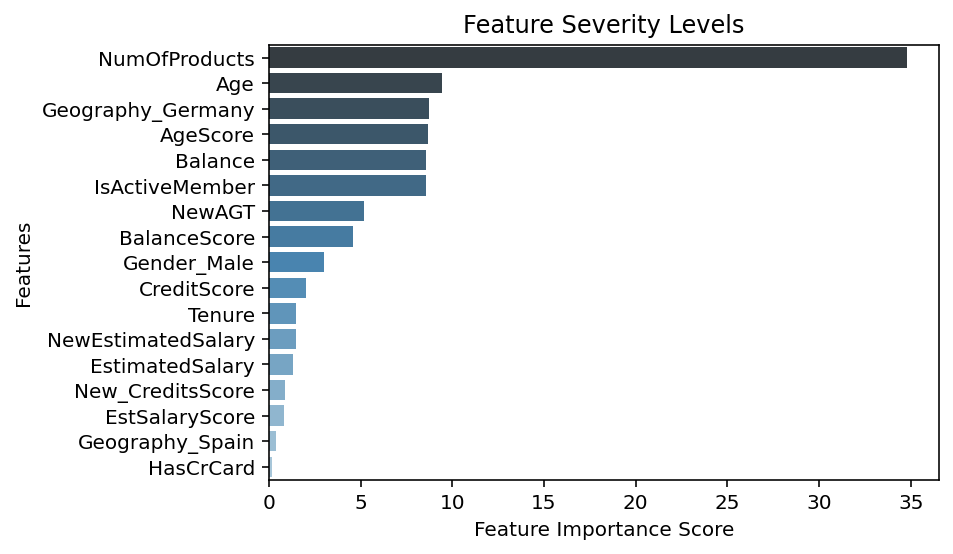

In [61]:
feature_imp = pd.Series(catboost_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

## Comparison of Final Models

In [62]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8,max_features = 7, min_samples_split = 10,n_estimators = 500))) 
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.1, max_depth = 3, min_samples_split = 0.1, n_estimators = 500, subsample = 0.9))) 
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01, max_depth = 5, n_estimators = 1000))) 
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, learning_rate = 0.01, max_depth = 5, n_estimators = 1000)))

results = [] 
names = []

In [63]:
for name, model in models:

    cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.866800 (0.007679)
XGB: 0.865900 (0.007489)
LightGBM: 0.866200 (0.007960)
0:	learn: 0.6852434	total: 6.72ms	remaining: 6.71s
1:	learn: 0.6784532	total: 13.1ms	remaining: 6.56s
2:	learn: 0.6709781	total: 20ms	remaining: 6.64s
3:	learn: 0.6632400	total: 27.6ms	remaining: 6.88s
4:	learn: 0.6556602	total: 35.2ms	remaining: 7.01s
5:	learn: 0.6483182	total: 42.5ms	remaining: 7.04s
6:	learn: 0.6414486	total: 50.1ms	remaining: 7.11s
7:	learn: 0.6345140	total: 57.9ms	remaining: 7.18s
8:	learn: 0.6278242	total: 65.6ms	remaining: 7.22s
9:	learn: 0.6219683	total: 73ms	remaining: 7.23s
10:	learn: 0.6160809	total: 80.8ms	remaining: 7.26s
11:	learn: 0.6095743	total: 88.4ms	remaining: 7.28s
12:	learn: 0.6040126	total: 95.7ms	remaining: 7.27s
13:	learn: 0.5989548	total: 104ms	remaining: 7.29s
14:	learn: 0.5932241	total: 111ms	remaining: 7.3s
15:	learn: 0.5876851	total: 119ms	remaining: 7.3s
16:	learn: 0.5819150	total: 126ms	remaining: 7.3s
17:	learn: 0.5776572	total: 134ms	remaining: 7.3s
18:	lear

183:	learn: 0.3539368	total: 771ms	remaining: 3.42s
184:	learn: 0.3537011	total: 775ms	remaining: 3.41s
185:	learn: 0.3534916	total: 778ms	remaining: 3.41s
186:	learn: 0.3533236	total: 782ms	remaining: 3.4s
187:	learn: 0.3531278	total: 785ms	remaining: 3.39s
188:	learn: 0.3528034	total: 789ms	remaining: 3.38s
189:	learn: 0.3526100	total: 793ms	remaining: 3.38s
190:	learn: 0.3523442	total: 796ms	remaining: 3.37s
191:	learn: 0.3520442	total: 800ms	remaining: 3.37s
192:	learn: 0.3518057	total: 804ms	remaining: 3.36s
193:	learn: 0.3516125	total: 807ms	remaining: 3.35s
194:	learn: 0.3513939	total: 811ms	remaining: 3.35s
195:	learn: 0.3510994	total: 814ms	remaining: 3.34s
196:	learn: 0.3508940	total: 818ms	remaining: 3.33s
197:	learn: 0.3506702	total: 821ms	remaining: 3.33s
198:	learn: 0.3504849	total: 825ms	remaining: 3.32s
199:	learn: 0.3503058	total: 829ms	remaining: 3.31s
200:	learn: 0.3500272	total: 833ms	remaining: 3.31s
201:	learn: 0.3498125	total: 836ms	remaining: 3.3s
202:	learn: 0.

350:	learn: 0.3309989	total: 1.37s	remaining: 2.53s
351:	learn: 0.3308773	total: 1.37s	remaining: 2.53s
352:	learn: 0.3308254	total: 1.38s	remaining: 2.52s
353:	learn: 0.3307864	total: 1.38s	remaining: 2.52s
354:	learn: 0.3307268	total: 1.39s	remaining: 2.52s
355:	learn: 0.3306892	total: 1.39s	remaining: 2.51s
356:	learn: 0.3305789	total: 1.39s	remaining: 2.51s
357:	learn: 0.3305264	total: 1.4s	remaining: 2.5s
358:	learn: 0.3304795	total: 1.4s	remaining: 2.5s
359:	learn: 0.3303741	total: 1.4s	remaining: 2.49s
360:	learn: 0.3302740	total: 1.41s	remaining: 2.49s
361:	learn: 0.3301449	total: 1.41s	remaining: 2.48s
362:	learn: 0.3300519	total: 1.41s	remaining: 2.48s
363:	learn: 0.3299454	total: 1.42s	remaining: 2.48s
364:	learn: 0.3298540	total: 1.42s	remaining: 2.47s
365:	learn: 0.3297330	total: 1.42s	remaining: 2.47s
366:	learn: 0.3297037	total: 1.43s	remaining: 2.46s
367:	learn: 0.3296113	total: 1.43s	remaining: 2.46s
368:	learn: 0.3295752	total: 1.44s	remaining: 2.45s
369:	learn: 0.329

560:	learn: 0.3195647	total: 2.17s	remaining: 1.7s
561:	learn: 0.3195212	total: 2.17s	remaining: 1.7s
562:	learn: 0.3194738	total: 2.18s	remaining: 1.69s
563:	learn: 0.3194410	total: 2.18s	remaining: 1.69s
564:	learn: 0.3193702	total: 2.19s	remaining: 1.68s
565:	learn: 0.3193122	total: 2.19s	remaining: 1.68s
566:	learn: 0.3192818	total: 2.2s	remaining: 1.68s
567:	learn: 0.3192361	total: 2.2s	remaining: 1.67s
568:	learn: 0.3191747	total: 2.21s	remaining: 1.67s
569:	learn: 0.3191378	total: 2.21s	remaining: 1.67s
570:	learn: 0.3190942	total: 2.21s	remaining: 1.66s
571:	learn: 0.3190584	total: 2.22s	remaining: 1.66s
572:	learn: 0.3190165	total: 2.22s	remaining: 1.66s
573:	learn: 0.3189776	total: 2.23s	remaining: 1.65s
574:	learn: 0.3189395	total: 2.23s	remaining: 1.65s
575:	learn: 0.3188987	total: 2.23s	remaining: 1.64s
576:	learn: 0.3188664	total: 2.24s	remaining: 1.64s
577:	learn: 0.3188337	total: 2.24s	remaining: 1.64s
578:	learn: 0.3188116	total: 2.25s	remaining: 1.63s
579:	learn: 0.31

763:	learn: 0.3123157	total: 2.96s	remaining: 916ms
764:	learn: 0.3122812	total: 2.97s	remaining: 912ms
765:	learn: 0.3122431	total: 2.97s	remaining: 908ms
766:	learn: 0.3121867	total: 2.98s	remaining: 904ms
767:	learn: 0.3121601	total: 2.98s	remaining: 900ms
768:	learn: 0.3121399	total: 2.98s	remaining: 896ms
769:	learn: 0.3121143	total: 2.99s	remaining: 892ms
770:	learn: 0.3120822	total: 2.99s	remaining: 888ms
771:	learn: 0.3120564	total: 2.99s	remaining: 884ms
772:	learn: 0.3120329	total: 3s	remaining: 880ms
773:	learn: 0.3119904	total: 3s	remaining: 876ms
774:	learn: 0.3119486	total: 3s	remaining: 872ms
775:	learn: 0.3118998	total: 3.01s	remaining: 868ms
776:	learn: 0.3118695	total: 3.01s	remaining: 865ms
777:	learn: 0.3118309	total: 3.02s	remaining: 861ms
778:	learn: 0.3117796	total: 3.02s	remaining: 857ms
779:	learn: 0.3117464	total: 3.02s	remaining: 853ms
780:	learn: 0.3117165	total: 3.03s	remaining: 849ms
781:	learn: 0.3116965	total: 3.03s	remaining: 845ms
782:	learn: 0.3116793

930:	learn: 0.3073288	total: 3.56s	remaining: 264ms
931:	learn: 0.3072968	total: 3.57s	remaining: 260ms
932:	learn: 0.3072600	total: 3.57s	remaining: 256ms
933:	learn: 0.3072382	total: 3.57s	remaining: 253ms
934:	learn: 0.3072109	total: 3.58s	remaining: 249ms
935:	learn: 0.3071694	total: 3.58s	remaining: 245ms
936:	learn: 0.3071278	total: 3.58s	remaining: 241ms
937:	learn: 0.3070981	total: 3.59s	remaining: 237ms
938:	learn: 0.3070538	total: 3.59s	remaining: 233ms
939:	learn: 0.3070321	total: 3.6s	remaining: 229ms
940:	learn: 0.3070059	total: 3.6s	remaining: 226ms
941:	learn: 0.3069777	total: 3.6s	remaining: 222ms
942:	learn: 0.3069520	total: 3.61s	remaining: 218ms
943:	learn: 0.3069214	total: 3.61s	remaining: 214ms
944:	learn: 0.3068915	total: 3.61s	remaining: 210ms
945:	learn: 0.3068676	total: 3.62s	remaining: 206ms
946:	learn: 0.3068193	total: 3.62s	remaining: 203ms
947:	learn: 0.3067783	total: 3.62s	remaining: 199ms
948:	learn: 0.3067551	total: 3.63s	remaining: 195ms
949:	learn: 0.3

133:	learn: 0.3685201	total: 488ms	remaining: 3.15s
134:	learn: 0.3680876	total: 492ms	remaining: 3.15s
135:	learn: 0.3676935	total: 496ms	remaining: 3.15s
136:	learn: 0.3673187	total: 499ms	remaining: 3.14s
137:	learn: 0.3667527	total: 503ms	remaining: 3.14s
138:	learn: 0.3663511	total: 507ms	remaining: 3.14s
139:	learn: 0.3657685	total: 512ms	remaining: 3.15s
140:	learn: 0.3654267	total: 517ms	remaining: 3.15s
141:	learn: 0.3650242	total: 521ms	remaining: 3.15s
142:	learn: 0.3645298	total: 526ms	remaining: 3.15s
143:	learn: 0.3641125	total: 530ms	remaining: 3.15s
144:	learn: 0.3635342	total: 536ms	remaining: 3.16s
145:	learn: 0.3631028	total: 540ms	remaining: 3.16s
146:	learn: 0.3625934	total: 545ms	remaining: 3.16s
147:	learn: 0.3622758	total: 549ms	remaining: 3.16s
148:	learn: 0.3617722	total: 553ms	remaining: 3.16s
149:	learn: 0.3614302	total: 558ms	remaining: 3.16s
150:	learn: 0.3609590	total: 562ms	remaining: 3.16s
151:	learn: 0.3605666	total: 566ms	remaining: 3.16s
152:	learn: 

291:	learn: 0.3339186	total: 1.08s	remaining: 2.62s
292:	learn: 0.3338495	total: 1.08s	remaining: 2.62s
293:	learn: 0.3337544	total: 1.09s	remaining: 2.61s
294:	learn: 0.3336689	total: 1.09s	remaining: 2.61s
295:	learn: 0.3335456	total: 1.1s	remaining: 2.61s
296:	learn: 0.3334504	total: 1.1s	remaining: 2.6s
297:	learn: 0.3333491	total: 1.1s	remaining: 2.6s
298:	learn: 0.3331773	total: 1.11s	remaining: 2.6s
299:	learn: 0.3331134	total: 1.11s	remaining: 2.59s
300:	learn: 0.3329260	total: 1.11s	remaining: 2.59s
301:	learn: 0.3328263	total: 1.12s	remaining: 2.58s
302:	learn: 0.3326956	total: 1.12s	remaining: 2.58s
303:	learn: 0.3326053	total: 1.13s	remaining: 2.58s
304:	learn: 0.3324711	total: 1.13s	remaining: 2.57s
305:	learn: 0.3323014	total: 1.13s	remaining: 2.57s
306:	learn: 0.3322341	total: 1.14s	remaining: 2.56s
307:	learn: 0.3321425	total: 1.14s	remaining: 2.56s
308:	learn: 0.3319644	total: 1.14s	remaining: 2.56s
309:	learn: 0.3318318	total: 1.15s	remaining: 2.55s
310:	learn: 0.3316

497:	learn: 0.3197175	total: 1.88s	remaining: 1.89s
498:	learn: 0.3196740	total: 1.88s	remaining: 1.89s
499:	learn: 0.3196007	total: 1.88s	remaining: 1.88s
500:	learn: 0.3195677	total: 1.89s	remaining: 1.88s
501:	learn: 0.3195088	total: 1.89s	remaining: 1.88s
502:	learn: 0.3194648	total: 1.89s	remaining: 1.87s
503:	learn: 0.3194273	total: 1.9s	remaining: 1.87s
504:	learn: 0.3193957	total: 1.9s	remaining: 1.86s
505:	learn: 0.3193639	total: 1.91s	remaining: 1.86s
506:	learn: 0.3192789	total: 1.91s	remaining: 1.86s
507:	learn: 0.3192436	total: 1.91s	remaining: 1.85s
508:	learn: 0.3191640	total: 1.92s	remaining: 1.85s
509:	learn: 0.3191269	total: 1.92s	remaining: 1.84s
510:	learn: 0.3190946	total: 1.92s	remaining: 1.84s
511:	learn: 0.3190598	total: 1.93s	remaining: 1.84s
512:	learn: 0.3190543	total: 1.93s	remaining: 1.83s
513:	learn: 0.3190161	total: 1.93s	remaining: 1.83s
514:	learn: 0.3189740	total: 1.94s	remaining: 1.82s
515:	learn: 0.3189377	total: 1.94s	remaining: 1.82s
516:	learn: 0.

661:	learn: 0.3132785	total: 2.47s	remaining: 1.26s
662:	learn: 0.3132347	total: 2.47s	remaining: 1.26s
663:	learn: 0.3132012	total: 2.48s	remaining: 1.25s
664:	learn: 0.3131795	total: 2.48s	remaining: 1.25s
665:	learn: 0.3131600	total: 2.48s	remaining: 1.25s
666:	learn: 0.3131277	total: 2.49s	remaining: 1.24s
667:	learn: 0.3130798	total: 2.49s	remaining: 1.24s
668:	learn: 0.3130504	total: 2.49s	remaining: 1.23s
669:	learn: 0.3130052	total: 2.5s	remaining: 1.23s
670:	learn: 0.3129743	total: 2.5s	remaining: 1.23s
671:	learn: 0.3129476	total: 2.5s	remaining: 1.22s
672:	learn: 0.3129298	total: 2.51s	remaining: 1.22s
673:	learn: 0.3128955	total: 2.51s	remaining: 1.22s
674:	learn: 0.3128598	total: 2.52s	remaining: 1.21s
675:	learn: 0.3128325	total: 2.52s	remaining: 1.21s
676:	learn: 0.3128146	total: 2.52s	remaining: 1.2s
677:	learn: 0.3127792	total: 2.53s	remaining: 1.2s
678:	learn: 0.3127455	total: 2.53s	remaining: 1.2s
679:	learn: 0.3127267	total: 2.53s	remaining: 1.19s
680:	learn: 0.3126

863:	learn: 0.3065656	total: 3.27s	remaining: 514ms
864:	learn: 0.3065376	total: 3.27s	remaining: 511ms
865:	learn: 0.3065059	total: 3.28s	remaining: 507ms
866:	learn: 0.3064740	total: 3.28s	remaining: 503ms
867:	learn: 0.3064447	total: 3.29s	remaining: 500ms
868:	learn: 0.3064220	total: 3.29s	remaining: 496ms
869:	learn: 0.3063885	total: 3.29s	remaining: 492ms
870:	learn: 0.3063600	total: 3.3s	remaining: 488ms
871:	learn: 0.3063127	total: 3.3s	remaining: 485ms
872:	learn: 0.3062709	total: 3.31s	remaining: 481ms
873:	learn: 0.3062464	total: 3.31s	remaining: 477ms
874:	learn: 0.3062088	total: 3.31s	remaining: 473ms
875:	learn: 0.3061732	total: 3.32s	remaining: 470ms
876:	learn: 0.3061551	total: 3.32s	remaining: 466ms
877:	learn: 0.3061293	total: 3.33s	remaining: 462ms
878:	learn: 0.3061058	total: 3.33s	remaining: 459ms
879:	learn: 0.3060537	total: 3.33s	remaining: 455ms
880:	learn: 0.3060264	total: 3.34s	remaining: 451ms
881:	learn: 0.3060105	total: 3.34s	remaining: 447ms
882:	learn: 0.

53:	learn: 0.4582278	total: 209ms	remaining: 3.67s
54:	learn: 0.4564974	total: 213ms	remaining: 3.67s
55:	learn: 0.4544575	total: 217ms	remaining: 3.67s
56:	learn: 0.4518488	total: 222ms	remaining: 3.67s
57:	learn: 0.4501030	total: 226ms	remaining: 3.66s
58:	learn: 0.4480086	total: 230ms	remaining: 3.67s
59:	learn: 0.4462356	total: 234ms	remaining: 3.66s
60:	learn: 0.4439410	total: 238ms	remaining: 3.66s
61:	learn: 0.4424792	total: 242ms	remaining: 3.66s
62:	learn: 0.4409549	total: 246ms	remaining: 3.66s
63:	learn: 0.4388923	total: 250ms	remaining: 3.66s
64:	learn: 0.4372279	total: 254ms	remaining: 3.66s
65:	learn: 0.4356563	total: 258ms	remaining: 3.66s
66:	learn: 0.4341933	total: 262ms	remaining: 3.65s
67:	learn: 0.4326651	total: 266ms	remaining: 3.65s
68:	learn: 0.4312886	total: 271ms	remaining: 3.65s
69:	learn: 0.4295748	total: 275ms	remaining: 3.65s
70:	learn: 0.4280088	total: 279ms	remaining: 3.65s
71:	learn: 0.4267915	total: 283ms	remaining: 3.64s
72:	learn: 0.4254878	total: 287

249:	learn: 0.3414125	total: 1s	remaining: 3.02s
250:	learn: 0.3411871	total: 1.01s	remaining: 3.01s
251:	learn: 0.3410626	total: 1.01s	remaining: 3.01s
252:	learn: 0.3409880	total: 1.02s	remaining: 3s
253:	learn: 0.3409060	total: 1.02s	remaining: 3s
254:	learn: 0.3407707	total: 1.02s	remaining: 3s
255:	learn: 0.3406585	total: 1.03s	remaining: 2.99s
256:	learn: 0.3405299	total: 1.03s	remaining: 2.99s
257:	learn: 0.3404059	total: 1.04s	remaining: 2.98s
258:	learn: 0.3403358	total: 1.04s	remaining: 2.98s
259:	learn: 0.3401544	total: 1.04s	remaining: 2.98s
260:	learn: 0.3400563	total: 1.05s	remaining: 2.97s
261:	learn: 0.3399597	total: 1.05s	remaining: 2.97s
262:	learn: 0.3399167	total: 1.06s	remaining: 2.96s
263:	learn: 0.3398457	total: 1.06s	remaining: 2.96s
264:	learn: 0.3397128	total: 1.06s	remaining: 2.95s
265:	learn: 0.3396352	total: 1.07s	remaining: 2.95s
266:	learn: 0.3395253	total: 1.07s	remaining: 2.94s
267:	learn: 0.3393660	total: 1.08s	remaining: 2.94s
268:	learn: 0.3392586	to

448:	learn: 0.3255536	total: 1.8s	remaining: 2.21s
449:	learn: 0.3255284	total: 1.81s	remaining: 2.21s
450:	learn: 0.3254926	total: 1.81s	remaining: 2.21s
451:	learn: 0.3254096	total: 1.82s	remaining: 2.2s
452:	learn: 0.3253583	total: 1.82s	remaining: 2.2s
453:	learn: 0.3252988	total: 1.82s	remaining: 2.19s
454:	learn: 0.3252705	total: 1.83s	remaining: 2.19s
455:	learn: 0.3252252	total: 1.83s	remaining: 2.19s
456:	learn: 0.3251443	total: 1.84s	remaining: 2.18s
457:	learn: 0.3251208	total: 1.84s	remaining: 2.18s
458:	learn: 0.3250772	total: 1.84s	remaining: 2.17s
459:	learn: 0.3250125	total: 1.85s	remaining: 2.17s
460:	learn: 0.3249230	total: 1.85s	remaining: 2.17s
461:	learn: 0.3248942	total: 1.86s	remaining: 2.16s
462:	learn: 0.3248537	total: 1.86s	remaining: 2.16s
463:	learn: 0.3248103	total: 1.86s	remaining: 2.15s
464:	learn: 0.3247727	total: 1.87s	remaining: 2.15s
465:	learn: 0.3247387	total: 1.87s	remaining: 2.15s
466:	learn: 0.3246771	total: 1.88s	remaining: 2.14s
467:	learn: 0.3

654:	learn: 0.3171671	total: 2.6s	remaining: 1.37s
655:	learn: 0.3171155	total: 2.6s	remaining: 1.36s
656:	learn: 0.3170797	total: 2.61s	remaining: 1.36s
657:	learn: 0.3170336	total: 2.61s	remaining: 1.36s
658:	learn: 0.3169850	total: 2.61s	remaining: 1.35s
659:	learn: 0.3169417	total: 2.62s	remaining: 1.35s
660:	learn: 0.3169171	total: 2.62s	remaining: 1.34s
661:	learn: 0.3168972	total: 2.63s	remaining: 1.34s
662:	learn: 0.3168657	total: 2.63s	remaining: 1.34s
663:	learn: 0.3168465	total: 2.63s	remaining: 1.33s
664:	learn: 0.3168152	total: 2.63s	remaining: 1.33s
665:	learn: 0.3167649	total: 2.64s	remaining: 1.32s
666:	learn: 0.3167310	total: 2.64s	remaining: 1.32s
667:	learn: 0.3166941	total: 2.65s	remaining: 1.31s
668:	learn: 0.3166602	total: 2.65s	remaining: 1.31s
669:	learn: 0.3166186	total: 2.65s	remaining: 1.31s
670:	learn: 0.3165842	total: 2.66s	remaining: 1.3s
671:	learn: 0.3165652	total: 2.66s	remaining: 1.3s
672:	learn: 0.3165459	total: 2.66s	remaining: 1.29s
673:	learn: 0.31

814:	learn: 0.3117972	total: 3.2s	remaining: 726ms
815:	learn: 0.3117699	total: 3.2s	remaining: 722ms
816:	learn: 0.3117347	total: 3.21s	remaining: 718ms
817:	learn: 0.3116988	total: 3.21s	remaining: 714ms
818:	learn: 0.3116637	total: 3.21s	remaining: 710ms
819:	learn: 0.3116464	total: 3.22s	remaining: 706ms
820:	learn: 0.3116148	total: 3.22s	remaining: 702ms
821:	learn: 0.3115785	total: 3.22s	remaining: 698ms
822:	learn: 0.3115420	total: 3.23s	remaining: 694ms
823:	learn: 0.3115165	total: 3.23s	remaining: 690ms
824:	learn: 0.3114783	total: 3.23s	remaining: 686ms
825:	learn: 0.3114546	total: 3.24s	remaining: 682ms
826:	learn: 0.3114327	total: 3.24s	remaining: 678ms
827:	learn: 0.3113960	total: 3.25s	remaining: 674ms
828:	learn: 0.3113728	total: 3.25s	remaining: 670ms
829:	learn: 0.3113337	total: 3.25s	remaining: 666ms
830:	learn: 0.3113046	total: 3.25s	remaining: 662ms
831:	learn: 0.3112903	total: 3.26s	remaining: 658ms
832:	learn: 0.3112657	total: 3.26s	remaining: 654ms
833:	learn: 0.

982:	learn: 0.3065207	total: 3.8s	remaining: 65.7ms
983:	learn: 0.3064938	total: 3.8s	remaining: 61.9ms
984:	learn: 0.3064706	total: 3.81s	remaining: 58ms
985:	learn: 0.3064481	total: 3.81s	remaining: 54.1ms
986:	learn: 0.3064102	total: 3.81s	remaining: 50.2ms
987:	learn: 0.3063719	total: 3.82s	remaining: 46.4ms
988:	learn: 0.3063419	total: 3.82s	remaining: 42.5ms
989:	learn: 0.3063212	total: 3.82s	remaining: 38.6ms
990:	learn: 0.3062852	total: 3.83s	remaining: 34.8ms
991:	learn: 0.3062556	total: 3.83s	remaining: 30.9ms
992:	learn: 0.3062044	total: 3.83s	remaining: 27ms
993:	learn: 0.3061748	total: 3.84s	remaining: 23.2ms
994:	learn: 0.3061487	total: 3.84s	remaining: 19.3ms
995:	learn: 0.3061174	total: 3.85s	remaining: 15.4ms
996:	learn: 0.3060932	total: 3.85s	remaining: 11.6ms
997:	learn: 0.3060588	total: 3.85s	remaining: 7.72ms
998:	learn: 0.3060213	total: 3.86s	remaining: 3.86ms
999:	learn: 0.3059843	total: 3.86s	remaining: 0us
0:	learn: 0.6851894	total: 4.29ms	remaining: 4.29s
1:	l

170:	learn: 0.3552189	total: 678ms	remaining: 3.29s
171:	learn: 0.3550300	total: 682ms	remaining: 3.28s
172:	learn: 0.3545609	total: 686ms	remaining: 3.28s
173:	learn: 0.3543314	total: 689ms	remaining: 3.27s
174:	learn: 0.3540963	total: 693ms	remaining: 3.27s
175:	learn: 0.3538798	total: 696ms	remaining: 3.26s
176:	learn: 0.3536175	total: 700ms	remaining: 3.25s
177:	learn: 0.3533334	total: 703ms	remaining: 3.25s
178:	learn: 0.3529853	total: 707ms	remaining: 3.24s
179:	learn: 0.3527595	total: 710ms	remaining: 3.24s
180:	learn: 0.3524153	total: 714ms	remaining: 3.23s
181:	learn: 0.3521045	total: 718ms	remaining: 3.23s
182:	learn: 0.3517841	total: 721ms	remaining: 3.22s
183:	learn: 0.3515861	total: 725ms	remaining: 3.21s
184:	learn: 0.3513923	total: 728ms	remaining: 3.21s
185:	learn: 0.3511349	total: 732ms	remaining: 3.2s
186:	learn: 0.3508539	total: 735ms	remaining: 3.2s
187:	learn: 0.3506754	total: 739ms	remaining: 3.19s
188:	learn: 0.3504428	total: 743ms	remaining: 3.19s
189:	learn: 0.

333:	learn: 0.3308210	total: 1.27s	remaining: 2.54s
334:	learn: 0.3307398	total: 1.27s	remaining: 2.53s
335:	learn: 0.3306754	total: 1.28s	remaining: 2.53s
336:	learn: 0.3305858	total: 1.28s	remaining: 2.52s
337:	learn: 0.3305292	total: 1.29s	remaining: 2.52s
338:	learn: 0.3304688	total: 1.29s	remaining: 2.51s
339:	learn: 0.3303973	total: 1.29s	remaining: 2.51s
340:	learn: 0.3302727	total: 1.3s	remaining: 2.5s
341:	learn: 0.3302259	total: 1.3s	remaining: 2.5s
342:	learn: 0.3301298	total: 1.3s	remaining: 2.5s
343:	learn: 0.3300493	total: 1.31s	remaining: 2.49s
344:	learn: 0.3299920	total: 1.31s	remaining: 2.49s
345:	learn: 0.3299291	total: 1.31s	remaining: 2.48s
346:	learn: 0.3298655	total: 1.32s	remaining: 2.48s
347:	learn: 0.3297179	total: 1.32s	remaining: 2.48s
348:	learn: 0.3296057	total: 1.32s	remaining: 2.47s
349:	learn: 0.3295465	total: 1.33s	remaining: 2.47s
350:	learn: 0.3294514	total: 1.33s	remaining: 2.46s
351:	learn: 0.3293861	total: 1.34s	remaining: 2.46s
352:	learn: 0.3293

499:	learn: 0.3208012	total: 1.87s	remaining: 1.87s
500:	learn: 0.3207427	total: 1.87s	remaining: 1.86s
501:	learn: 0.3206458	total: 1.88s	remaining: 1.86s
502:	learn: 0.3205881	total: 1.88s	remaining: 1.86s
503:	learn: 0.3205356	total: 1.88s	remaining: 1.85s
504:	learn: 0.3204958	total: 1.89s	remaining: 1.85s
505:	learn: 0.3204669	total: 1.89s	remaining: 1.84s
506:	learn: 0.3203917	total: 1.89s	remaining: 1.84s
507:	learn: 0.3203016	total: 1.9s	remaining: 1.84s
508:	learn: 0.3202710	total: 1.9s	remaining: 1.83s
509:	learn: 0.3202283	total: 1.9s	remaining: 1.83s
510:	learn: 0.3201980	total: 1.91s	remaining: 1.82s
511:	learn: 0.3201506	total: 1.91s	remaining: 1.82s
512:	learn: 0.3201163	total: 1.91s	remaining: 1.82s
513:	learn: 0.3200656	total: 1.92s	remaining: 1.81s
514:	learn: 0.3200100	total: 1.92s	remaining: 1.81s
515:	learn: 0.3199843	total: 1.93s	remaining: 1.81s
516:	learn: 0.3199556	total: 1.93s	remaining: 1.8s
517:	learn: 0.3198909	total: 1.93s	remaining: 1.8s
518:	learn: 0.319

660:	learn: 0.3146537	total: 2.47s	remaining: 1.26s
661:	learn: 0.3146165	total: 2.47s	remaining: 1.26s
662:	learn: 0.3145865	total: 2.48s	remaining: 1.26s
663:	learn: 0.3145600	total: 2.48s	remaining: 1.25s
664:	learn: 0.3145175	total: 2.48s	remaining: 1.25s
665:	learn: 0.3144605	total: 2.49s	remaining: 1.25s
666:	learn: 0.3144185	total: 2.49s	remaining: 1.24s
667:	learn: 0.3143661	total: 2.5s	remaining: 1.24s
668:	learn: 0.3143185	total: 2.5s	remaining: 1.24s
669:	learn: 0.3142901	total: 2.5s	remaining: 1.23s
670:	learn: 0.3142402	total: 2.51s	remaining: 1.23s
671:	learn: 0.3142120	total: 2.51s	remaining: 1.23s
672:	learn: 0.3141618	total: 2.52s	remaining: 1.22s
673:	learn: 0.3141095	total: 2.52s	remaining: 1.22s
674:	learn: 0.3140669	total: 2.52s	remaining: 1.22s
675:	learn: 0.3140398	total: 2.53s	remaining: 1.21s
676:	learn: 0.3139979	total: 2.53s	remaining: 1.21s
677:	learn: 0.3139733	total: 2.54s	remaining: 1.21s
678:	learn: 0.3139092	total: 2.54s	remaining: 1.2s
679:	learn: 0.31

872:	learn: 0.3076672	total: 3.27s	remaining: 475ms
873:	learn: 0.3076340	total: 3.27s	remaining: 471ms
874:	learn: 0.3076100	total: 3.27s	remaining: 468ms
875:	learn: 0.3075751	total: 3.28s	remaining: 464ms
876:	learn: 0.3075559	total: 3.28s	remaining: 460ms
877:	learn: 0.3075260	total: 3.28s	remaining: 456ms
878:	learn: 0.3074951	total: 3.29s	remaining: 453ms
879:	learn: 0.3074735	total: 3.29s	remaining: 449ms
880:	learn: 0.3074484	total: 3.29s	remaining: 445ms
881:	learn: 0.3074241	total: 3.3s	remaining: 441ms
882:	learn: 0.3073805	total: 3.3s	remaining: 438ms
883:	learn: 0.3073626	total: 3.31s	remaining: 434ms
884:	learn: 0.3073385	total: 3.31s	remaining: 430ms
885:	learn: 0.3073183	total: 3.31s	remaining: 426ms
886:	learn: 0.3072776	total: 3.32s	remaining: 423ms
887:	learn: 0.3072533	total: 3.32s	remaining: 419ms
888:	learn: 0.3072286	total: 3.32s	remaining: 415ms
889:	learn: 0.3071878	total: 3.33s	remaining: 411ms
890:	learn: 0.3071622	total: 3.33s	remaining: 408ms
891:	learn: 0.

79:	learn: 0.4123654	total: 289ms	remaining: 3.33s
80:	learn: 0.4111163	total: 293ms	remaining: 3.33s
81:	learn: 0.4102179	total: 297ms	remaining: 3.32s
82:	learn: 0.4089338	total: 300ms	remaining: 3.32s
83:	learn: 0.4077200	total: 304ms	remaining: 3.31s
84:	learn: 0.4065399	total: 308ms	remaining: 3.31s
85:	learn: 0.4054453	total: 312ms	remaining: 3.31s
86:	learn: 0.4043759	total: 315ms	remaining: 3.31s
87:	learn: 0.4033362	total: 319ms	remaining: 3.3s
88:	learn: 0.4023974	total: 322ms	remaining: 3.29s
89:	learn: 0.4011018	total: 326ms	remaining: 3.29s
90:	learn: 0.3999645	total: 329ms	remaining: 3.29s
91:	learn: 0.3990657	total: 333ms	remaining: 3.29s
92:	learn: 0.3979766	total: 337ms	remaining: 3.28s
93:	learn: 0.3968617	total: 340ms	remaining: 3.28s
94:	learn: 0.3958187	total: 344ms	remaining: 3.28s
95:	learn: 0.3947276	total: 348ms	remaining: 3.27s
96:	learn: 0.3936705	total: 351ms	remaining: 3.27s
97:	learn: 0.3930172	total: 355ms	remaining: 3.27s
98:	learn: 0.3922771	total: 359m

288:	learn: 0.3354236	total: 1.08s	remaining: 2.66s
289:	learn: 0.3352940	total: 1.09s	remaining: 2.66s
290:	learn: 0.3352340	total: 1.09s	remaining: 2.66s
291:	learn: 0.3350443	total: 1.1s	remaining: 2.66s
292:	learn: 0.3349672	total: 1.1s	remaining: 2.66s
293:	learn: 0.3347978	total: 1.11s	remaining: 2.66s
294:	learn: 0.3347365	total: 1.11s	remaining: 2.65s
295:	learn: 0.3346844	total: 1.11s	remaining: 2.65s
296:	learn: 0.3345759	total: 1.12s	remaining: 2.65s
297:	learn: 0.3344155	total: 1.12s	remaining: 2.64s
298:	learn: 0.3343496	total: 1.13s	remaining: 2.64s
299:	learn: 0.3341554	total: 1.13s	remaining: 2.63s
300:	learn: 0.3340472	total: 1.13s	remaining: 2.63s
301:	learn: 0.3339828	total: 1.14s	remaining: 2.63s
302:	learn: 0.3338913	total: 1.14s	remaining: 2.62s
303:	learn: 0.3337382	total: 1.14s	remaining: 2.62s
304:	learn: 0.3336815	total: 1.15s	remaining: 2.61s
305:	learn: 0.3335351	total: 1.15s	remaining: 2.61s
306:	learn: 0.3334574	total: 1.15s	remaining: 2.6s
307:	learn: 0.3

449:	learn: 0.3236389	total: 1.68s	remaining: 2.06s
450:	learn: 0.3235919	total: 1.69s	remaining: 2.05s
451:	learn: 0.3235073	total: 1.69s	remaining: 2.05s
452:	learn: 0.3234020	total: 1.69s	remaining: 2.04s
453:	learn: 0.3233304	total: 1.7s	remaining: 2.04s
454:	learn: 0.3232602	total: 1.7s	remaining: 2.04s
455:	learn: 0.3232267	total: 1.7s	remaining: 2.03s
456:	learn: 0.3231903	total: 1.71s	remaining: 2.03s
457:	learn: 0.3231115	total: 1.71s	remaining: 2.02s
458:	learn: 0.3230500	total: 1.71s	remaining: 2.02s
459:	learn: 0.3230039	total: 1.72s	remaining: 2.02s
460:	learn: 0.3229117	total: 1.72s	remaining: 2.01s
461:	learn: 0.3228338	total: 1.73s	remaining: 2.01s
462:	learn: 0.3227972	total: 1.73s	remaining: 2s
463:	learn: 0.3227109	total: 1.74s	remaining: 2s
464:	learn: 0.3226669	total: 1.74s	remaining: 2s
465:	learn: 0.3226112	total: 1.75s	remaining: 2s
466:	learn: 0.3225765	total: 1.75s	remaining: 2s
467:	learn: 0.3225327	total: 1.75s	remaining: 1.99s
468:	learn: 0.3224684	total: 1

613:	learn: 0.3162632	total: 2.28s	remaining: 1.43s
614:	learn: 0.3162365	total: 2.29s	remaining: 1.43s
615:	learn: 0.3161924	total: 2.29s	remaining: 1.43s
616:	learn: 0.3161535	total: 2.29s	remaining: 1.42s
617:	learn: 0.3161250	total: 2.3s	remaining: 1.42s
618:	learn: 0.3160812	total: 2.3s	remaining: 1.42s
619:	learn: 0.3160469	total: 2.3s	remaining: 1.41s
620:	learn: 0.3159852	total: 2.31s	remaining: 1.41s
621:	learn: 0.3159620	total: 2.31s	remaining: 1.4s
622:	learn: 0.3159309	total: 2.31s	remaining: 1.4s
623:	learn: 0.3159119	total: 2.32s	remaining: 1.4s
624:	learn: 0.3158640	total: 2.32s	remaining: 1.39s
625:	learn: 0.3158445	total: 2.33s	remaining: 1.39s
626:	learn: 0.3158122	total: 2.33s	remaining: 1.39s
627:	learn: 0.3157478	total: 2.33s	remaining: 1.38s
628:	learn: 0.3157304	total: 2.34s	remaining: 1.38s
629:	learn: 0.3156996	total: 2.34s	remaining: 1.37s
630:	learn: 0.3156602	total: 2.34s	remaining: 1.37s
631:	learn: 0.3156335	total: 2.35s	remaining: 1.37s
632:	learn: 0.3156

780:	learn: 0.3105429	total: 2.88s	remaining: 808ms
781:	learn: 0.3105100	total: 2.88s	remaining: 804ms
782:	learn: 0.3104770	total: 2.89s	remaining: 801ms
783:	learn: 0.3104315	total: 2.89s	remaining: 797ms
784:	learn: 0.3104092	total: 2.9s	remaining: 793ms
785:	learn: 0.3103848	total: 2.9s	remaining: 789ms
786:	learn: 0.3103503	total: 2.9s	remaining: 786ms
787:	learn: 0.3103301	total: 2.91s	remaining: 782ms
788:	learn: 0.3103086	total: 2.91s	remaining: 778ms
789:	learn: 0.3102666	total: 2.91s	remaining: 775ms
790:	learn: 0.3102185	total: 2.92s	remaining: 771ms
791:	learn: 0.3101696	total: 2.92s	remaining: 767ms
792:	learn: 0.3101298	total: 2.92s	remaining: 763ms
793:	learn: 0.3101022	total: 2.93s	remaining: 760ms
794:	learn: 0.3100774	total: 2.93s	remaining: 756ms
795:	learn: 0.3100497	total: 2.93s	remaining: 752ms
796:	learn: 0.3100196	total: 2.94s	remaining: 748ms
797:	learn: 0.3099742	total: 2.94s	remaining: 745ms
798:	learn: 0.3099474	total: 2.94s	remaining: 741ms
799:	learn: 0.3

947:	learn: 0.3053532	total: 3.48s	remaining: 191ms
948:	learn: 0.3053275	total: 3.49s	remaining: 187ms
949:	learn: 0.3053029	total: 3.49s	remaining: 184ms
950:	learn: 0.3052774	total: 3.49s	remaining: 180ms
951:	learn: 0.3052354	total: 3.5s	remaining: 176ms
952:	learn: 0.3052149	total: 3.5s	remaining: 173ms
953:	learn: 0.3051763	total: 3.5s	remaining: 169ms
954:	learn: 0.3051316	total: 3.51s	remaining: 165ms
955:	learn: 0.3050912	total: 3.51s	remaining: 162ms
956:	learn: 0.3050535	total: 3.52s	remaining: 158ms
957:	learn: 0.3050242	total: 3.52s	remaining: 154ms
958:	learn: 0.3049981	total: 3.52s	remaining: 151ms
959:	learn: 0.3049546	total: 3.53s	remaining: 147ms
960:	learn: 0.3049164	total: 3.53s	remaining: 143ms
961:	learn: 0.3048937	total: 3.53s	remaining: 140ms
962:	learn: 0.3048621	total: 3.54s	remaining: 136ms
963:	learn: 0.3048487	total: 3.54s	remaining: 132ms
964:	learn: 0.3048171	total: 3.54s	remaining: 129ms
965:	learn: 0.3047812	total: 3.55s	remaining: 125ms
966:	learn: 0.3

148:	learn: 0.3608241	total: 602ms	remaining: 3.44s
149:	learn: 0.3602318	total: 606ms	remaining: 3.43s
150:	learn: 0.3598759	total: 609ms	remaining: 3.43s
151:	learn: 0.3594139	total: 613ms	remaining: 3.42s
152:	learn: 0.3590145	total: 618ms	remaining: 3.42s
153:	learn: 0.3586476	total: 622ms	remaining: 3.42s
154:	learn: 0.3581644	total: 626ms	remaining: 3.41s
155:	learn: 0.3578703	total: 630ms	remaining: 3.41s
156:	learn: 0.3574385	total: 634ms	remaining: 3.4s
157:	learn: 0.3571348	total: 638ms	remaining: 3.4s
158:	learn: 0.3568044	total: 642ms	remaining: 3.4s
159:	learn: 0.3564823	total: 646ms	remaining: 3.39s
160:	learn: 0.3561847	total: 650ms	remaining: 3.39s
161:	learn: 0.3557846	total: 654ms	remaining: 3.38s
162:	learn: 0.3554306	total: 658ms	remaining: 3.38s
163:	learn: 0.3551033	total: 662ms	remaining: 3.38s
164:	learn: 0.3547694	total: 666ms	remaining: 3.37s
165:	learn: 0.3543631	total: 671ms	remaining: 3.37s
166:	learn: 0.3541389	total: 675ms	remaining: 3.37s
167:	learn: 0.3

345:	learn: 0.3275295	total: 1.4s	remaining: 2.64s
346:	learn: 0.3274285	total: 1.4s	remaining: 2.64s
347:	learn: 0.3273765	total: 1.4s	remaining: 2.63s
348:	learn: 0.3273063	total: 1.41s	remaining: 2.63s
349:	learn: 0.3272306	total: 1.41s	remaining: 2.62s
350:	learn: 0.3271458	total: 1.42s	remaining: 2.62s
351:	learn: 0.3270023	total: 1.42s	remaining: 2.62s
352:	learn: 0.3269226	total: 1.42s	remaining: 2.61s
353:	learn: 0.3267888	total: 1.43s	remaining: 2.61s
354:	learn: 0.3267579	total: 1.43s	remaining: 2.6s
355:	learn: 0.3266800	total: 1.44s	remaining: 2.6s
356:	learn: 0.3266240	total: 1.44s	remaining: 2.59s
357:	learn: 0.3265416	total: 1.44s	remaining: 2.59s
358:	learn: 0.3264914	total: 1.45s	remaining: 2.59s
359:	learn: 0.3264417	total: 1.45s	remaining: 2.58s
360:	learn: 0.3263501	total: 1.46s	remaining: 2.58s
361:	learn: 0.3262955	total: 1.46s	remaining: 2.57s
362:	learn: 0.3261693	total: 1.46s	remaining: 2.57s
363:	learn: 0.3260741	total: 1.47s	remaining: 2.57s
364:	learn: 0.325

542:	learn: 0.3164743	total: 2.19s	remaining: 1.84s
543:	learn: 0.3164355	total: 2.19s	remaining: 1.84s
544:	learn: 0.3163846	total: 2.2s	remaining: 1.83s
545:	learn: 0.3163446	total: 2.2s	remaining: 1.83s
546:	learn: 0.3162853	total: 2.21s	remaining: 1.83s
547:	learn: 0.3162659	total: 2.21s	remaining: 1.82s
548:	learn: 0.3162161	total: 2.21s	remaining: 1.82s
549:	learn: 0.3161874	total: 2.22s	remaining: 1.81s
550:	learn: 0.3161455	total: 2.22s	remaining: 1.81s
551:	learn: 0.3161073	total: 2.22s	remaining: 1.8s
552:	learn: 0.3160758	total: 2.23s	remaining: 1.8s
553:	learn: 0.3160293	total: 2.23s	remaining: 1.8s
554:	learn: 0.3159619	total: 2.23s	remaining: 1.79s
555:	learn: 0.3159335	total: 2.24s	remaining: 1.79s
556:	learn: 0.3158997	total: 2.24s	remaining: 1.78s
557:	learn: 0.3158638	total: 2.25s	remaining: 1.78s
558:	learn: 0.3158144	total: 2.25s	remaining: 1.77s
559:	learn: 0.3157588	total: 2.25s	remaining: 1.77s
560:	learn: 0.3157189	total: 2.26s	remaining: 1.76s
561:	learn: 0.315

709:	learn: 0.3100866	total: 2.79s	remaining: 1.14s
710:	learn: 0.3100426	total: 2.79s	remaining: 1.14s
711:	learn: 0.3100267	total: 2.8s	remaining: 1.13s
712:	learn: 0.3099802	total: 2.8s	remaining: 1.13s
713:	learn: 0.3099479	total: 2.81s	remaining: 1.12s
714:	learn: 0.3098999	total: 2.81s	remaining: 1.12s
715:	learn: 0.3098683	total: 2.81s	remaining: 1.11s
716:	learn: 0.3098221	total: 2.82s	remaining: 1.11s
717:	learn: 0.3097939	total: 2.82s	remaining: 1.11s
718:	learn: 0.3097668	total: 2.82s	remaining: 1.1s
719:	learn: 0.3097310	total: 2.83s	remaining: 1.1s
720:	learn: 0.3097069	total: 2.83s	remaining: 1.09s
721:	learn: 0.3096889	total: 2.84s	remaining: 1.09s
722:	learn: 0.3096671	total: 2.84s	remaining: 1.09s
723:	learn: 0.3096300	total: 2.84s	remaining: 1.08s
724:	learn: 0.3095897	total: 2.85s	remaining: 1.08s
725:	learn: 0.3095452	total: 2.85s	remaining: 1.08s
726:	learn: 0.3095238	total: 2.86s	remaining: 1.07s
727:	learn: 0.3095016	total: 2.86s	remaining: 1.07s
728:	learn: 0.30

873:	learn: 0.3047546	total: 3.39s	remaining: 488ms
874:	learn: 0.3047250	total: 3.39s	remaining: 484ms
875:	learn: 0.3047041	total: 3.39s	remaining: 481ms
876:	learn: 0.3046752	total: 3.4s	remaining: 477ms
877:	learn: 0.3046280	total: 3.4s	remaining: 473ms
878:	learn: 0.3046019	total: 3.4s	remaining: 469ms
879:	learn: 0.3045715	total: 3.41s	remaining: 465ms
880:	learn: 0.3045578	total: 3.41s	remaining: 461ms
881:	learn: 0.3045251	total: 3.42s	remaining: 457ms
882:	learn: 0.3044973	total: 3.42s	remaining: 453ms
883:	learn: 0.3044638	total: 3.42s	remaining: 449ms
884:	learn: 0.3044372	total: 3.43s	remaining: 445ms
885:	learn: 0.3044106	total: 3.43s	remaining: 441ms
886:	learn: 0.3043914	total: 3.43s	remaining: 437ms
887:	learn: 0.3043707	total: 3.44s	remaining: 434ms
888:	learn: 0.3043505	total: 3.44s	remaining: 430ms
889:	learn: 0.3043117	total: 3.44s	remaining: 426ms
890:	learn: 0.3042723	total: 3.45s	remaining: 422ms
891:	learn: 0.3042351	total: 3.45s	remaining: 418ms
892:	learn: 0.3

81:	learn: 0.4096397	total: 293ms	remaining: 3.28s
82:	learn: 0.4083559	total: 296ms	remaining: 3.27s
83:	learn: 0.4071338	total: 300ms	remaining: 3.27s
84:	learn: 0.4059433	total: 304ms	remaining: 3.27s
85:	learn: 0.4048625	total: 307ms	remaining: 3.26s
86:	learn: 0.4037878	total: 311ms	remaining: 3.26s
87:	learn: 0.4027880	total: 314ms	remaining: 3.26s
88:	learn: 0.4017686	total: 318ms	remaining: 3.25s
89:	learn: 0.4004169	total: 321ms	remaining: 3.25s
90:	learn: 0.3992266	total: 325ms	remaining: 3.25s
91:	learn: 0.3982963	total: 329ms	remaining: 3.24s
92:	learn: 0.3972027	total: 332ms	remaining: 3.24s
93:	learn: 0.3963348	total: 336ms	remaining: 3.23s
94:	learn: 0.3956366	total: 339ms	remaining: 3.23s
95:	learn: 0.3947239	total: 343ms	remaining: 3.23s
96:	learn: 0.3937273	total: 346ms	remaining: 3.23s
97:	learn: 0.3931228	total: 350ms	remaining: 3.22s
98:	learn: 0.3921726	total: 354ms	remaining: 3.22s
99:	learn: 0.3912371	total: 357ms	remaining: 3.22s
100:	learn: 0.3902141	total: 36

246:	learn: 0.3398818	total: 888ms	remaining: 2.71s
247:	learn: 0.3397550	total: 893ms	remaining: 2.71s
248:	learn: 0.3396101	total: 897ms	remaining: 2.71s
249:	learn: 0.3394687	total: 901ms	remaining: 2.7s
250:	learn: 0.3393356	total: 905ms	remaining: 2.7s
251:	learn: 0.3391745	total: 910ms	remaining: 2.7s
252:	learn: 0.3390437	total: 914ms	remaining: 2.7s
253:	learn: 0.3389213	total: 917ms	remaining: 2.69s
254:	learn: 0.3388329	total: 922ms	remaining: 2.69s
255:	learn: 0.3387312	total: 926ms	remaining: 2.69s
256:	learn: 0.3386286	total: 930ms	remaining: 2.69s
257:	learn: 0.3384506	total: 934ms	remaining: 2.69s
258:	learn: 0.3383736	total: 938ms	remaining: 2.68s
259:	learn: 0.3381554	total: 942ms	remaining: 2.68s
260:	learn: 0.3380471	total: 945ms	remaining: 2.68s
261:	learn: 0.3378655	total: 949ms	remaining: 2.67s
262:	learn: 0.3377895	total: 953ms	remaining: 2.67s
263:	learn: 0.3377006	total: 957ms	remaining: 2.67s
264:	learn: 0.3375836	total: 961ms	remaining: 2.67s
265:	learn: 0.33

445:	learn: 0.3235075	total: 1.69s	remaining: 2.1s
446:	learn: 0.3234564	total: 1.69s	remaining: 2.09s
447:	learn: 0.3233530	total: 1.7s	remaining: 2.09s
448:	learn: 0.3232998	total: 1.7s	remaining: 2.09s
449:	learn: 0.3232543	total: 1.7s	remaining: 2.08s
450:	learn: 0.3232039	total: 1.71s	remaining: 2.08s
451:	learn: 0.3231412	total: 1.71s	remaining: 2.08s
452:	learn: 0.3231021	total: 1.72s	remaining: 2.07s
453:	learn: 0.3230428	total: 1.72s	remaining: 2.07s
454:	learn: 0.3230029	total: 1.73s	remaining: 2.07s
455:	learn: 0.3229790	total: 1.73s	remaining: 2.06s
456:	learn: 0.3229076	total: 1.73s	remaining: 2.06s
457:	learn: 0.3228814	total: 1.74s	remaining: 2.06s
458:	learn: 0.3228482	total: 1.74s	remaining: 2.05s
459:	learn: 0.3228145	total: 1.75s	remaining: 2.05s
460:	learn: 0.3227613	total: 1.75s	remaining: 2.04s
461:	learn: 0.3226918	total: 1.75s	remaining: 2.04s
462:	learn: 0.3226503	total: 1.76s	remaining: 2.04s
463:	learn: 0.3226109	total: 1.76s	remaining: 2.03s
464:	learn: 0.32

607:	learn: 0.3164588	total: 2.29s	remaining: 1.47s
608:	learn: 0.3164190	total: 2.29s	remaining: 1.47s
609:	learn: 0.3163867	total: 2.29s	remaining: 1.47s
610:	learn: 0.3163630	total: 2.3s	remaining: 1.46s
611:	learn: 0.3163319	total: 2.3s	remaining: 1.46s
612:	learn: 0.3162614	total: 2.31s	remaining: 1.46s
613:	learn: 0.3161902	total: 2.31s	remaining: 1.45s
614:	learn: 0.3161543	total: 2.32s	remaining: 1.45s
615:	learn: 0.3161087	total: 2.32s	remaining: 1.45s
616:	learn: 0.3160639	total: 2.32s	remaining: 1.44s
617:	learn: 0.3160331	total: 2.33s	remaining: 1.44s
618:	learn: 0.3159990	total: 2.33s	remaining: 1.44s
619:	learn: 0.3159489	total: 2.34s	remaining: 1.43s
620:	learn: 0.3159253	total: 2.34s	remaining: 1.43s
621:	learn: 0.3159004	total: 2.35s	remaining: 1.43s
622:	learn: 0.3158737	total: 2.35s	remaining: 1.42s
623:	learn: 0.3158542	total: 2.35s	remaining: 1.42s
624:	learn: 0.3158089	total: 2.36s	remaining: 1.41s
625:	learn: 0.3157775	total: 2.36s	remaining: 1.41s
626:	learn: 0.

768:	learn: 0.3109827	total: 2.88s	remaining: 866ms
769:	learn: 0.3109511	total: 2.88s	remaining: 862ms
770:	learn: 0.3109162	total: 2.89s	remaining: 858ms
771:	learn: 0.3108904	total: 2.89s	remaining: 854ms
772:	learn: 0.3108550	total: 2.9s	remaining: 850ms
773:	learn: 0.3108392	total: 2.9s	remaining: 847ms
774:	learn: 0.3108116	total: 2.9s	remaining: 843ms
775:	learn: 0.3107907	total: 2.91s	remaining: 839ms
776:	learn: 0.3107562	total: 2.91s	remaining: 835ms
777:	learn: 0.3107219	total: 2.91s	remaining: 831ms
778:	learn: 0.3106829	total: 2.92s	remaining: 828ms
779:	learn: 0.3106438	total: 2.92s	remaining: 825ms
780:	learn: 0.3106121	total: 2.93s	remaining: 821ms
781:	learn: 0.3105848	total: 2.93s	remaining: 817ms
782:	learn: 0.3105555	total: 2.93s	remaining: 813ms
783:	learn: 0.3105211	total: 2.94s	remaining: 810ms
784:	learn: 0.3104810	total: 2.94s	remaining: 806ms
785:	learn: 0.3104599	total: 2.95s	remaining: 802ms
786:	learn: 0.3104293	total: 2.95s	remaining: 798ms
787:	learn: 0.3

935:	learn: 0.3057221	total: 3.48s	remaining: 238ms
936:	learn: 0.3057019	total: 3.48s	remaining: 234ms
937:	learn: 0.3056770	total: 3.49s	remaining: 230ms
938:	learn: 0.3056569	total: 3.49s	remaining: 227ms
939:	learn: 0.3056296	total: 3.49s	remaining: 223ms
940:	learn: 0.3055996	total: 3.5s	remaining: 219ms
941:	learn: 0.3055811	total: 3.5s	remaining: 216ms
942:	learn: 0.3055514	total: 3.5s	remaining: 212ms
943:	learn: 0.3055117	total: 3.51s	remaining: 208ms
944:	learn: 0.3054740	total: 3.51s	remaining: 204ms
945:	learn: 0.3054468	total: 3.52s	remaining: 201ms
946:	learn: 0.3054231	total: 3.52s	remaining: 197ms
947:	learn: 0.3054046	total: 3.52s	remaining: 193ms
948:	learn: 0.3053855	total: 3.52s	remaining: 189ms
949:	learn: 0.3053598	total: 3.53s	remaining: 186ms
950:	learn: 0.3053266	total: 3.53s	remaining: 182ms
951:	learn: 0.3053041	total: 3.54s	remaining: 178ms
952:	learn: 0.3052689	total: 3.54s	remaining: 175ms
953:	learn: 0.3052323	total: 3.54s	remaining: 171ms
954:	learn: 0.3

119:	learn: 0.3805840	total: 517ms	remaining: 3.79s
120:	learn: 0.3800463	total: 521ms	remaining: 3.78s
121:	learn: 0.3793780	total: 526ms	remaining: 3.78s
122:	learn: 0.3787028	total: 530ms	remaining: 3.78s
123:	learn: 0.3782091	total: 534ms	remaining: 3.77s
124:	learn: 0.3773721	total: 539ms	remaining: 3.77s
125:	learn: 0.3767555	total: 543ms	remaining: 3.77s
126:	learn: 0.3762949	total: 548ms	remaining: 3.76s
127:	learn: 0.3757919	total: 552ms	remaining: 3.76s
128:	learn: 0.3750854	total: 556ms	remaining: 3.76s
129:	learn: 0.3745796	total: 561ms	remaining: 3.75s
130:	learn: 0.3740543	total: 565ms	remaining: 3.75s
131:	learn: 0.3734903	total: 570ms	remaining: 3.75s
132:	learn: 0.3728721	total: 574ms	remaining: 3.74s
133:	learn: 0.3724242	total: 578ms	remaining: 3.74s
134:	learn: 0.3720632	total: 583ms	remaining: 3.73s
135:	learn: 0.3714682	total: 587ms	remaining: 3.73s
136:	learn: 0.3710655	total: 592ms	remaining: 3.73s
137:	learn: 0.3704662	total: 596ms	remaining: 3.72s
138:	learn: 

300:	learn: 0.3361291	total: 1.31s	remaining: 3.04s
301:	learn: 0.3360374	total: 1.31s	remaining: 3.03s
302:	learn: 0.3359193	total: 1.31s	remaining: 3.03s
303:	learn: 0.3358403	total: 1.32s	remaining: 3.02s
304:	learn: 0.3357513	total: 1.32s	remaining: 3.01s
305:	learn: 0.3356205	total: 1.32s	remaining: 3.01s
306:	learn: 0.3355302	total: 1.33s	remaining: 3s
307:	learn: 0.3354347	total: 1.33s	remaining: 2.99s
308:	learn: 0.3352764	total: 1.34s	remaining: 2.99s
309:	learn: 0.3352251	total: 1.34s	remaining: 2.98s
310:	learn: 0.3351719	total: 1.34s	remaining: 2.98s
311:	learn: 0.3351030	total: 1.35s	remaining: 2.97s
312:	learn: 0.3350103	total: 1.35s	remaining: 2.96s
313:	learn: 0.3349348	total: 1.35s	remaining: 2.96s
314:	learn: 0.3348783	total: 1.36s	remaining: 2.95s
315:	learn: 0.3348439	total: 1.36s	remaining: 2.95s
316:	learn: 0.3347754	total: 1.36s	remaining: 2.94s
317:	learn: 0.3346810	total: 1.37s	remaining: 2.93s
318:	learn: 0.3346178	total: 1.37s	remaining: 2.93s
319:	learn: 0.3

466:	learn: 0.3246846	total: 1.9s	remaining: 2.17s
467:	learn: 0.3246591	total: 1.91s	remaining: 2.17s
468:	learn: 0.3245587	total: 1.91s	remaining: 2.16s
469:	learn: 0.3245101	total: 1.91s	remaining: 2.16s
470:	learn: 0.3244684	total: 1.92s	remaining: 2.15s
471:	learn: 0.3244450	total: 1.92s	remaining: 2.15s
472:	learn: 0.3244089	total: 1.93s	remaining: 2.14s
473:	learn: 0.3243461	total: 1.93s	remaining: 2.14s
474:	learn: 0.3243261	total: 1.93s	remaining: 2.13s
475:	learn: 0.3243152	total: 1.94s	remaining: 2.13s
476:	learn: 0.3242496	total: 1.94s	remaining: 2.13s
477:	learn: 0.3242009	total: 1.94s	remaining: 2.12s
478:	learn: 0.3241413	total: 1.95s	remaining: 2.12s
479:	learn: 0.3241164	total: 1.95s	remaining: 2.11s
480:	learn: 0.3240800	total: 1.95s	remaining: 2.11s
481:	learn: 0.3240562	total: 1.96s	remaining: 2.1s
482:	learn: 0.3240022	total: 1.96s	remaining: 2.1s
483:	learn: 0.3239538	total: 1.96s	remaining: 2.09s
484:	learn: 0.3239223	total: 1.97s	remaining: 2.09s
485:	learn: 0.3

675:	learn: 0.3161718	total: 2.7s	remaining: 1.29s
676:	learn: 0.3161215	total: 2.71s	remaining: 1.29s
677:	learn: 0.3160895	total: 2.71s	remaining: 1.29s
678:	learn: 0.3160457	total: 2.71s	remaining: 1.28s
679:	learn: 0.3160243	total: 2.72s	remaining: 1.28s
680:	learn: 0.3160035	total: 2.72s	remaining: 1.27s
681:	learn: 0.3159809	total: 2.73s	remaining: 1.27s
682:	learn: 0.3159451	total: 2.73s	remaining: 1.27s
683:	learn: 0.3159267	total: 2.73s	remaining: 1.26s
684:	learn: 0.3158827	total: 2.74s	remaining: 1.26s
685:	learn: 0.3158485	total: 2.74s	remaining: 1.26s
686:	learn: 0.3158161	total: 2.75s	remaining: 1.25s
687:	learn: 0.3157914	total: 2.75s	remaining: 1.25s
688:	learn: 0.3157555	total: 2.76s	remaining: 1.24s
689:	learn: 0.3157317	total: 2.76s	remaining: 1.24s
690:	learn: 0.3156924	total: 2.77s	remaining: 1.24s
691:	learn: 0.3156588	total: 2.77s	remaining: 1.23s
692:	learn: 0.3156415	total: 2.77s	remaining: 1.23s
693:	learn: 0.3156149	total: 2.78s	remaining: 1.23s
694:	learn: 0

860:	learn: 0.3103187	total: 3.5s	remaining: 564ms
861:	learn: 0.3102829	total: 3.5s	remaining: 560ms
862:	learn: 0.3102506	total: 3.5s	remaining: 556ms
863:	learn: 0.3102115	total: 3.51s	remaining: 552ms
864:	learn: 0.3101749	total: 3.51s	remaining: 548ms
865:	learn: 0.3101583	total: 3.52s	remaining: 544ms
866:	learn: 0.3101360	total: 3.52s	remaining: 540ms
867:	learn: 0.3101204	total: 3.52s	remaining: 536ms
868:	learn: 0.3101032	total: 3.53s	remaining: 532ms
869:	learn: 0.3100577	total: 3.53s	remaining: 528ms
870:	learn: 0.3100144	total: 3.54s	remaining: 524ms
871:	learn: 0.3099585	total: 3.54s	remaining: 520ms
872:	learn: 0.3099356	total: 3.54s	remaining: 515ms
873:	learn: 0.3099159	total: 3.55s	remaining: 511ms
874:	learn: 0.3098873	total: 3.55s	remaining: 507ms
875:	learn: 0.3098560	total: 3.56s	remaining: 503ms
876:	learn: 0.3098248	total: 3.56s	remaining: 499ms
877:	learn: 0.3097949	total: 3.56s	remaining: 495ms
878:	learn: 0.3097738	total: 3.57s	remaining: 491ms
879:	learn: 0.3

57:	learn: 0.4469248	total: 209ms	remaining: 3.39s
58:	learn: 0.4450205	total: 212ms	remaining: 3.38s
59:	learn: 0.4432831	total: 216ms	remaining: 3.38s
60:	learn: 0.4415568	total: 220ms	remaining: 3.38s
61:	learn: 0.4397352	total: 223ms	remaining: 3.38s
62:	learn: 0.4380926	total: 227ms	remaining: 3.37s
63:	learn: 0.4363348	total: 230ms	remaining: 3.37s
64:	learn: 0.4346669	total: 234ms	remaining: 3.36s
65:	learn: 0.4330865	total: 237ms	remaining: 3.36s
66:	learn: 0.4312772	total: 241ms	remaining: 3.35s
67:	learn: 0.4300054	total: 244ms	remaining: 3.35s
68:	learn: 0.4284409	total: 248ms	remaining: 3.34s
69:	learn: 0.4268802	total: 252ms	remaining: 3.34s
70:	learn: 0.4256224	total: 255ms	remaining: 3.34s
71:	learn: 0.4241922	total: 259ms	remaining: 3.33s
72:	learn: 0.4231309	total: 263ms	remaining: 3.33s
73:	learn: 0.4219851	total: 266ms	remaining: 3.33s
74:	learn: 0.4206755	total: 270ms	remaining: 3.33s
75:	learn: 0.4187609	total: 274ms	remaining: 3.33s
76:	learn: 0.4172950	total: 278

268:	learn: 0.3366127	total: 1s	remaining: 2.73s
269:	learn: 0.3364417	total: 1.01s	remaining: 2.73s
270:	learn: 0.3363413	total: 1.01s	remaining: 2.72s
271:	learn: 0.3362357	total: 1.01s	remaining: 2.72s
272:	learn: 0.3361645	total: 1.02s	remaining: 2.71s
273:	learn: 0.3359635	total: 1.02s	remaining: 2.71s
274:	learn: 0.3359020	total: 1.02s	remaining: 2.7s
275:	learn: 0.3357855	total: 1.03s	remaining: 2.7s
276:	learn: 0.3355886	total: 1.03s	remaining: 2.69s
277:	learn: 0.3355201	total: 1.04s	remaining: 2.69s
278:	learn: 0.3353621	total: 1.04s	remaining: 2.69s
279:	learn: 0.3352566	total: 1.04s	remaining: 2.68s
280:	learn: 0.3352040	total: 1.05s	remaining: 2.68s
281:	learn: 0.3351348	total: 1.05s	remaining: 2.67s
282:	learn: 0.3349758	total: 1.05s	remaining: 2.67s
283:	learn: 0.3348180	total: 1.06s	remaining: 2.67s
284:	learn: 0.3347616	total: 1.06s	remaining: 2.66s
285:	learn: 0.3346238	total: 1.06s	remaining: 2.66s
286:	learn: 0.3345177	total: 1.07s	remaining: 2.65s
287:	learn: 0.334

472:	learn: 0.3217668	total: 1.8s	remaining: 2s
473:	learn: 0.3217371	total: 1.8s	remaining: 2s
474:	learn: 0.3217062	total: 1.81s	remaining: 2s
475:	learn: 0.3216711	total: 1.81s	remaining: 1.99s
476:	learn: 0.3216553	total: 1.81s	remaining: 1.99s
477:	learn: 0.3216179	total: 1.82s	remaining: 1.99s
478:	learn: 0.3215737	total: 1.82s	remaining: 1.98s
479:	learn: 0.3215130	total: 1.82s	remaining: 1.98s
480:	learn: 0.3214541	total: 1.83s	remaining: 1.97s
481:	learn: 0.3213808	total: 1.83s	remaining: 1.97s
482:	learn: 0.3213360	total: 1.84s	remaining: 1.97s
483:	learn: 0.3213316	total: 1.84s	remaining: 1.96s
484:	learn: 0.3212837	total: 1.84s	remaining: 1.96s
485:	learn: 0.3212585	total: 1.85s	remaining: 1.95s
486:	learn: 0.3212113	total: 1.85s	remaining: 1.95s
487:	learn: 0.3211839	total: 1.86s	remaining: 1.95s
488:	learn: 0.3211320	total: 1.86s	remaining: 1.95s
489:	learn: 0.3211046	total: 1.87s	remaining: 1.94s
490:	learn: 0.3210650	total: 1.87s	remaining: 1.94s
491:	learn: 0.3210278	t

676:	learn: 0.3138794	total: 2.6s	remaining: 1.24s
677:	learn: 0.3138426	total: 2.6s	remaining: 1.24s
678:	learn: 0.3138214	total: 2.61s	remaining: 1.23s
679:	learn: 0.3138128	total: 2.61s	remaining: 1.23s
680:	learn: 0.3137766	total: 2.61s	remaining: 1.22s
681:	learn: 0.3137378	total: 2.62s	remaining: 1.22s
682:	learn: 0.3137040	total: 2.62s	remaining: 1.22s
683:	learn: 0.3136651	total: 2.63s	remaining: 1.21s
684:	learn: 0.3136123	total: 2.63s	remaining: 1.21s
685:	learn: 0.3135673	total: 2.63s	remaining: 1.2s
686:	learn: 0.3134996	total: 2.63s	remaining: 1.2s
687:	learn: 0.3134751	total: 2.64s	remaining: 1.2s
688:	learn: 0.3134426	total: 2.64s	remaining: 1.19s
689:	learn: 0.3133978	total: 2.65s	remaining: 1.19s
690:	learn: 0.3133426	total: 2.65s	remaining: 1.19s
691:	learn: 0.3133184	total: 2.65s	remaining: 1.18s
692:	learn: 0.3132970	total: 2.66s	remaining: 1.18s
693:	learn: 0.3132661	total: 2.66s	remaining: 1.17s
694:	learn: 0.3132160	total: 2.66s	remaining: 1.17s
695:	learn: 0.313

840:	learn: 0.3086952	total: 3.19s	remaining: 604ms
841:	learn: 0.3086773	total: 3.2s	remaining: 600ms
842:	learn: 0.3086599	total: 3.2s	remaining: 596ms
843:	learn: 0.3086381	total: 3.21s	remaining: 592ms
844:	learn: 0.3086040	total: 3.21s	remaining: 589ms
845:	learn: 0.3085671	total: 3.21s	remaining: 585ms
846:	learn: 0.3085488	total: 3.22s	remaining: 581ms
847:	learn: 0.3085345	total: 3.22s	remaining: 577ms
848:	learn: 0.3085078	total: 3.22s	remaining: 573ms
849:	learn: 0.3084652	total: 3.23s	remaining: 569ms
850:	learn: 0.3084400	total: 3.23s	remaining: 566ms
851:	learn: 0.3084155	total: 3.23s	remaining: 562ms
852:	learn: 0.3083930	total: 3.24s	remaining: 558ms
853:	learn: 0.3083707	total: 3.24s	remaining: 554ms
854:	learn: 0.3083402	total: 3.24s	remaining: 550ms
855:	learn: 0.3083139	total: 3.25s	remaining: 546ms
856:	learn: 0.3082792	total: 3.25s	remaining: 543ms
857:	learn: 0.3082569	total: 3.25s	remaining: 539ms
858:	learn: 0.3082423	total: 3.26s	remaining: 535ms
859:	learn: 0.

0:	learn: 0.6852389	total: 3.72ms	remaining: 3.71s
1:	learn: 0.6783409	total: 7.53ms	remaining: 3.76s
2:	learn: 0.6705614	total: 10.9ms	remaining: 3.63s
3:	learn: 0.6628068	total: 14.4ms	remaining: 3.58s
4:	learn: 0.6551325	total: 17.8ms	remaining: 3.55s
5:	learn: 0.6476979	total: 21.4ms	remaining: 3.54s
6:	learn: 0.6407483	total: 24.7ms	remaining: 3.51s
7:	learn: 0.6341430	total: 28.2ms	remaining: 3.5s
8:	learn: 0.6273783	total: 31.8ms	remaining: 3.5s
9:	learn: 0.6214942	total: 35.4ms	remaining: 3.5s
10:	learn: 0.6151834	total: 38.8ms	remaining: 3.49s
11:	learn: 0.6085942	total: 42.3ms	remaining: 3.48s
12:	learn: 0.6029922	total: 46.1ms	remaining: 3.5s
13:	learn: 0.5976301	total: 49.4ms	remaining: 3.48s
14:	learn: 0.5918369	total: 52.9ms	remaining: 3.47s
15:	learn: 0.5862476	total: 56.3ms	remaining: 3.46s
16:	learn: 0.5805314	total: 59.8ms	remaining: 3.46s
17:	learn: 0.5760187	total: 63.2ms	remaining: 3.45s
18:	learn: 0.5704990	total: 66.7ms	remaining: 3.44s
19:	learn: 0.5661896	total

192:	learn: 0.3488916	total: 799ms	remaining: 3.34s
193:	learn: 0.3487064	total: 805ms	remaining: 3.35s
194:	learn: 0.3485748	total: 810ms	remaining: 3.34s
195:	learn: 0.3483259	total: 814ms	remaining: 3.34s
196:	learn: 0.3480822	total: 819ms	remaining: 3.34s
197:	learn: 0.3479388	total: 823ms	remaining: 3.33s
198:	learn: 0.3476489	total: 828ms	remaining: 3.33s
199:	learn: 0.3475050	total: 832ms	remaining: 3.33s
200:	learn: 0.3473017	total: 837ms	remaining: 3.33s
201:	learn: 0.3471510	total: 841ms	remaining: 3.32s
202:	learn: 0.3469497	total: 845ms	remaining: 3.32s
203:	learn: 0.3467670	total: 850ms	remaining: 3.31s
204:	learn: 0.3465246	total: 853ms	remaining: 3.31s
205:	learn: 0.3462938	total: 857ms	remaining: 3.3s
206:	learn: 0.3460607	total: 861ms	remaining: 3.3s
207:	learn: 0.3458421	total: 865ms	remaining: 3.29s
208:	learn: 0.3456817	total: 869ms	remaining: 3.29s
209:	learn: 0.3454746	total: 873ms	remaining: 3.29s
210:	learn: 0.3452971	total: 878ms	remaining: 3.28s
211:	learn: 0.

397:	learn: 0.3247900	total: 1.6s	remaining: 2.42s
398:	learn: 0.3247583	total: 1.6s	remaining: 2.41s
399:	learn: 0.3247336	total: 1.6s	remaining: 2.4s
400:	learn: 0.3246709	total: 1.61s	remaining: 2.4s
401:	learn: 0.3246245	total: 1.61s	remaining: 2.4s
402:	learn: 0.3245802	total: 1.61s	remaining: 2.39s
403:	learn: 0.3245441	total: 1.62s	remaining: 2.39s
404:	learn: 0.3244754	total: 1.62s	remaining: 2.38s
405:	learn: 0.3243876	total: 1.63s	remaining: 2.38s
406:	learn: 0.3243532	total: 1.63s	remaining: 2.37s
407:	learn: 0.3243026	total: 1.63s	remaining: 2.37s
408:	learn: 0.3242237	total: 1.64s	remaining: 2.36s
409:	learn: 0.3241841	total: 1.64s	remaining: 2.36s
410:	learn: 0.3241411	total: 1.64s	remaining: 2.35s
411:	learn: 0.3240405	total: 1.65s	remaining: 2.35s
412:	learn: 0.3239930	total: 1.65s	remaining: 2.35s
413:	learn: 0.3239497	total: 1.65s	remaining: 2.34s
414:	learn: 0.3238920	total: 1.66s	remaining: 2.33s
415:	learn: 0.3238515	total: 1.66s	remaining: 2.33s
416:	learn: 0.3238

605:	learn: 0.3154228	total: 2.4s	remaining: 1.56s
606:	learn: 0.3153852	total: 2.4s	remaining: 1.55s
607:	learn: 0.3153637	total: 2.4s	remaining: 1.55s
608:	learn: 0.3153307	total: 2.41s	remaining: 1.54s
609:	learn: 0.3153103	total: 2.41s	remaining: 1.54s
610:	learn: 0.3152873	total: 2.41s	remaining: 1.54s
611:	learn: 0.3152626	total: 2.42s	remaining: 1.53s
612:	learn: 0.3152174	total: 2.42s	remaining: 1.53s
613:	learn: 0.3151765	total: 2.42s	remaining: 1.52s
614:	learn: 0.3151354	total: 2.43s	remaining: 1.52s
615:	learn: 0.3150839	total: 2.43s	remaining: 1.51s
616:	learn: 0.3150563	total: 2.44s	remaining: 1.51s
617:	learn: 0.3150230	total: 2.44s	remaining: 1.51s
618:	learn: 0.3149552	total: 2.44s	remaining: 1.5s
619:	learn: 0.3149286	total: 2.44s	remaining: 1.5s
620:	learn: 0.3149057	total: 2.45s	remaining: 1.49s
621:	learn: 0.3148836	total: 2.45s	remaining: 1.49s
622:	learn: 0.3148630	total: 2.46s	remaining: 1.49s
623:	learn: 0.3148099	total: 2.46s	remaining: 1.48s
624:	learn: 0.314

773:	learn: 0.3095462	total: 3s	remaining: 875ms
774:	learn: 0.3095281	total: 3s	remaining: 871ms
775:	learn: 0.3094879	total: 3s	remaining: 867ms
776:	learn: 0.3094493	total: 3.01s	remaining: 863ms
777:	learn: 0.3094196	total: 3.01s	remaining: 859ms
778:	learn: 0.3093814	total: 3.01s	remaining: 855ms
779:	learn: 0.3093430	total: 3.02s	remaining: 851ms
780:	learn: 0.3092918	total: 3.02s	remaining: 847ms
781:	learn: 0.3092591	total: 3.02s	remaining: 843ms
782:	learn: 0.3092282	total: 3.03s	remaining: 840ms
783:	learn: 0.3091837	total: 3.03s	remaining: 836ms
784:	learn: 0.3091450	total: 3.04s	remaining: 832ms
785:	learn: 0.3091111	total: 3.04s	remaining: 828ms
786:	learn: 0.3090800	total: 3.04s	remaining: 824ms
787:	learn: 0.3090751	total: 3.05s	remaining: 820ms
788:	learn: 0.3090339	total: 3.05s	remaining: 816ms
789:	learn: 0.3089811	total: 3.05s	remaining: 812ms
790:	learn: 0.3089550	total: 3.06s	remaining: 808ms
791:	learn: 0.3089085	total: 3.06s	remaining: 804ms
792:	learn: 0.3088771

962:	learn: 0.3034854	total: 3.8s	remaining: 146ms
963:	learn: 0.3034597	total: 3.81s	remaining: 142ms
964:	learn: 0.3034314	total: 3.81s	remaining: 138ms
965:	learn: 0.3033772	total: 3.81s	remaining: 134ms
966:	learn: 0.3033520	total: 3.82s	remaining: 130ms
967:	learn: 0.3033190	total: 3.82s	remaining: 126ms
968:	learn: 0.3032984	total: 3.83s	remaining: 122ms
969:	learn: 0.3032731	total: 3.83s	remaining: 119ms
970:	learn: 0.3032468	total: 3.83s	remaining: 115ms
971:	learn: 0.3032181	total: 3.84s	remaining: 111ms
972:	learn: 0.3031805	total: 3.84s	remaining: 107ms
973:	learn: 0.3031554	total: 3.85s	remaining: 103ms
974:	learn: 0.3031161	total: 3.85s	remaining: 98.8ms
975:	learn: 0.3030976	total: 3.85s	remaining: 94.8ms
976:	learn: 0.3030624	total: 3.86s	remaining: 90.9ms
977:	learn: 0.3030279	total: 3.86s	remaining: 86.9ms
978:	learn: 0.3029763	total: 3.87s	remaining: 83ms
979:	learn: 0.3029484	total: 3.87s	remaining: 79ms
980:	learn: 0.3029240	total: 3.88s	remaining: 75.1ms
981:	learn

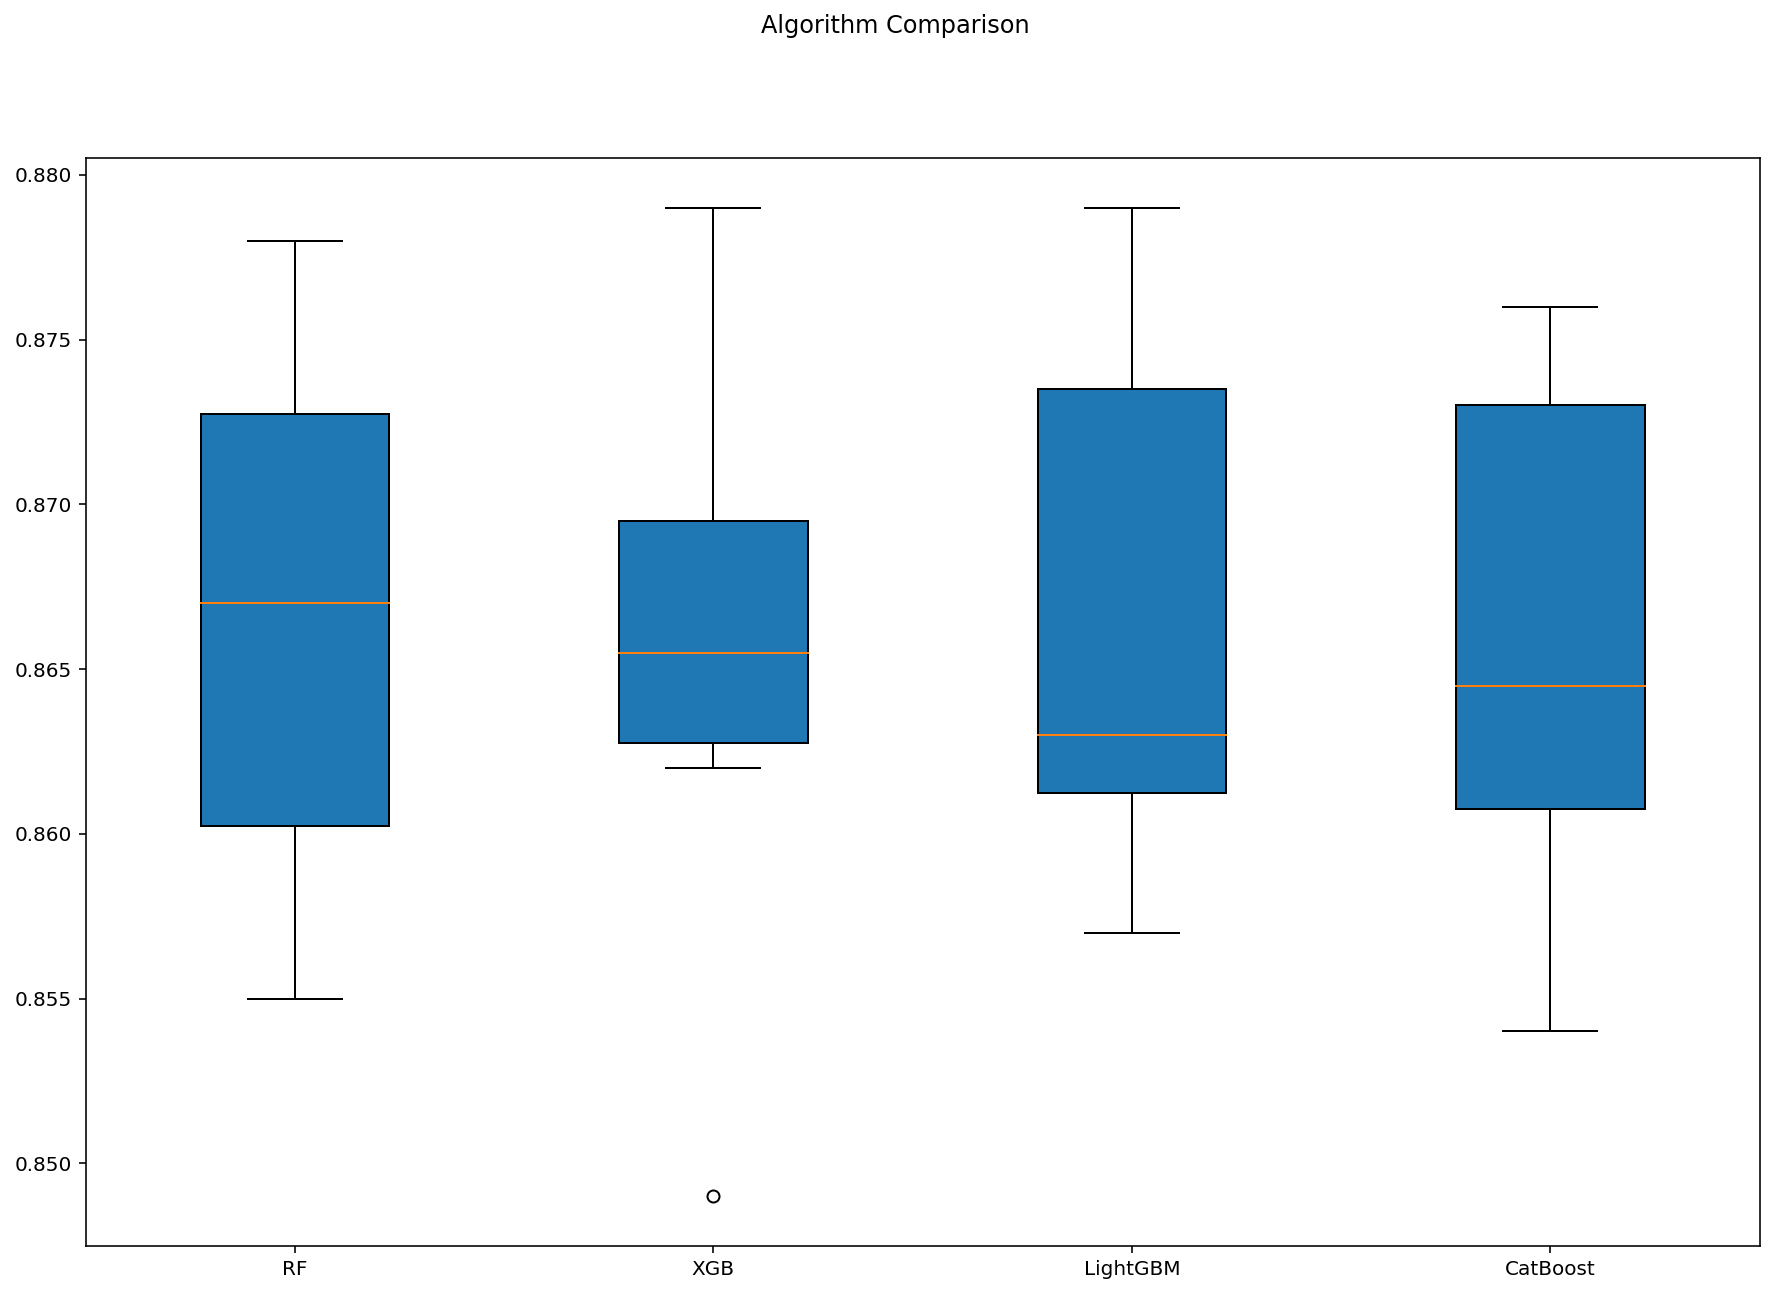

In [64]:
# comparison of algorithms with boxplot
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results, 
            vert=True, # vertical box alignment
            patch_artist=True) # fill with color

ax.set_xticklabels(names) 
plt.show()